Code <span class="caret"></span>

-   <a href="#" id="rmd-show-all-code">Show All Code</a>
-   <a href="#" id="rmd-hide-all-code">Hide All Code</a>
-   
-   <a href="#" id="rmd-download-source">Download Rmd</a>

# Improvement

[**Download Chapter notebook
(ipynb)**](https://drive.usercontent.google.com/u/1/uc?id=1Gib2BeOLzIb6dgVMQQuPqw8nLA8Ti0SX&export=download)

[**Download Chapter
PDF**](https://drive.usercontent.google.com/u/1/uc?id=1SkSVASAbhU1hgy5SdjxUdV0c_aatPjoy&export=download)

[<span style="color: rgb(255, 0, 0);">**Mandatory Lesson Feedback
Survey**</span>](https://docs.google.com/forms/d/e/1FAIpQLSdr0capF7jloJhPH3Pki1B3LZoKOG16poOpuVJ7SL2LkwLHQA/viewform?pli=1)

-   How to deal with complex classification problems?
-   Why is it important to use different classification algorithms?
-   What is the best way to find the optimal classifier?
-   How can we avoid over-fitting of data?
-   How do we evaluate the performance of classifiers?

-   Understanding complex training and testing data.
-   Comparison of different model classes.
-   Explaining the stratified shuffle split.
-   Evaluation of classification - the ROC and AUC curves.

  

  

  

  

## Remarks

1.  From now on the code will become more complex. When copied, the code
    should run without errors with the given data sets. (Please report
    any errors thrown when running the code without modifications).

2.  Make a copy of the notebook and start experimenting by modifying
    part of the code and comparing the outcome. Modifying existing code
    is one of the successful strategies when learning to programme as a
    non-programmer.

3.  The first resource to consult when facing bugs are the official
    documentations, be it Python, Numpy, SciKit Learn or other.

4.  If you formulate a problem adequately, often there may be good
    answers on [Stack Overflow](https://stackoverflow.com).

5.  Sometimes, simply copying and pasting an error message into the
    search engine can point you to the solution.

### **Import functions**

``` python
from numpy import mgrid, linspace, c_, arange, mean, array
from numpy.random import uniform, seed

from mpl_toolkits import mplot3d
from matplotlib.pyplot import subplots, axes, scatter, xticks, show

from sklearn.datasets import make_circles
```

## Challenge

We would like to test several machine learning models’ ability to deal
with a complicated task. A complicated task is one where the topology of
the labelled data is not trivially separable into classes by
(hyper)planes, e.g. by a straight line in a scatter plot.

Our example is one class of data organised in a doughnut shape and the
other class contained within the first doughnut forming a
doughnut-within-a-doughnut.

Here is the function code to create these data, followed by a function
call to produce a figure.

``` python
def make_torus_3D(n_samples=100, shuffle=True, noise=None, random_state=None,
                 factor=.8):
    """Make a large torus containing a smaller torus in 3d.

    A toy dataset to visualize clustering and classification
    algorithms.

    Read more in the :ref:`User Guide <sample_generators>`.

    Parameters
    ----------
    n_samples : int, optional (default=100)
        The total number of points generated. If odd, the inner circle will
        have one point more than the outer circle.

    shuffle : bool, optional (default=True)
        Whether to shuffle the samples.

    noise : double or None (default=None)
        Standard deviation of Gaussian noise added to the data.

    random_state : int, RandomState instance or None (default)
        Determines random number generation for dataset shuffling and noise.
        Pass an int for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.

    factor : 0 < double < 1 (default=.8)
        Scale factor between inner and outer circle.

    Returns
    -------
    X : array of shape [n_samples, 2]
        The generated samples.

    y : array of shape [n_samples]
        The integer labels (0 or 1) for class membership of each sample.
    """
    from numpy import pi, linspace, cos, sin, append, ones, zeros, hstack, vstack, intp
    from sklearn.utils import check_random_state, shuffle

    if factor >= 1 or factor < 0:
        raise ValueError("'factor' has to be between 0 and 1.")

    n_samples_out = n_samples // 2
    n_samples_in = n_samples - n_samples_out

    co, ao, ci, ai = 3, 1, 3.6, 0.2
    generator = check_random_state(random_state)
    # to not have the first point = last point, we set endpoint=False
    linspace_out = linspace(0, 2 * pi, n_samples_out, endpoint=False)
    linspace_in  = linspace(0, 2 * pi, n_samples_in,  endpoint=False)
    outer_circ_x = (co+ao*cos(linspace_out)) * cos(linspace_out*61.1)
    outer_circ_y = (co+ao*cos(linspace_out)) * sin(linspace_out*61.1)
    outer_circ_z =    ao*sin(linspace_out)

    inner_circ_x = (ci+ai*cos(linspace_in)) * cos(linspace_in*61.1)* factor
    inner_circ_y = (ci+ai*cos(linspace_in)) * sin(linspace_in*61.1) * factor
    inner_circ_z =    ai*sin(linspace_in) * factor

    X = vstack([append(outer_circ_x, inner_circ_x),
                append(outer_circ_y, inner_circ_y),
                append(outer_circ_z, inner_circ_z)]).T

    y = hstack([zeros(n_samples_out, dtype=intp),
                   ones(n_samples_in, dtype=intp)])

    if shuffle:
        X, y = shuffle(X, y, random_state=generator)

    if noise is not None:
        X += generator.normal(scale=noise, size=X.shape)

    return X, y
```

``` python
RANDOM_STATE  = 12345
seed(RANDOM_STATE)

X, y = make_torus_3D(n_samples=2000, factor=.9, noise=.001, random_state=RANDOM_STATE)

feature_1, feature_2, feature_3 = 0, 1, 2
ft_min, ft_max = X.min(), X.max()

fig, ax = subplots(figsize=(12, 9))

ax = axes(projection="3d")

im = ax.scatter3D(X[:, feature_1], X[:, feature_2], X[:, feature_3], marker='o', s=20, c=y, cmap='bwr');

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Angles to pick the perspective
ax.view_init(30, 50);

show()
```

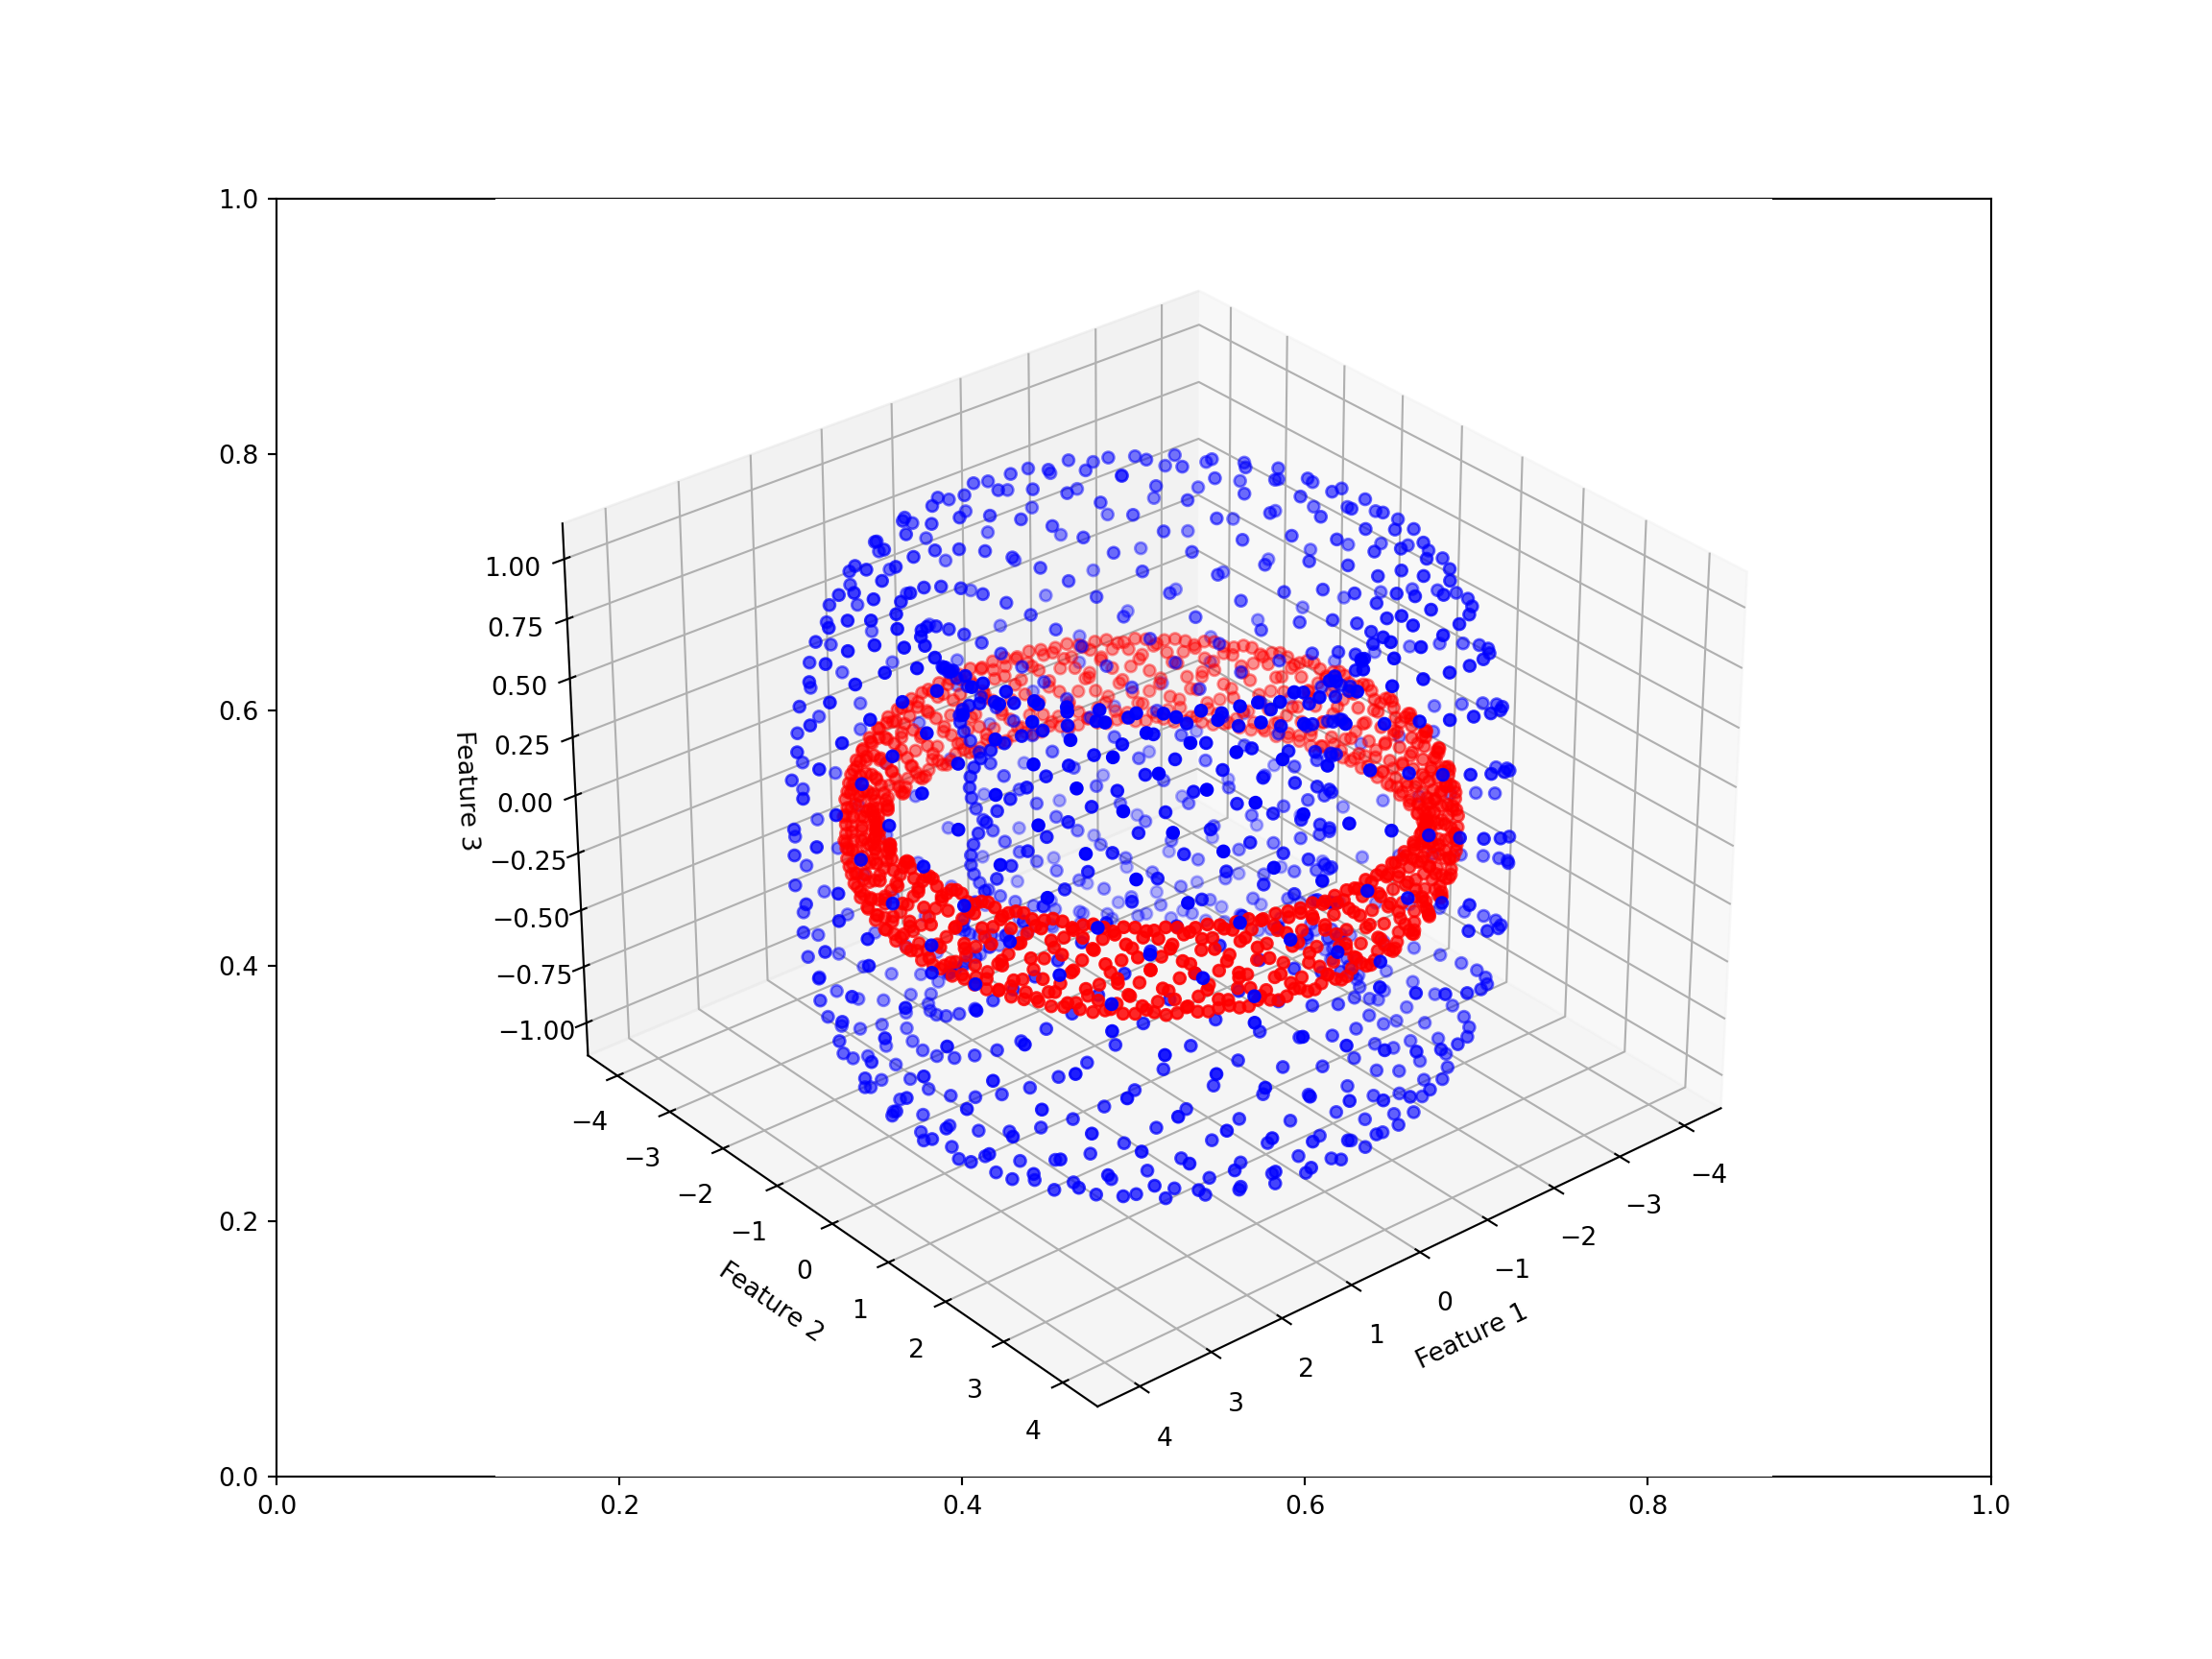

The challenge here is that the only way to separate the data of the two
labels from each other is to find a separating border that lies between
the blue and the red doughnut (mathematically: torus) and itself is a
torus, i.e. a complex topology. Similarly, one can test to separate one
class of data that lie on the surface of a sphere and then have data on
another sphere embedded within it. Typically, it is unknown what type of
high-dimensional topologies is present in biological data. As such it is
not clear at the outset which classification strategy will work best.
Let us start with a simpler example.

## Traing a variety of machine learning models

`SciKit Learn` provides the means to generate practice datasets with
specific qualities. In this section, we will use the `make_circles`
function. (see the
[documentations](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html)):

### **Circular Test Data**

``` python
RANDOM_STATE  = 1234
seed(RANDOM_STATE)

X, y = make_circles(n_samples=500, factor=0.3, noise=.05, random_state=RANDOM_STATE)

feature_1, feature_2 = 0, 1
ft_min, ft_max = X.min(), X.max()

print('Shape of X:', X.shape)
```

    Shape of X: (500, 2)

``` python
fig, ax = subplots(figsize=(10, 5), nrows=1, ncols=2)
ax[0].scatter(X[:, feature_1], X[:, feature_2], c=y, s=4, cmap='bwr');
ax[1].hist(X);

show()
```

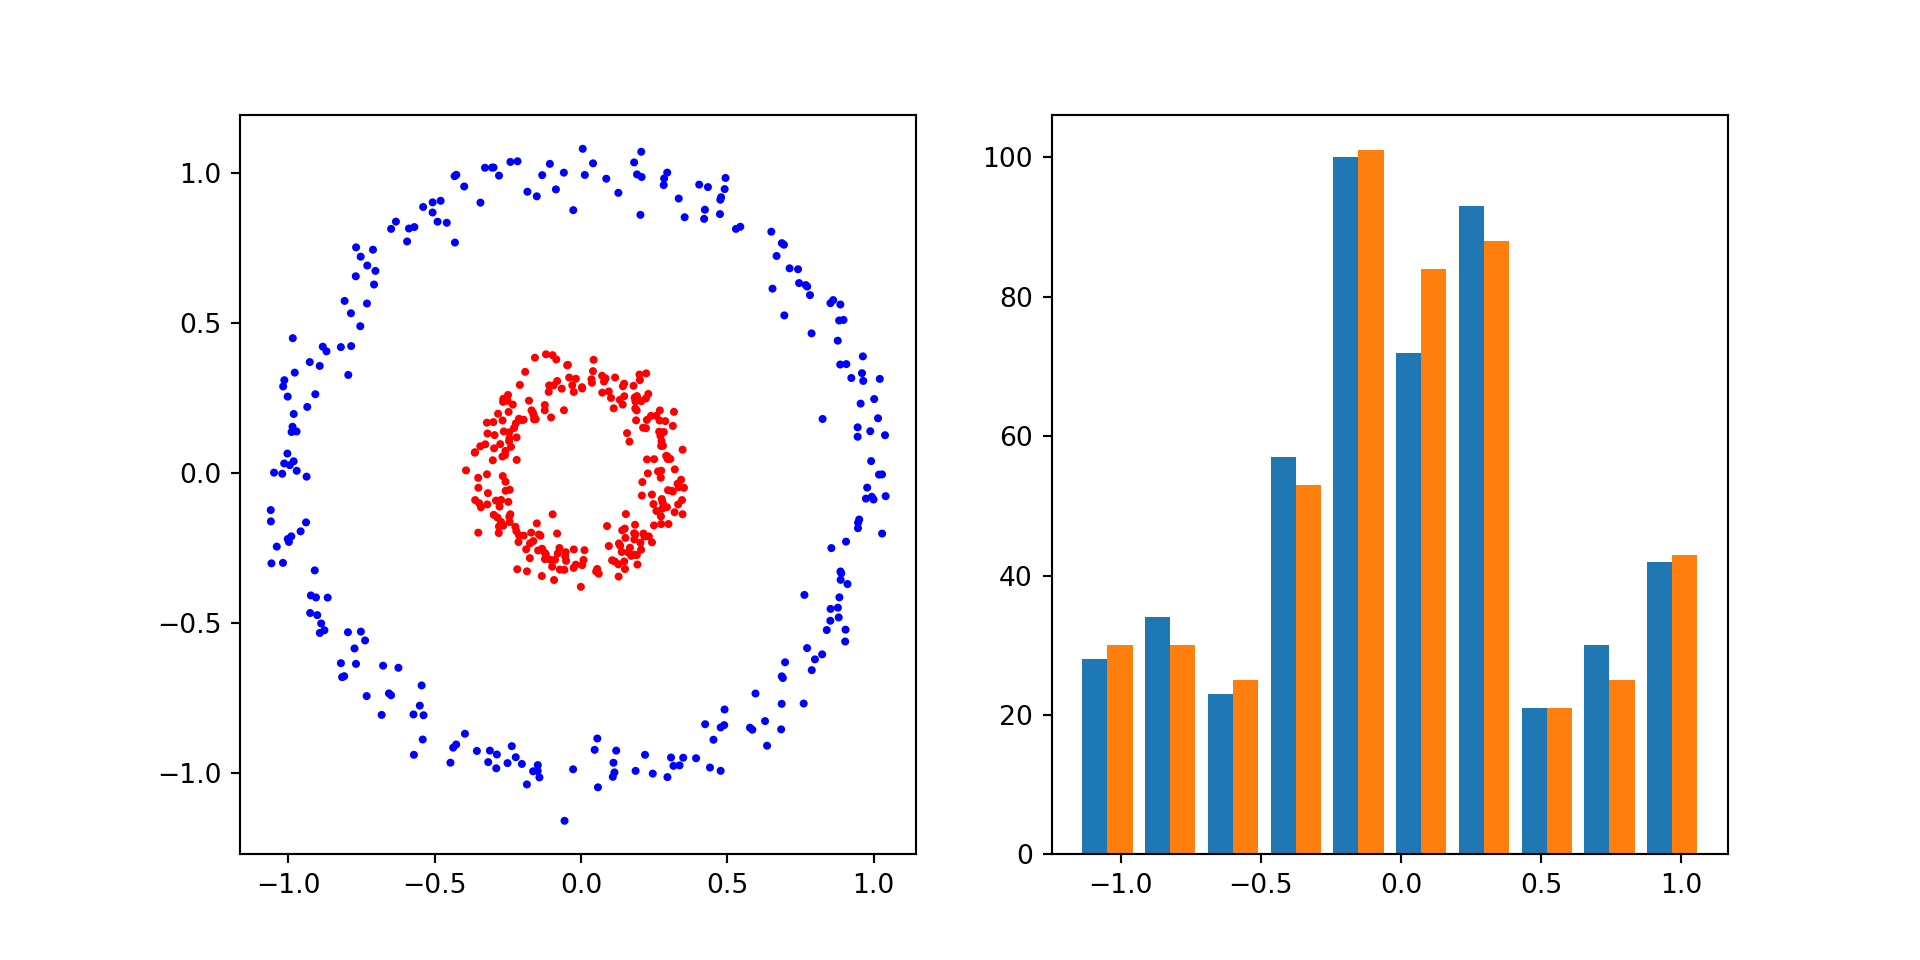

The function yields only two features. The reason is that with two
features we can visualise the complete state space in a two-dimensional
scatter plot. The data of both labels are organised along a ring. There
is a certain amount of randomness added to create data distributed
normally around the ring.

The tricky thing about such a data distribution is that in a standard
view of the data, the histogram, the clear state space organisation is
not visible. There are e.g. no two distinct mean values of the
distributions. Also, while the two features are clearly dependent on
each other (as seen in the scatter plot), it is not possible to regress
one with the other by means of fits of the type y = f(x).

We will now use different classes of machine learning models to fit to
these labelled data.

### **Classification Algorithms**

Different classification algorithms approach problems differently. Let
us name the algorithms in `SciKit Learn`.

`SciKit Learn` provides the following algorithms for classification
problems:

-   Ensemble: Averaging:
    -   Random Forest
    -   Extra Tree
    -   Isolation Forest
    -   Bagging
    -   Voting
-   Boosting:
    -   Gradient Boosting
    -   AdaBoost
-   Decision Trees:
    -   Decision Tree
    -   Extra Tree
-   Nearest Neighbour:
    -   K Nearest Neighbour
    -   Radius Neighbours
    -   Nearest Centroid
-   Support Vector Machine:
    -   with non-linear kernel:
        -   Radial Basis Function (RBF) Polynomial
        -   Sigmoid
    -   with linear kernel:
        -   Linear kernel
    -   parametrised with non-linear kernel:
        -   Nu-Support Vector Classification
-   Neural Networks:
    -   Multi-layer Perceptron
    -   Gaussian:
        -   Gaussian Process
    -   Linear Models:
        -   Logistic Regression
        -   Passive Aggressive
        -   Ridge
        -   Linear classifiers with Stochastic Gradient Descent
-   Baysian:
    -   Bernoulli
    -   Multinomial
    -   Complement

Some of these algorithms require a more in-depth understanding of how
they work. To that end, we only review the performance of those that are
easier to implement and adjust.

**AdaBoost**

The AdaBoost algorithm is special in that it does not work on its own;
instead, it complements another ensemble algorithm (e.g. Random Forest)
and *boosts* its performance by weighing the training data through a
boosting algorithm. Note that boosting the performance does not
necessarily translate into a better fit. This is because boosting
algorithms are generally robust against over-fitting, meaning that they
always try to produce generalisable models.

**Seeding**

Most machine learning algorithms rely on random number generation to
produce results. Therefore, one simple, but important adjustment is to
`seed` the number generator, and thereby making our comparisons more
consistent; i.e. ensure that all models use the same set of random
numbers. Almost all SciKit Learn models take an argument called
`random_state`, which takes an integer number to seed the random number
generator.

### **Training and Testing**

Here is code to import a number of classifiers from SciKit Learn, fit
them to the training data and predict the (complete) state space. The
result is plotted below.

``` python
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Random Forest)': AdaBoostClassifier(RandomForestClassifier(random_state=RANDOM_STATE)),
    'Extra Trees': ExtraTreesClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Extra Tree)': AdaBoostClassifier(ExtraTreesClassifier(random_state=RANDOM_STATE)),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'SVC (RBF)': SVC(random_state=RANDOM_STATE),
    'SVC (Linear)': LinearSVC(random_state=RANDOM_STATE),
    'Multi-layer Perceptron': MLPClassifier(max_iter=5000, random_state=RANDOM_STATE)
}
```

``` python
ft_min, ft_max = -1.5, 1.5

# Constructing (2 grids x 300 rows x 300 cols):
grid_1, grid_2 = mgrid[ft_min:ft_max:.01, ft_min:ft_max:.01]

# We need only the shape for one of the grids (i.e. 300 x  300):
grid_shape = grid_1.shape

# state space grid for testing
new_obs = c_[grid_1.ravel(), grid_2.ravel()]
```

``` python
contour_levels = linspace(0, 1, 6)

fig, all_axes = subplots(figsize=[15, 5], ncols=4, nrows=2, sharey=True, sharex=True)

for ax, (name, clf) in zip(all_axes.ravel(), classifiers.items()):
    clf.fit(X, y)
    y_pred = clf.predict(new_obs)
    y_pred_grid = y_pred.reshape(grid_shape)

    ax.scatter(X[:, feature_1], X[:, feature_2], c=y, s=1, cmap='bwr_r')
    ax.contourf(grid_1, grid_2, y_pred_grid, cmap='gray_r', alpha=.2, levels=contour_levels)
    ax.set_ylim(ft_min, ft_max)
    ax.set_xlim(ft_min, ft_max)
    ax.set_yticks([-1.5, 0, 1.5])
    ax.set_xticks([-1.5, 0, 1.5])
    ax.set_title(name, fontsize=10);

show()
```

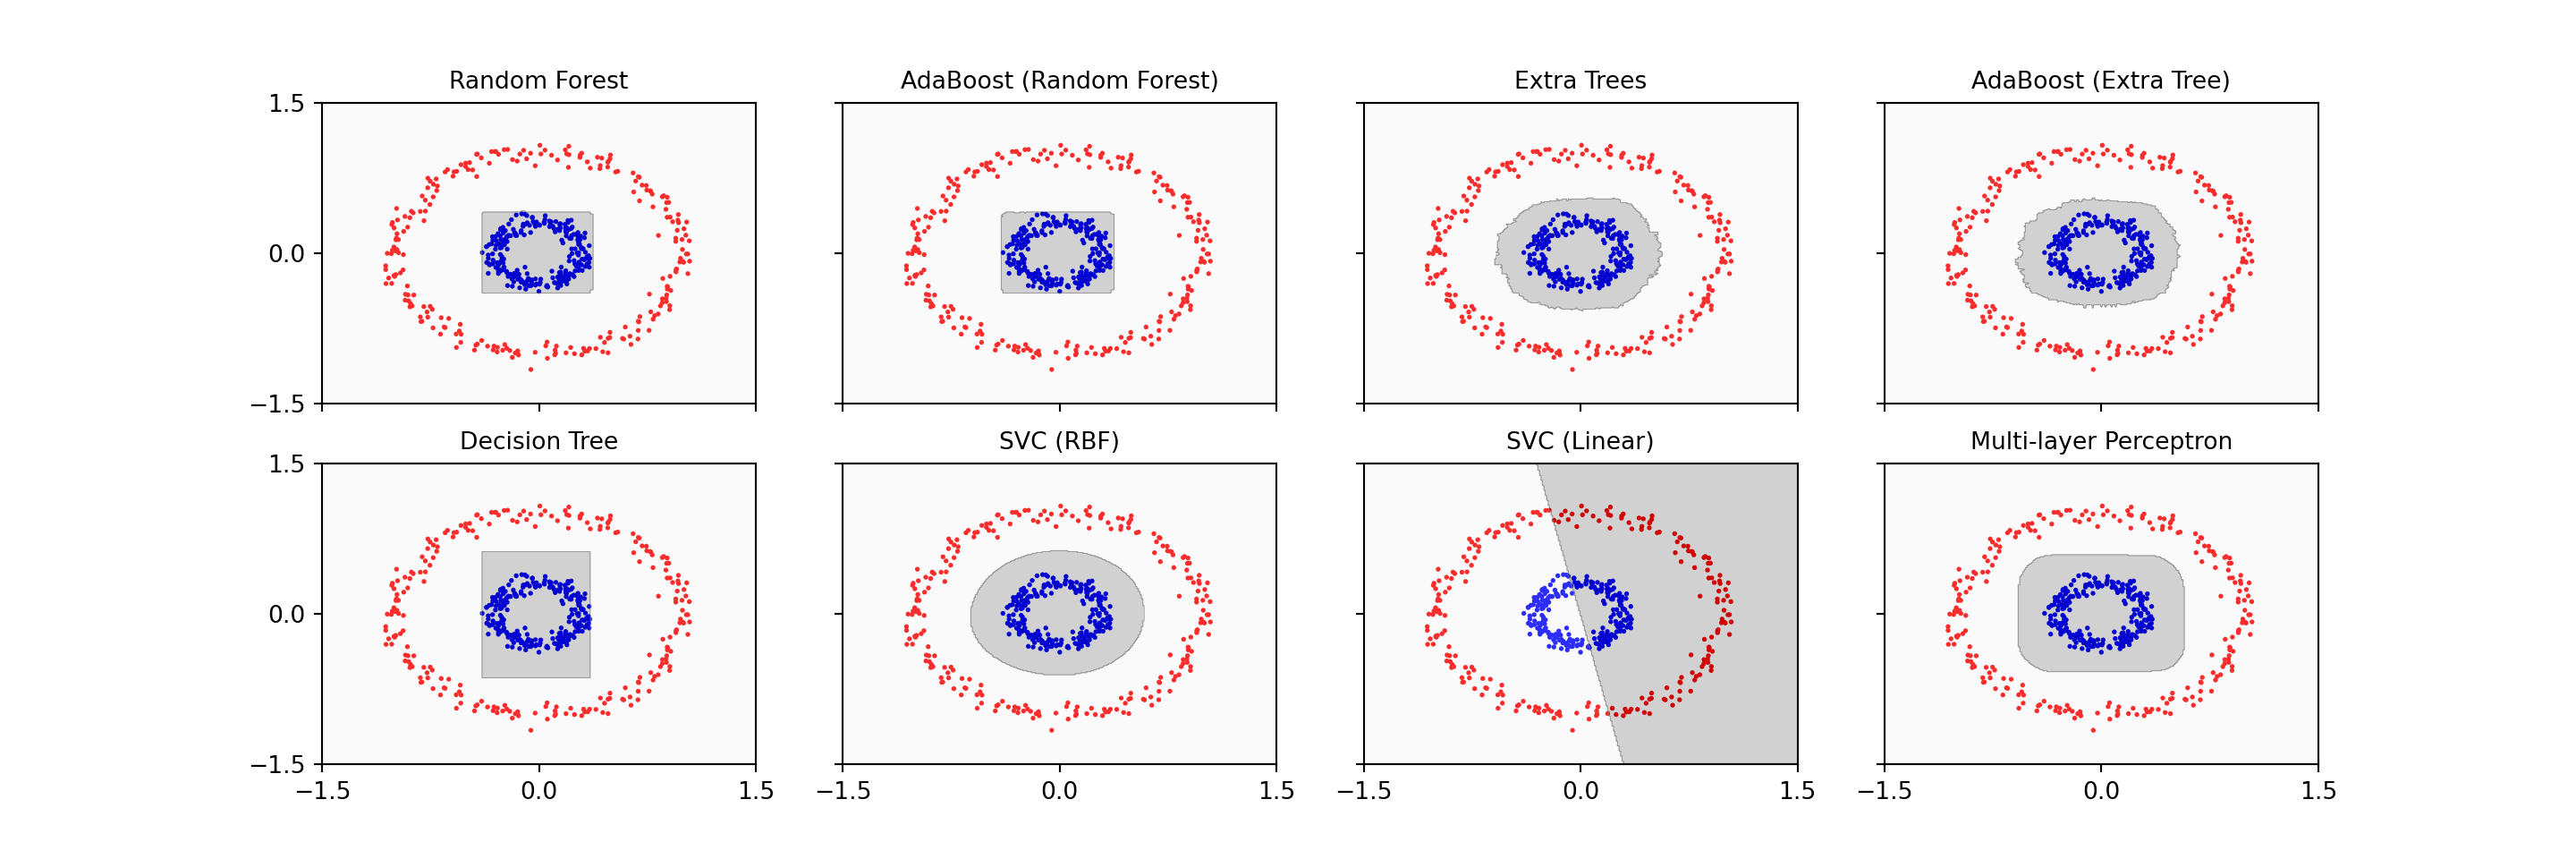

Seven of the eight classifiers were able to separate the inner data set
from the outer data set successfully. The main difference is that some
algorithms ended up with a more rectangular shape of the boundary
whereas the others found a more circular form which reflects the
original data distribution more closely. One classifier simply fails:
the support vector classifier (SVC) with linear basis functions: it
tries to fit a straight line to separate the classes which in this case
is impossible.

### **The Train-Test Split**

We will now modify our workflow to avoid the need to create separate
testing data (the typical situation when dealing with recorded data).
For this we start with a data set of n labelled samples. Of these n
samples, a certain percentage is used for training (using the provided
labels) and the rest for testing (withholding the labels). The testing
data then do not need to be prepared separately.

The function we use is `train_test_split` from SciKit Learn. A nice
feature of this function is that it tries to preserve the ratio of
labels in the split. E.g. if the data contain 70% of `True` and 30 % of
`False` labels, the algorithm tries to preserve this ratio in the split
as good as possible: around 70% of the training data and of the testing
data will have the `True` label.

``` python
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1000, factor=0.3, noise=.05, random_state=RANDOM_STATE)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_STATE, shuffle=True)

print(X_train.shape, X_test.shape)
```

    (700, 2) (300, 2)

Here is an illustration of the two sets of data. The splitting into
testing and training data is done randomly. Picking test data randomly
is particularly important for real data as it helps to reduce potential
bias in the recording order.

``` python
fig, ax = subplots(figsize=(7, 6), ncols=2, nrows=2, sharex=True)

ax[0, 0].scatter(X_train[:, feature_1], X_train[:, feature_2], c=y_train, s=4, cmap='bwr')
ax[0, 1].scatter(X_test[:, feature_1], X_test[:, feature_2], c=y_test, s=4, cmap='bwr')

ax[1, 0].hist(X_train)
```

``` python
ax[1, 1].hist(X_test)
```

``` python
ax[0, 0].set_title('Training data')
ax[0, 1].set_title('Test data')

ax[0, 0].set_ylim(ft_min, ft_max)
```

``` python
ax[0, 1].set_ylim(ft_min, ft_max)
```

``` python
ax[1, 0].set_ylim(0, 100)
```

``` python
ax[1, 1].set_ylim(0, 100);

show()
```

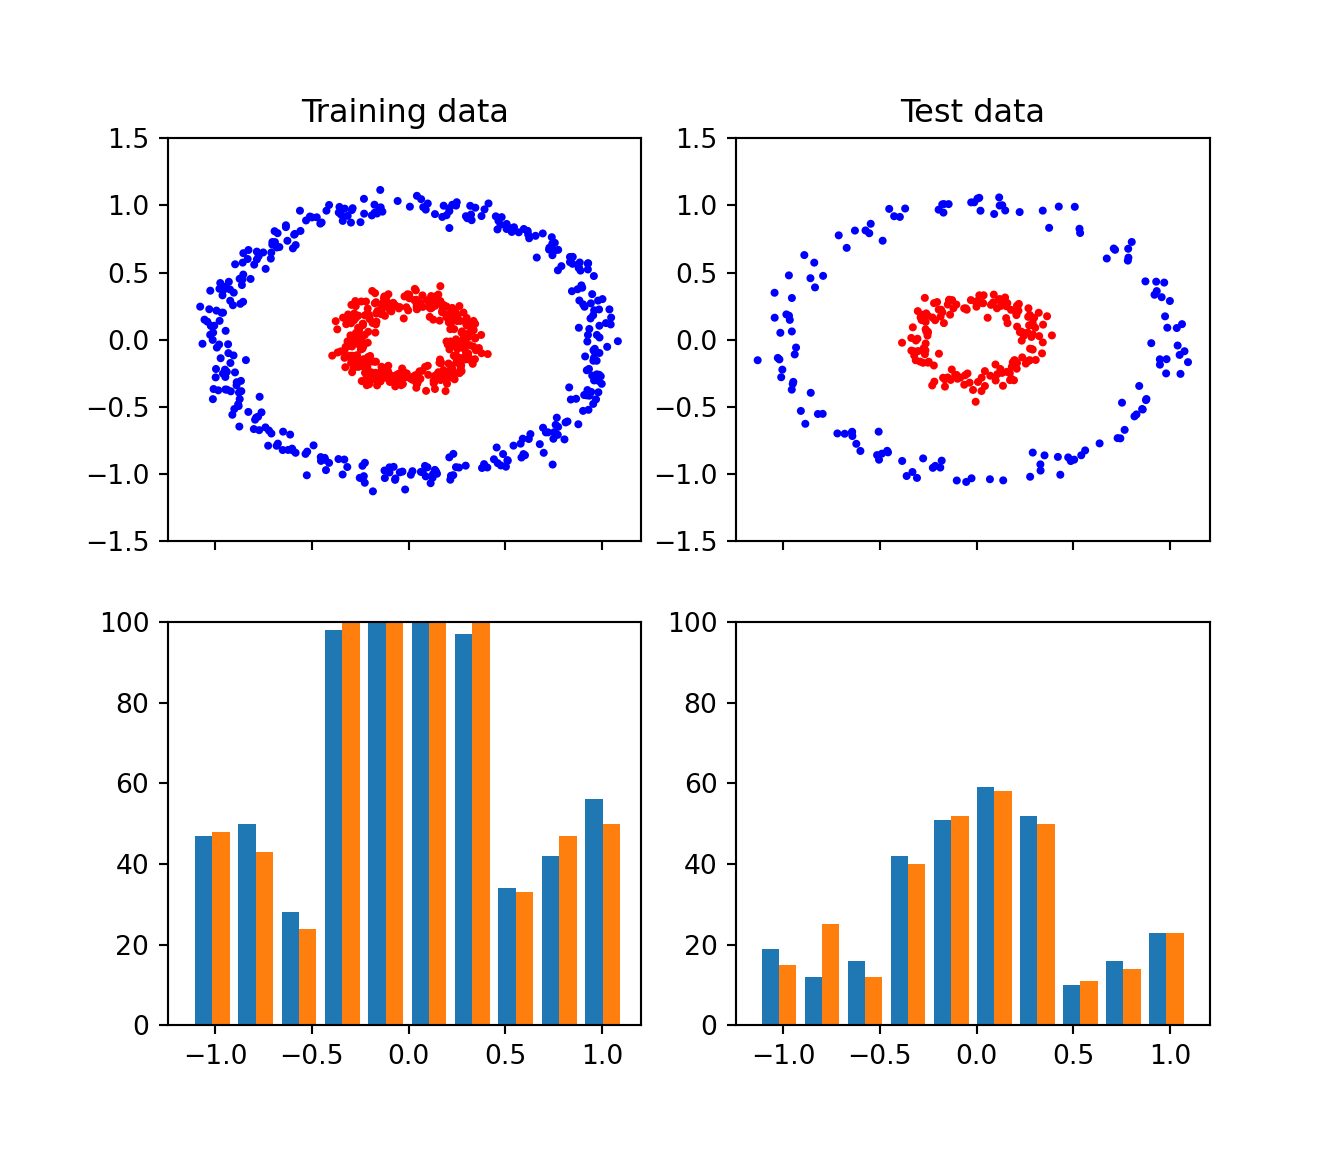

Now we can repeat the training with this split dataset using eight types
of models as above.

To compare the model performances, we use **scoring**: the method
`.score` takes as input arguments the testing samples and their true
labels. It then uses the model predictions to calculate the fraction of
labels in the testing data that were predicted correctly.

There are different techniques to evaluate the performance, but the
`.score` method provides a quick, simple, and handy way to assess a
model. As far as classification algorithms in SciKit Learn are
concerned, the method usually produces the **mean accuracy**, which is
between 0 and 1; and the higher the score, the better the fit.

``` python
fig, all_axes = subplots(figsize=[15, 5], ncols=4, nrows=2, sharey=True, sharex=True)

for ax, (name, clf) in zip(all_axes.ravel(), classifiers.items()):
    # Training the model using training data:
    clf.fit(X_train, y_train)

    y_pred = clf.predict(new_obs)
    y_pred_grid = y_pred.reshape(grid_shape)

    # Evaluating the score using test data:
    score = clf.score(X_test, y_test)

    # Scattering the test data only:
    ax.scatter(X_test[:, feature_1], X_test[:, feature_2], c=y_test, s=4, cmap='bwr', marker='.')

    ax.contourf(grid_1, grid_2, y_pred_grid, cmap='gray_r', alpha=.2, levels=contour_levels)
#    ax.contourf(grid[0], grid[1], y_pred_grid, cmap='gray_r', alpha=.2, levels=contour_levels)

    ax.set_ylim(ft_min, ft_max)
    ax.set_xlim(ft_min, ft_max)
    ax.set_yticks([-1.5, 0, 1.5])
    ax.set_xticks([-1.5, 0, 1.5])

    label = '{} - Score: {:.2f}'.format(name, score)
    ax.set_title(label , fontsize=10);

show()
```

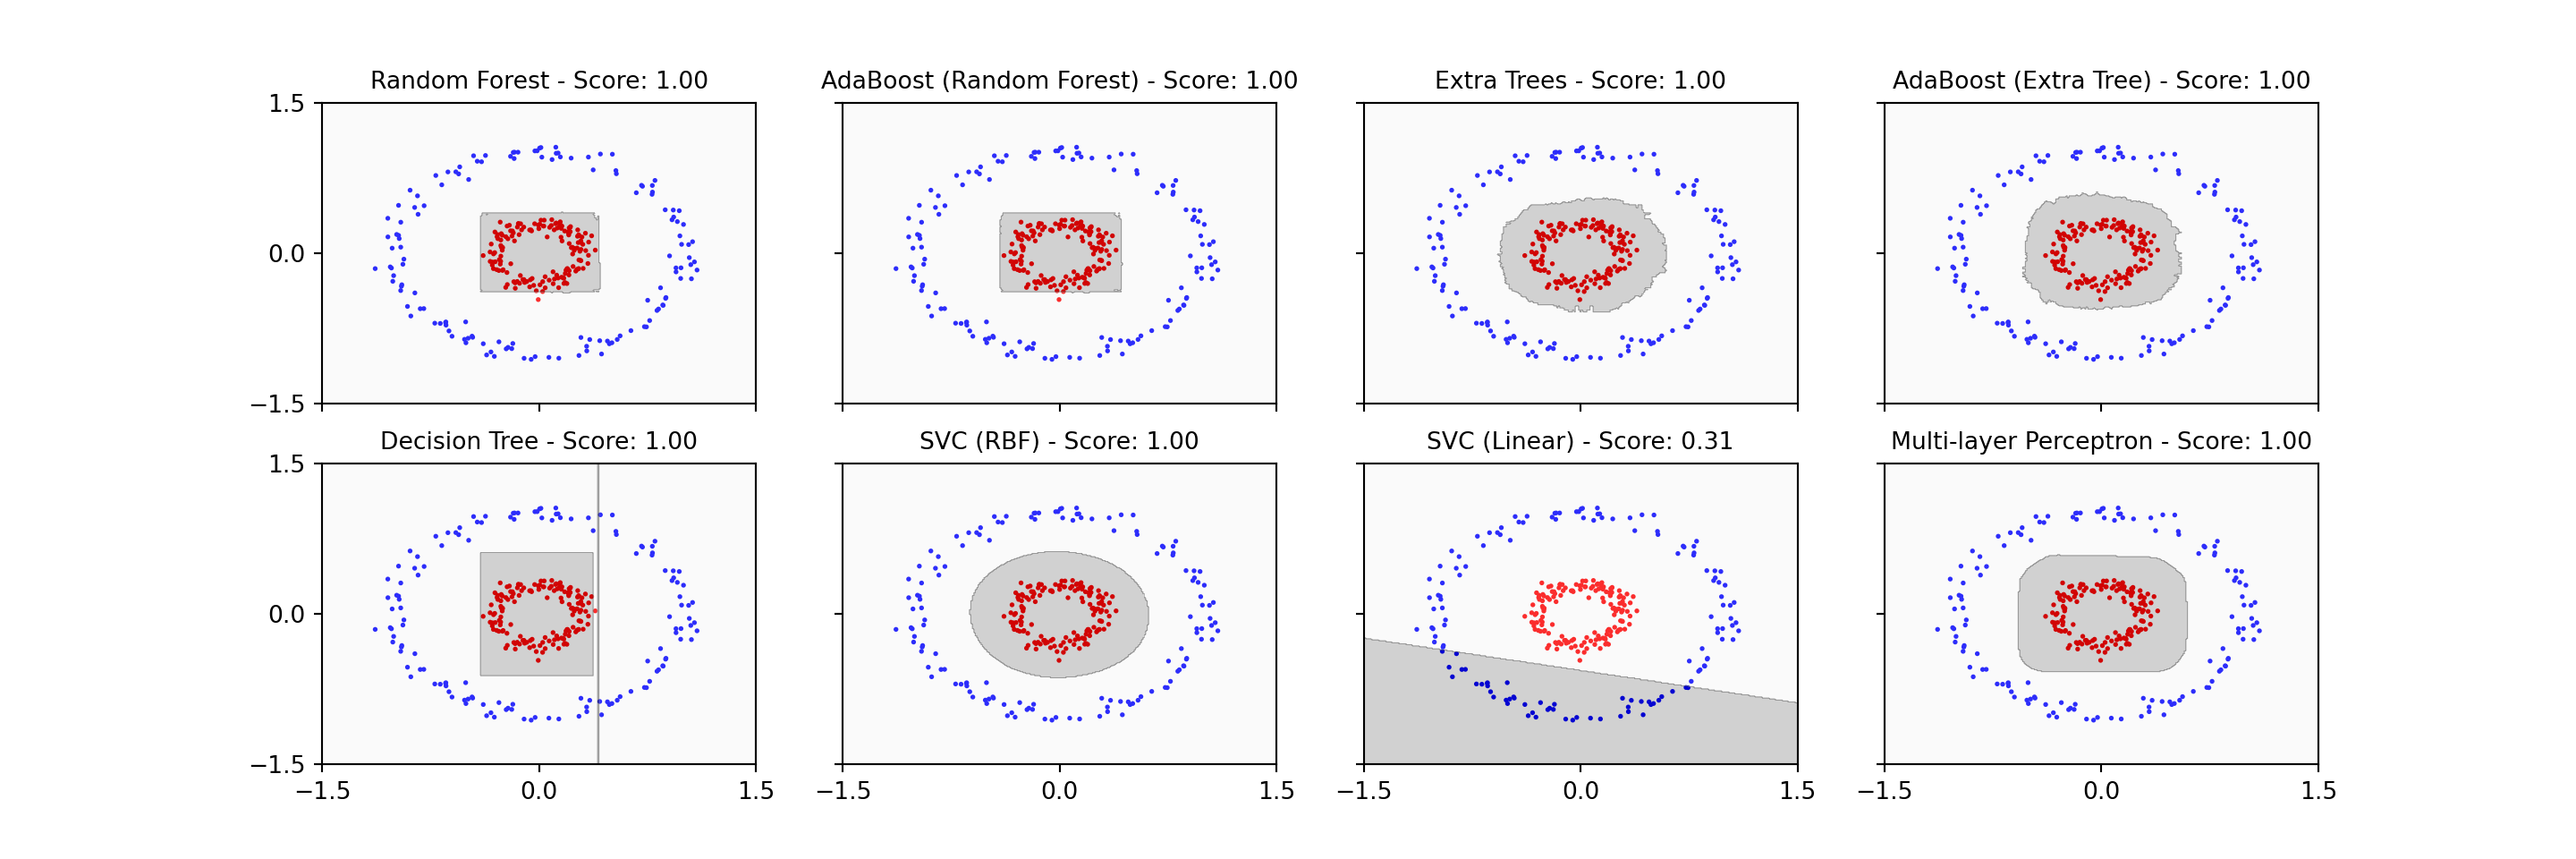

Here, we only plotted the test data, those that were classified based on
the trained model. The gray area shows the result of the classification:
within the gray area the prediction is 1 (the red samples) and outside
it is 0 (the blue samples). The result is that testing data are
classified correctly in all but one of the classifiers, so their
performance is 1, or 100 %. This is excellent because it demonstrates
that most classifiers are able to deal with embedded topologies.

Let us now repeat the procedure with a higher level of noise to make the
task more complicated.

``` python
X, y = make_circles(n_samples=1000, factor=.5, noise=.3, random_state=RANDOM_STATE)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_STATE, shuffle=True)

fig, ax = subplots(figsize=(7, 6), ncols=2, nrows=2, sharex=True)

ax[0, 0].scatter(X_train[:, feature_1], X_train[:, feature_2], c=y_train, s=4, cmap='bwr')
ax[0, 1].scatter(X_test[:, feature_1], X_test[:, feature_2], c=y_test, s=4, cmap='bwr')


ax[1, 0].hist(X_train)
```

``` python
ax[1, 1].hist(X_test)
```

``` python
ax[0, 0].set_title('Training data')
ax[0, 1].set_title('Test data')

ax[0, 0].set_ylim(-3, 3)
```

``` python
ax[0, 1].set_ylim(-3, 3)
```

``` python
ax[1, 0].set_ylim(0, 200)
```

``` python
ax[1, 1].set_ylim(0, 200);

show()
```

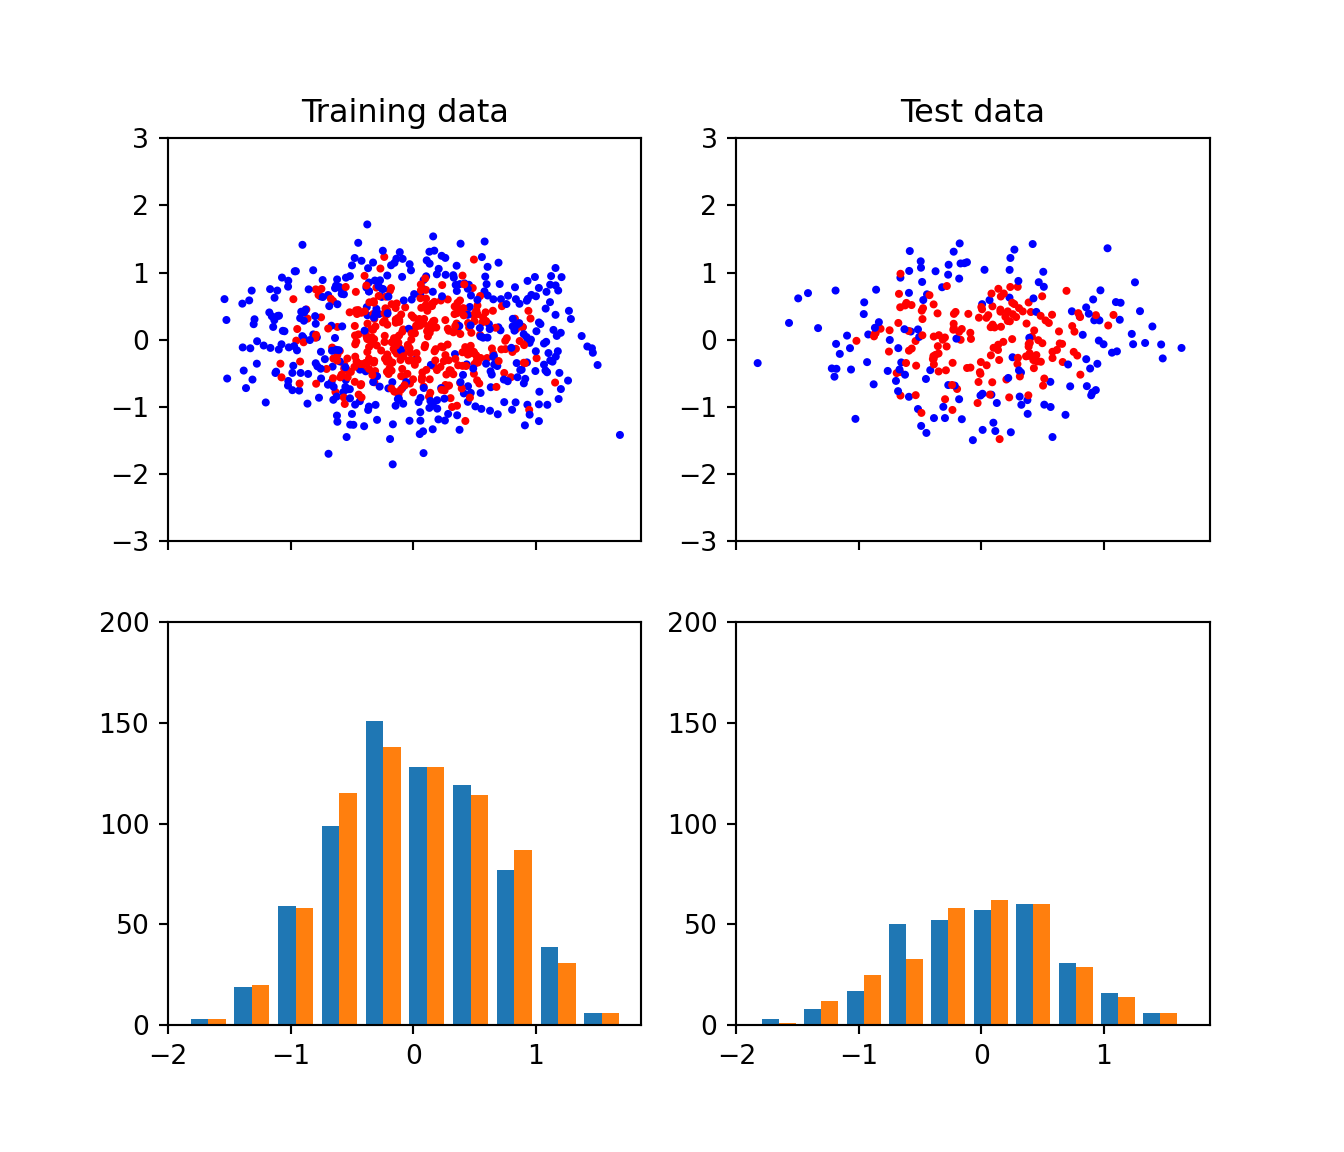

``` python
fig, all_axes = subplots(figsize=[15, 5], ncols=4, nrows=2, sharey=True, sharex=True)

for ax, (name, clf) in zip(all_axes.ravel(), classifiers.items()):
    # Training the model using training data:
    clf.fit(X_train, y_train)

    y_pred = clf.predict(new_obs)
    y_pred_grid = y_pred.reshape(grid_shape)

    # Evaluating the score using test data:
    score = clf.score(X_test, y_test)

    # Scattering the test data only:
    ax.scatter(X_test[:, feature_1], X_test[:, feature_2], c=y_test, s=4, cmap='bwr', marker='.')

    ax.contourf(grid_1, grid_2, y_pred_grid, cmap='gray_r', alpha=.2, levels=contour_levels)

    ax.set_ylim(ft_min, ft_max)
    ax.set_xlim(ft_min, ft_max)
    ax.set_yticks([-1.5, 0, 1.5])
    ax.set_xticks([-1.5, 0, 1.5])

    label = '{} - Score: {:.2f}'.format(name, score)
    ax.set_title(label , fontsize=10);

show()
```

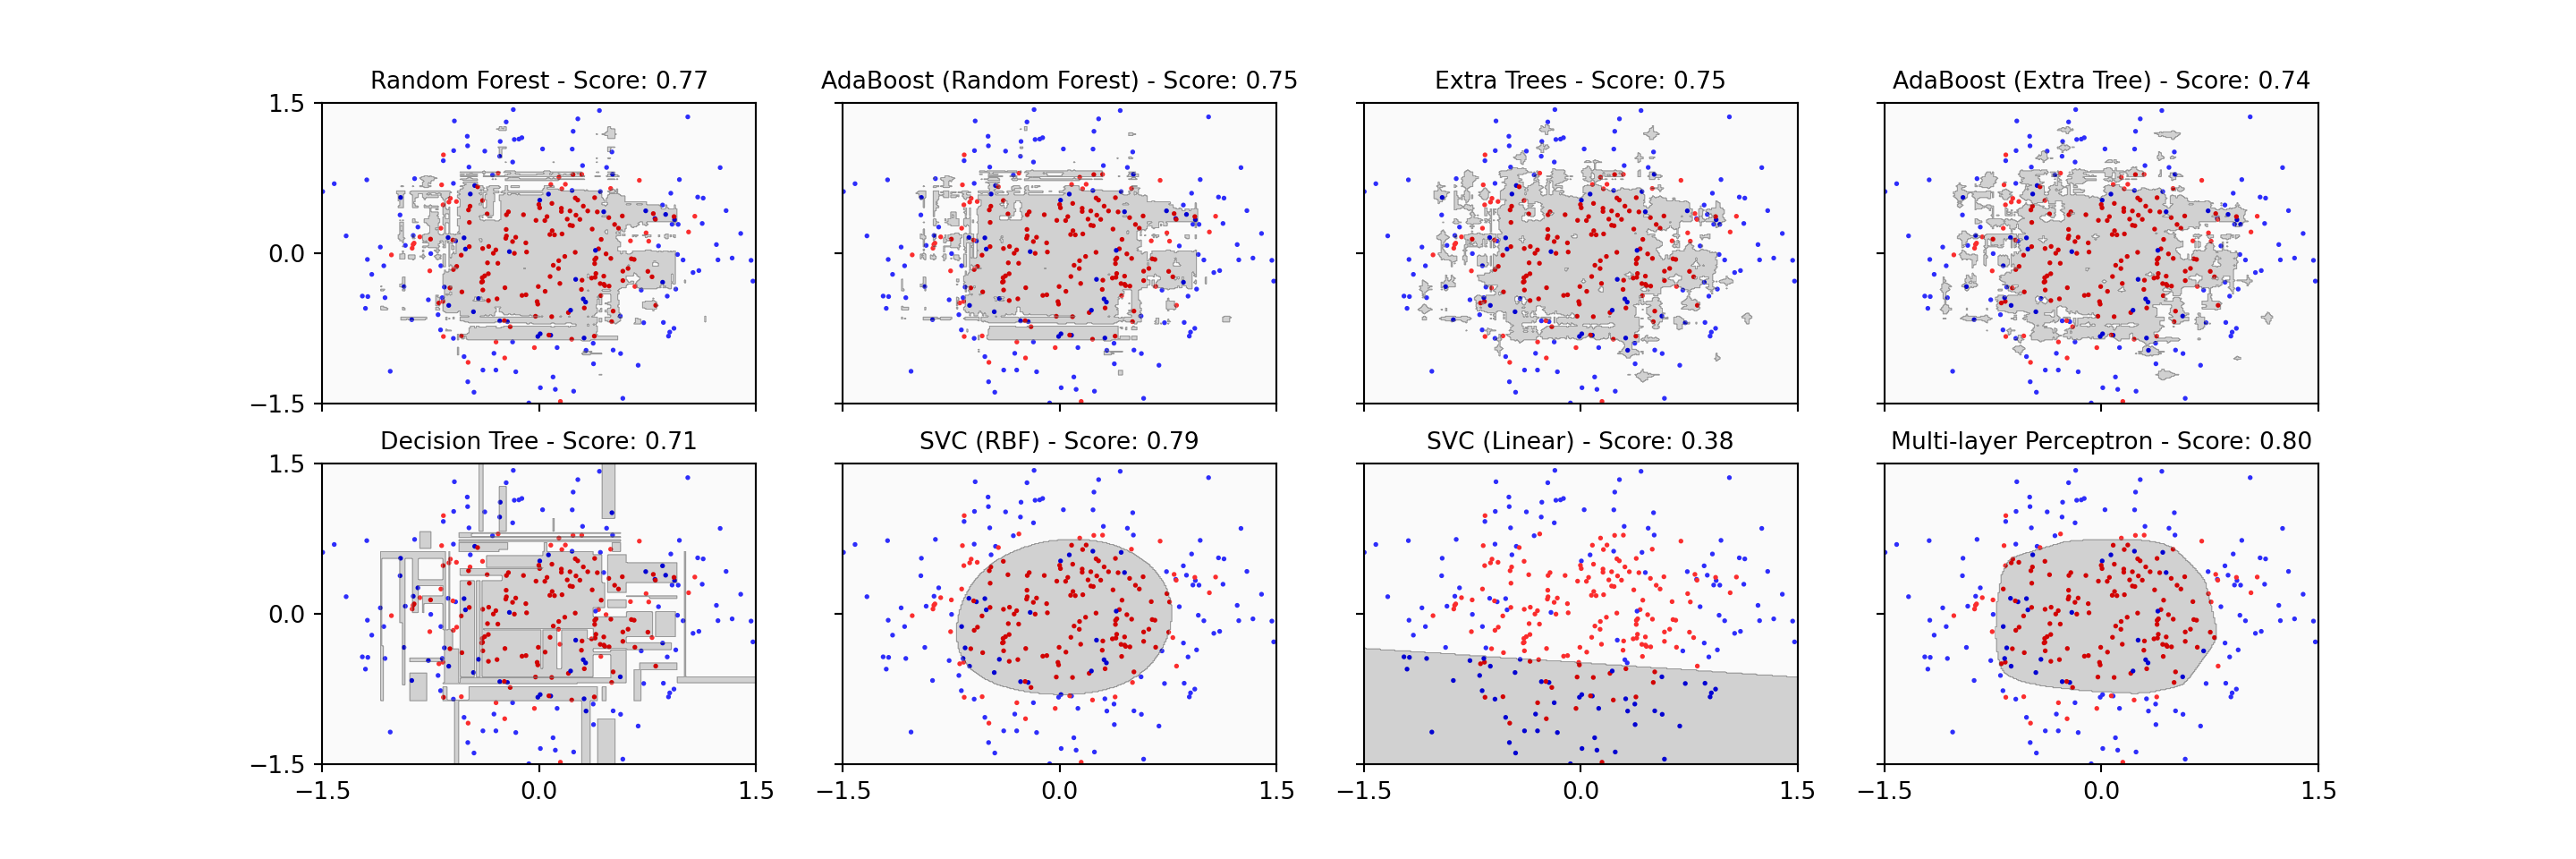

Now the data are mixed in the plane and there is no simple way to
separate the two classes. We can see in the plots how the algorithms try
to cope with their different strategies. One thing that is immediately
obvious is that the fitting patterns are different. Particularly, we can
see the fragmented outcome of the *decision tree* classifier and the
smooth elliptic area found by the *support vector classifier (SVC)* with
radial basis functions (RBF) and the neural network (MLP). On a closer
look, you may also notice that with ensemble methods in the upper row,
the patterns are somewhat disorganised. This is due to the way ensemble
methods work: they sample the data randomly and then class them into
different categories based on their labels.

If the prediction was made by chance (throwing a dice), one would expect
a 50 % score. Thus, the example also shows that the performance depends
on the type of problem and that this testing helps to find an optimal
classifier.

## **Never expose the test data**

Testing a model on data that is used in training is a methodological
mistake. It is therefore vital that the test data is **never, ever**
used for training a model at any stage. This is one of the most
fundamental principles of machine learning, and its importance cannot be
exaggerated. There are numerous examples of people making this mistake
one way or another, especially where multiple classification algorithms
are used to address a problem.

## The Stratified Shuffle Split

One potential bias arises when we try to improve the performance of our
models through the change of the so-called **hyperparameters** (instead
of using the default parameters as we did so far). We will always
receive the optimal output given **the specific test data chosen**. This
may lead to overfitting the model on the chosen training and testing
data. This can be avoided by choosing different splits into testing and
training data and repeating the fit procedure. Doing different splits
while preserving the fraction of labels of each class in the original
data, the method is called the **stratified shuffle split**.

We first need to import and instantiate the splitter. We set key word
argument `n_splits` to determine the number of different splits.
`test_size` lets us determine what fraction of samples is used for the
testing data.

``` python
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(random_state=RANDOM_STATE, n_splits=10, test_size=0.3)
```

Let us look at the different splits obtained:

``` python
fig, ax = subplots(figsize=[10, 5])

n_splits = sss.n_splits
split_data_indices = sss.split(X=X, y=y)

for index, (tr, tt) in enumerate(split_data_indices):
    indices = X[:, feature_1].copy()
    indices[tt] = 1
    indices[tr] = 0

    # Visualize the results
    x_axis = arange(indices.size)
    y_axis = [index + .5] * indices.size
    ax.scatter(x_axis, y_axis, c=indices, marker='_', lw=10, cmap='coolwarm', vmin=-.2, vmax=1.2)

# Plot the data classes and groups at the end
class_y = [index + 1.5] * indices.size
ax.scatter(x_axis, class_y, c=y, marker='_', lw=10, cmap='coolwarm')

# Formatting
ylabels = list(range(n_splits))
ylabels.extend(['Data'])

ax.set_yticks(arange(n_splits + 1) + .5)
ax.set_yticklabels(ylabels)
ax.set_xlabel('Sample index')
ax.set_ylabel('SSS iteration');

show()
```

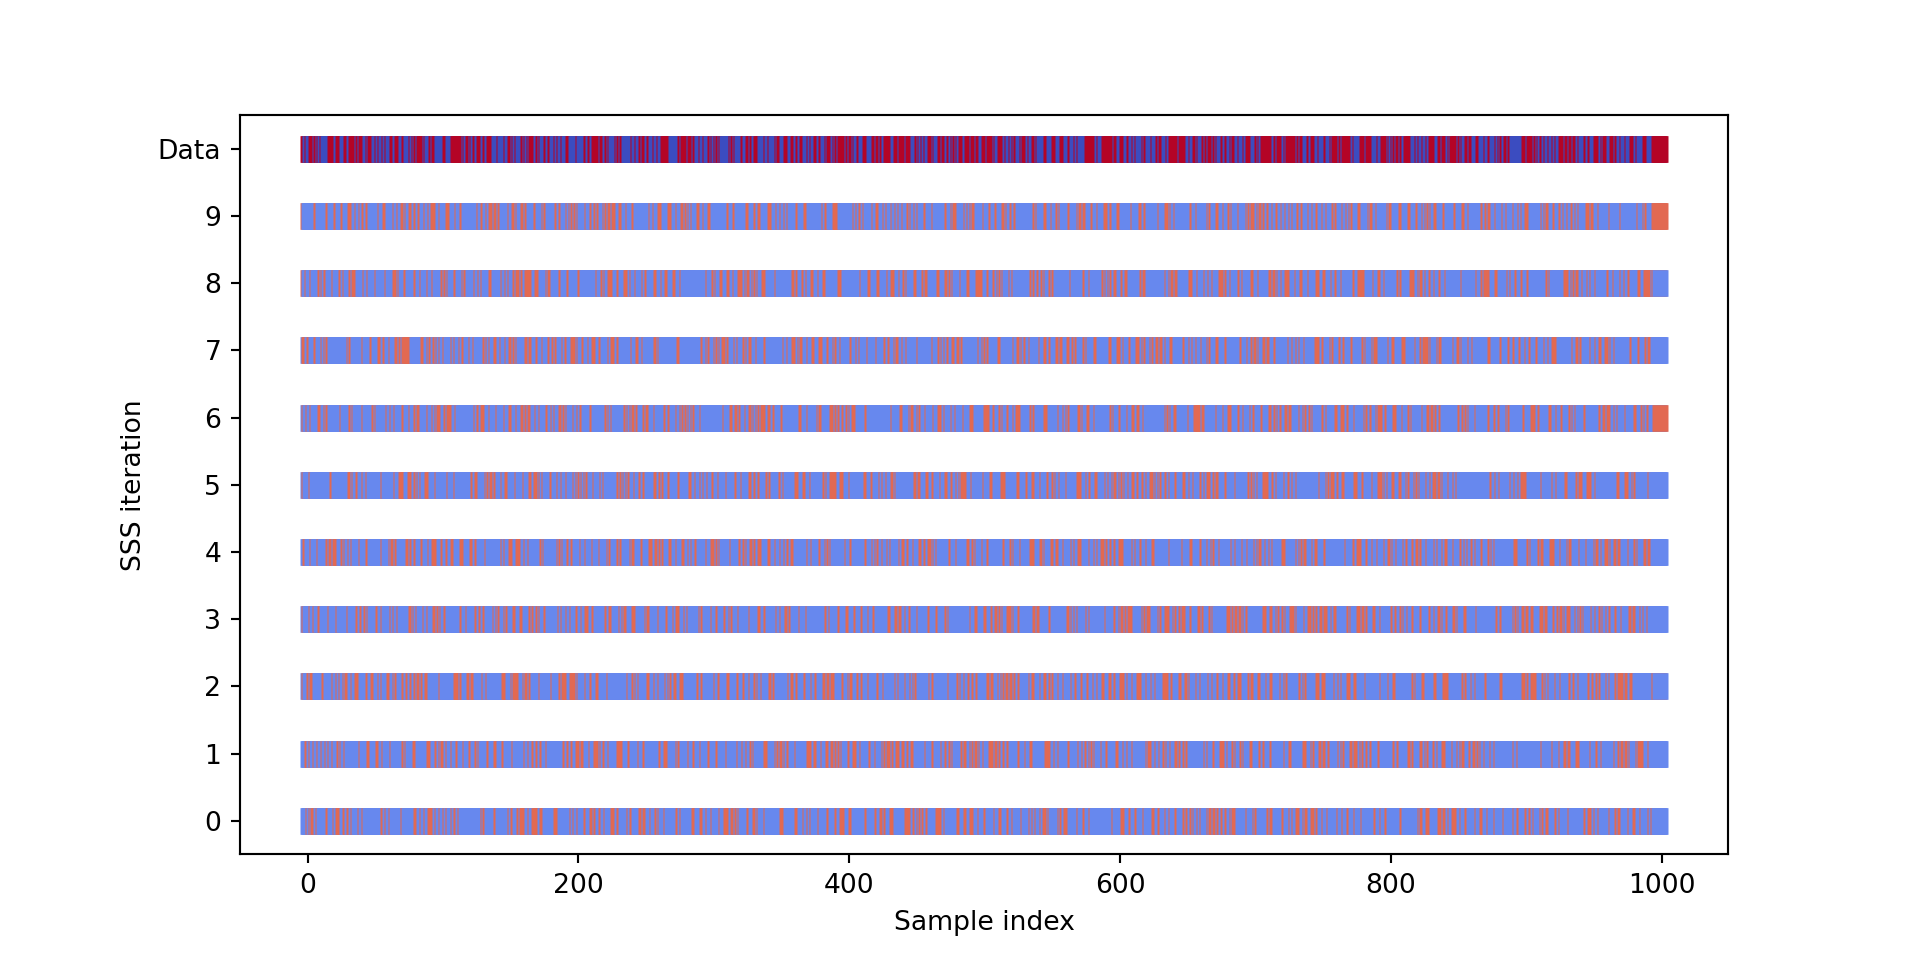

By choosing n_splits=10, we obtained ten different splits that have
similarly distributed train and test data subsets from the original
data. The fraction of the data set aside for testing is 30 %. The
different splits cover the whole data set evenly. As such, using them
for training and testing will lead to a fairly unbiased average
performance.

Let us look at the data in state space to check that the classification
task is now a real challenge.

``` python
fig, ax = subplots(figsize=(8, 8))

for train_index, test_index in sss.split(X, y):
    ax.scatter(X[train_index, 0], X[train_index, 1], c=y[train_index], cmap='Set1', s=30, marker='^', alpha=.5)
    ax.scatter(X[test_index, 0], X[test_index, 1], c=y[test_index], cmap='cool', s=30, alpha=.5, marker='*', label='Test');

show()
```

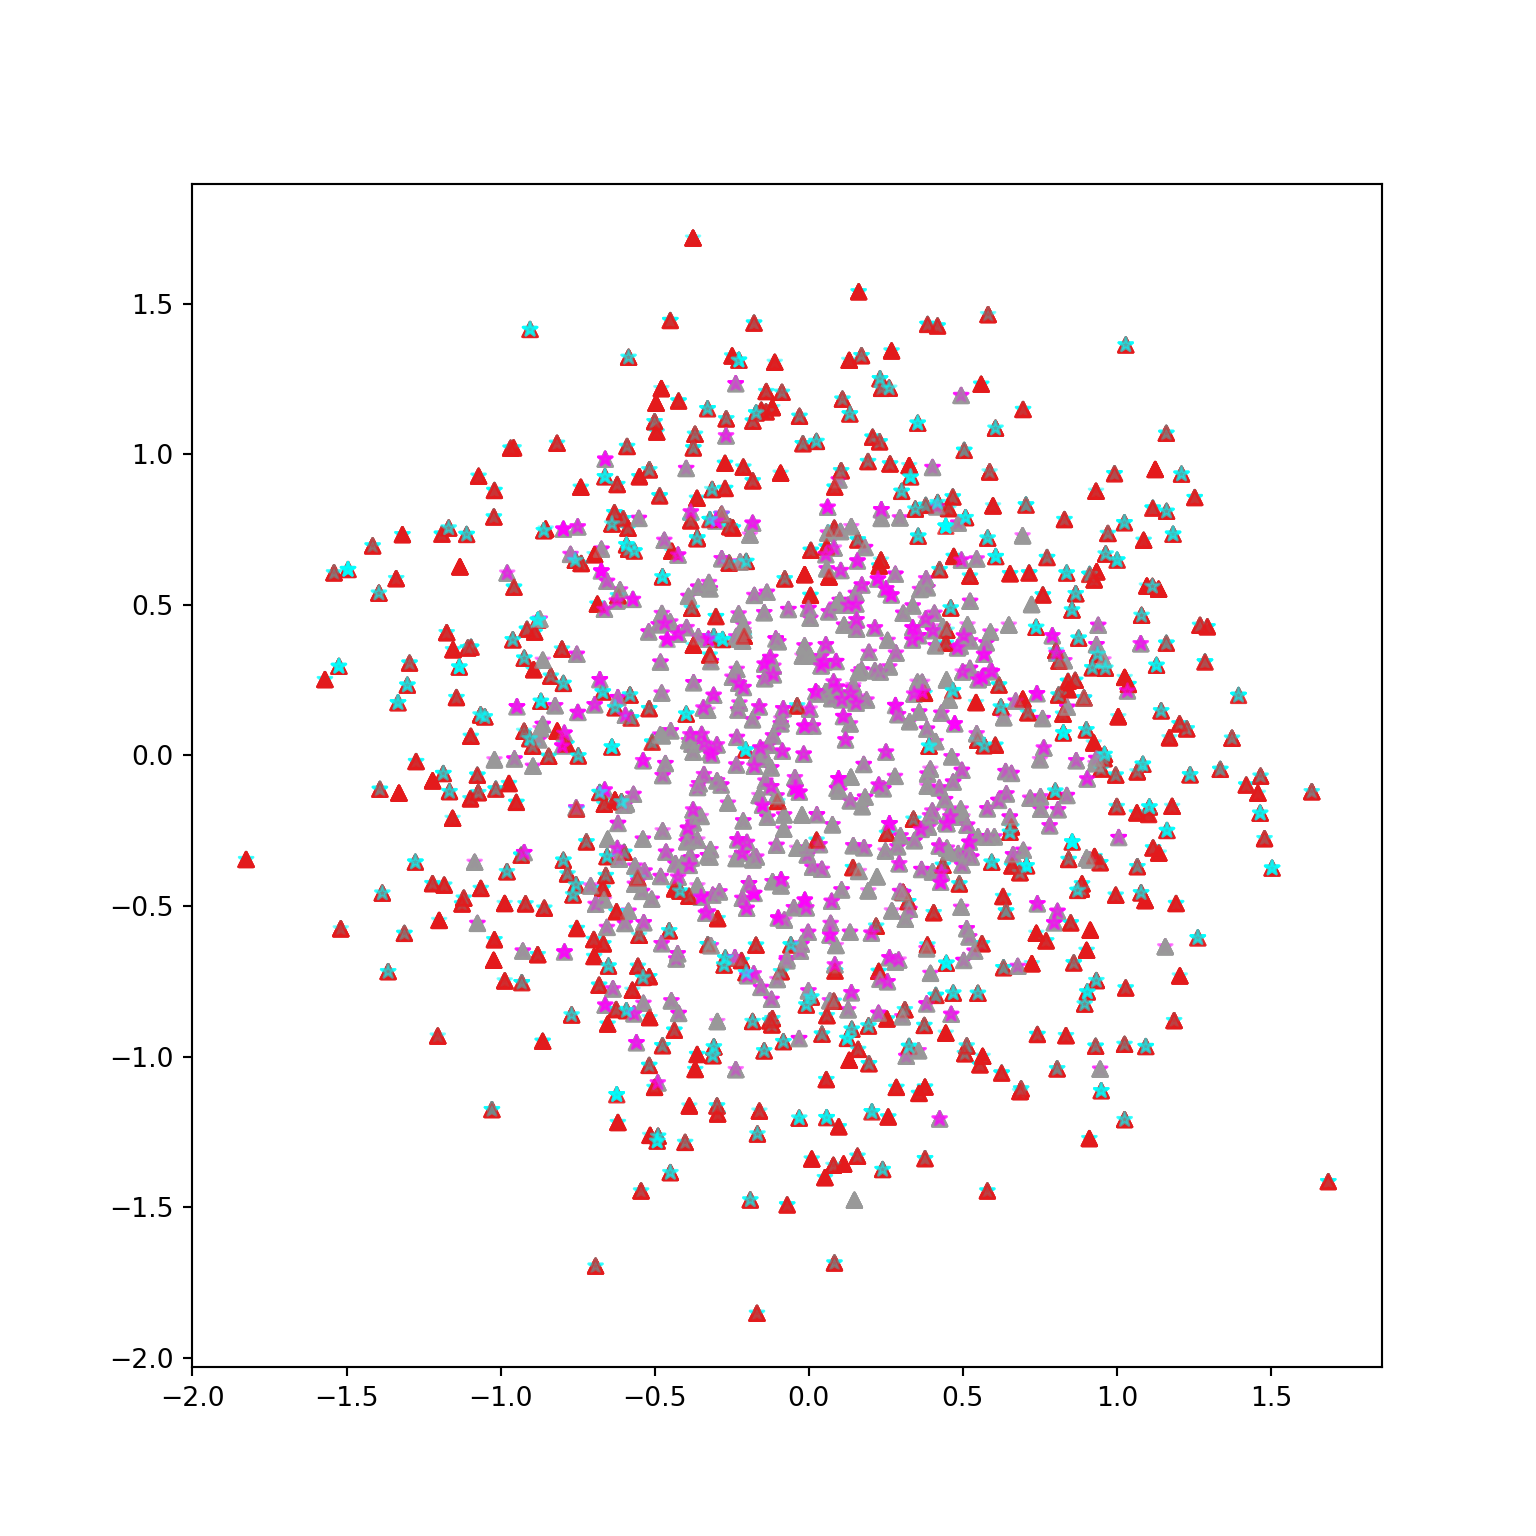

These are the scatter plots of the training (magenta) and testing (blue)
data. Here are their distributions:

``` python
fig, ax = subplots(figsize=(8, 8))

for train_index, test_index in sss.split(X, y):
    ax.hist(X[train_index], color=['magenta', 'red'], alpha=.5, histtype='step')
    ax.hist(X[test_index], color=['cyan', 'blue'], alpha=.4, histtype='step');

show()
```

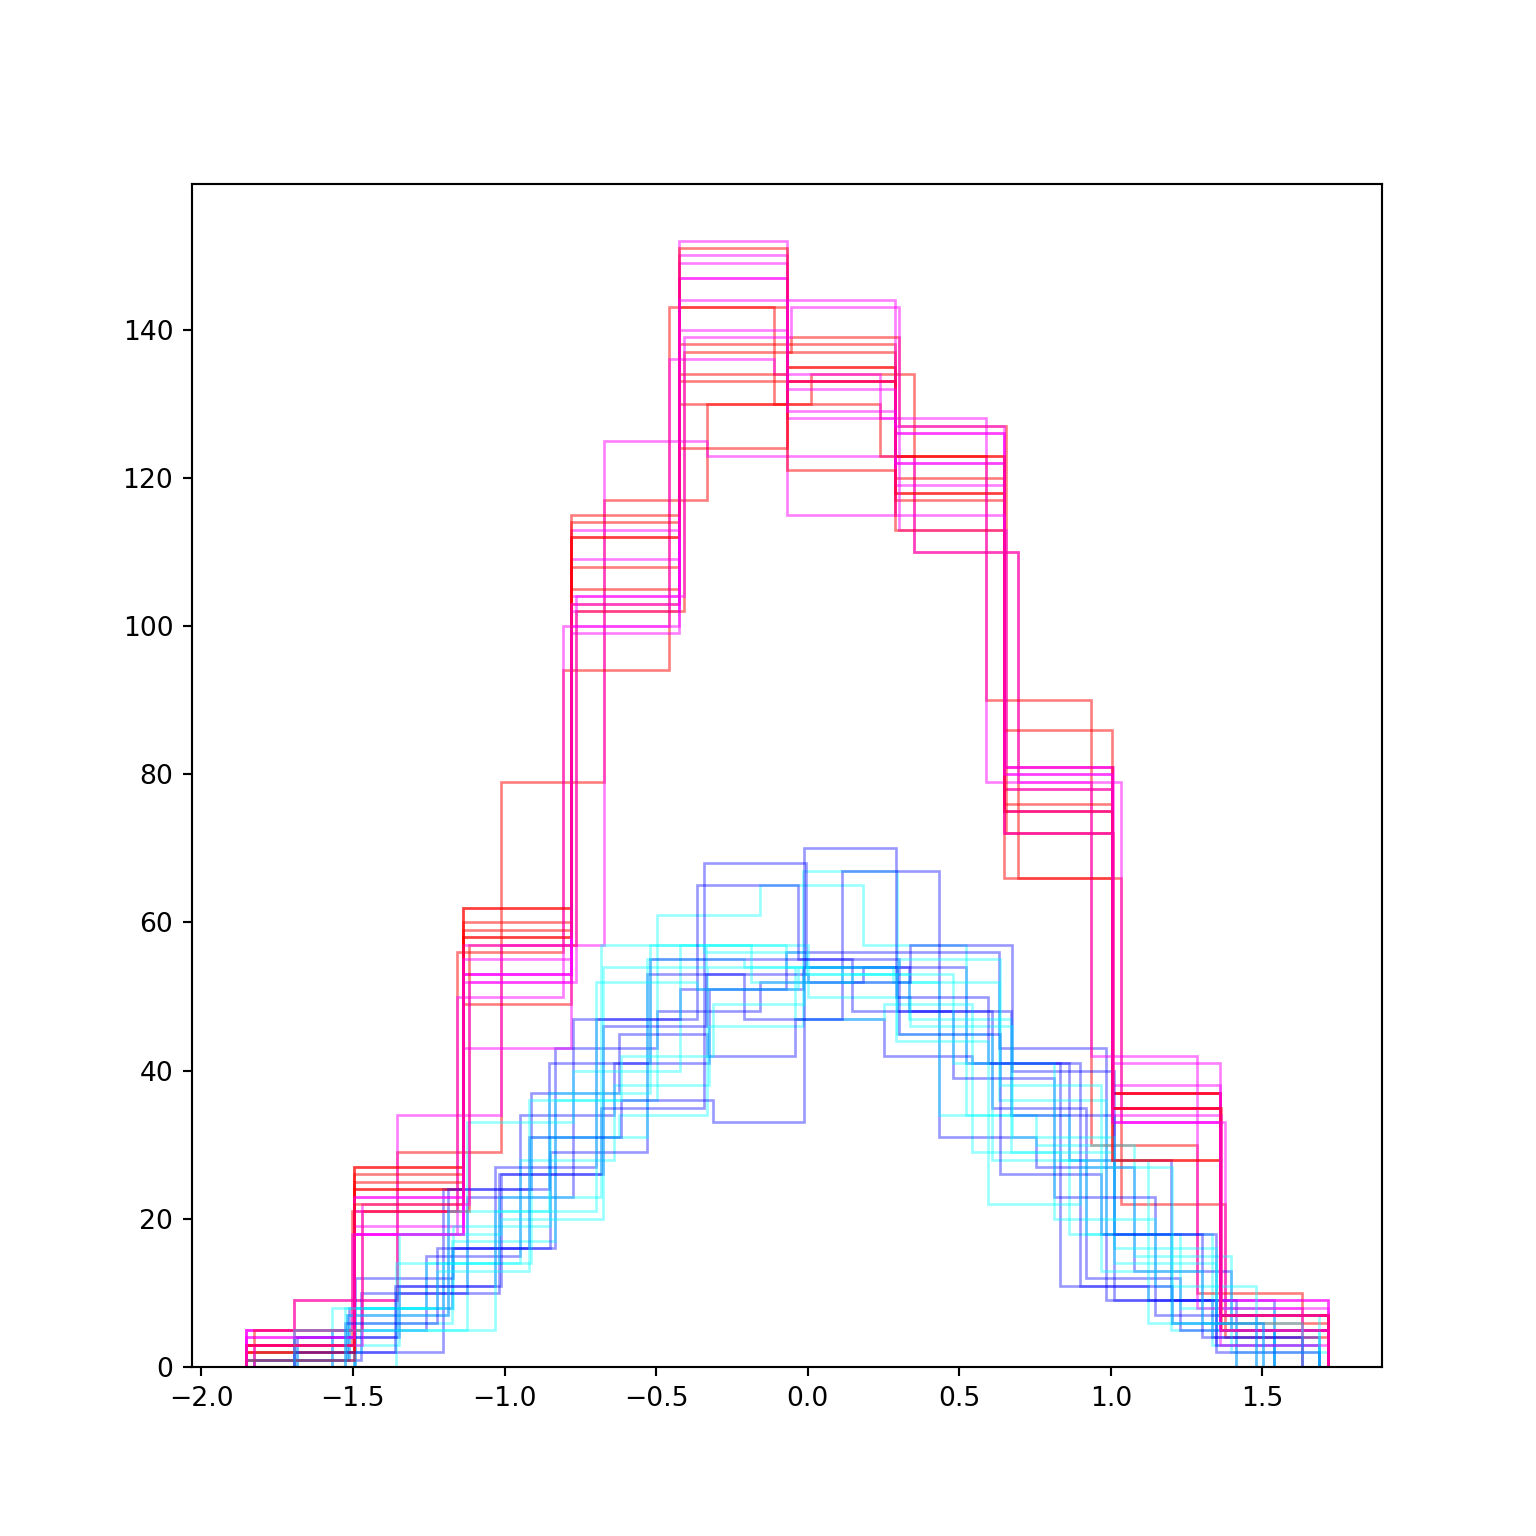

The distributions differ in height because less data are in the testing
test. Otherwise they are similarly centred and spread. Using a number of
realisations (instead of just one) we expect to obtain a more accurate
and robust result of the training.

We now train our classifiers on these different splits and obtain the
respective scores. They will give a robust measure of the classifier’s
performance given the data and avoid potential bias due to the selection
of specific test data.

``` python
X, y = make_circles(n_samples=1000, factor=.3, noise=.4, random_state=RANDOM_STATE)

split_data_indices = sss.split(X=X, y=y)

score = list()

for train_index, test_index in sss.split(X, y):
    X_s, y_s = X[train_index, :], y[train_index]
    new_obs_s, y_test_s = X[test_index, :], y[test_index]

    score_clf = list()

    for name, clf in classifiers.items():

        clf.fit(X_s, y_s)
        y_pred = clf.predict(new_obs_s)
        score_clf.append(clf.score(new_obs_s, y_test_s))

    score.append(score_clf)

score_mean = mean(score, axis=0)

bins = arange(len(score_mean))

fig, ax = subplots()

ax.bar(bins, score_mean);
ax.set_xticks(arange(0,8)+0.4)
ax.set_xticklabels(classifiers.keys(), rotation=-70);

show()

print(classifiers.keys())
print('Average scores: ')
print(["{0:0.2f}".format(ind) for ind in score_mean])
```

    MLPClassifier(max_iter=5000, random_state=1234)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

MLPClassifier

<a
href="https://scikit-learn.org/1.6/modules/generated/sklearn.neural_network.MLPClassifier.html"
class="sk-estimator-doc-link fitted" rel="noreferrer"
target="_blank">?<span>Documentation for MLPClassifier</span></a><span class="sk-estimator-doc-link fitted">iFitted</span>

    MLPClassifier(max_iter=5000, random_state=1234)

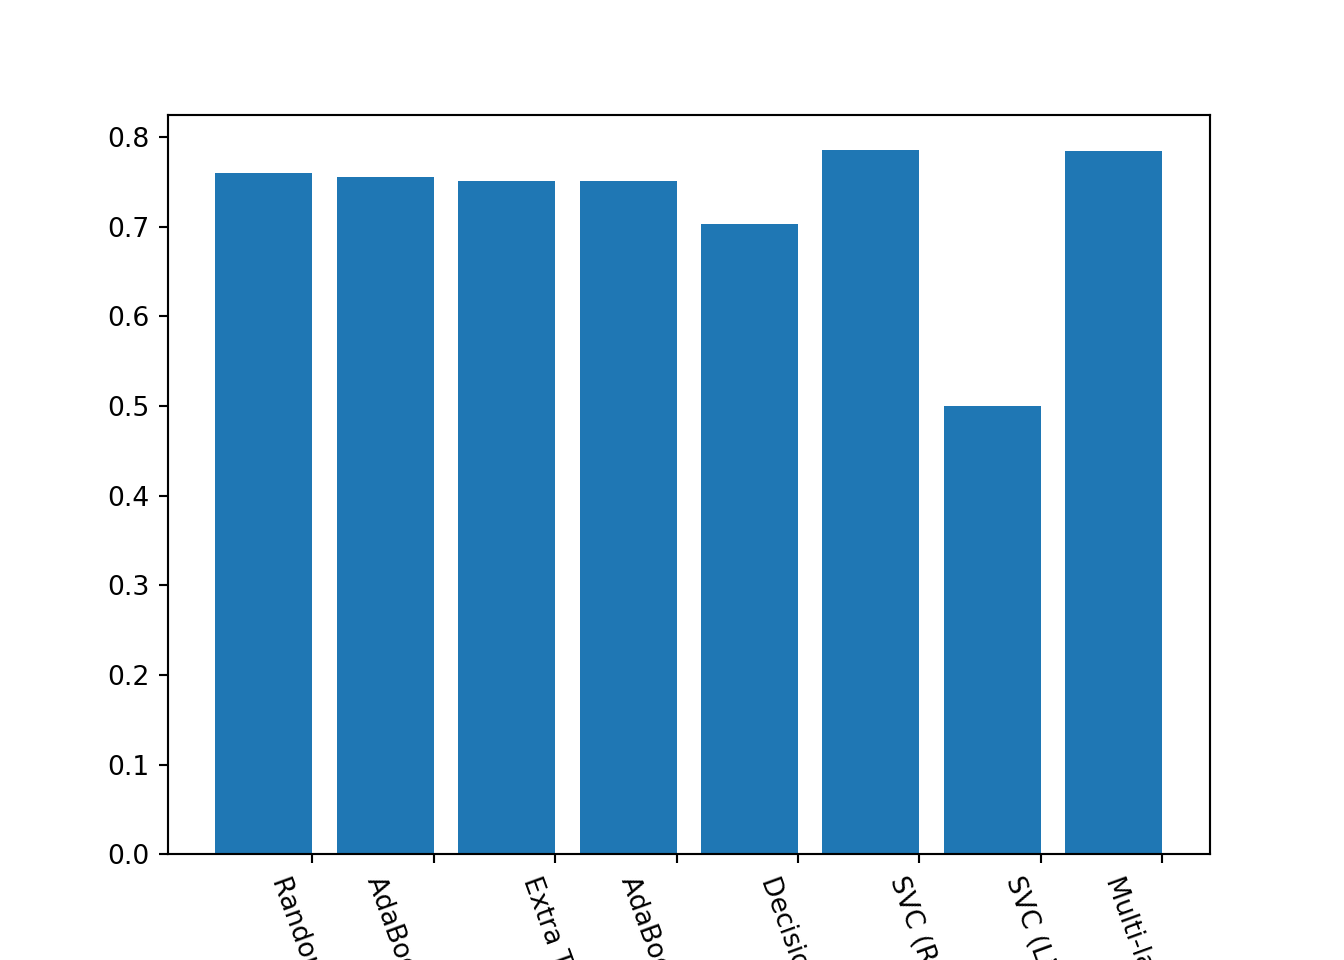

    dict_keys(['Random Forest', 'AdaBoost (Random Forest)', 'Extra Trees', 'AdaBoost (Extra Tree)', 'Decision Tree', 'SVC (RBF)', 'SVC (Linear)', 'Multi-layer Perceptron'])
    Average scores: 
    ['0.76', '0.76', '0.75', '0.75', '0.70', '0.79', '0.50', '0.78']

The result is the average score for the ten splits performed. All
results for the noise-contaminated data are now in the seventies.

This is still good given the quality of the data. It appears that the
*decision tree* classifier gives the lowest result for this kind of
problem, *SVC (RBF)* scores highest. We have to keep in mind, however,
that we are using the classifiers with their default settings. We will
later use variation of the so-called hyperparameters to further improve
the classification score.

Here we have used a for loop to train and test on each of the different
splits of the data. SciKit Learn also contains functions that take the
stratified shuffle split as an argument, e.g. `permutation_test_score`.
In that case, the splits do not need to be done separately.

We have now reached a point where we can trust to have a robust and
unbiased outcome of the training. Let us now look at more refined ways
to quantify the result.

## Evaluation: ROC and AUC

There are various measures that may be used to evaluate the performance
of a machine learning model. Such measures look at different
characteristics, including the goodness of fit and generalisability of a
model. Evaluation measures used with regards to classification models
include, but are not limited to:

-   Receiver Operation Characteristic (ROC) and Area Under the Curve
    (AUC) - for binary classifiers.
-   Accuracy
-   Precision
-   Recall

There are many other metrics that, depending on the problem, we may use
to evaluate a machine learning model. Please see [the official
documentations](https://scikit-learn.org/stable/modules/model_evaluation.html)
for additional information on these measures and their implementation in
SciKit Learn.

The quantities we are going to look at are the **Receiver Operation
Characteristic (ROC)** and the **Area Under the Curve (AUC)**.

A receiver operation characteristic, often referred to as the **ROC
curve**, is a visualisation of the discrimination threshold in a binary
classification model. It illustrates the rate of true positives (TPR)
against the rate of false positives (FPR) at different thresholds. The
aforementioned rates are essentially defined as:

-   True Positive Rate (TPR): the sensitivity of the model
-   False Positive Rate (FPR): one minus the specificity of the model

This makes ROC a measure of sensitivity versus specificity.

The area under the ROC curve, often referred to as AUC, reduces the
information contained within a ROC curve down to a value between 0 and
1, with 1 being a perfect fit. An AUC value of 0.5 represents any random
guess, and values below demonstrate a performance that’s even worse than
a lucky guess!

`SciKit Learn` includes specialist functions called `roc_curve` and
`roc_auc_score` to obtain ROC (FPR and TPR values for visualisation) and
AUC respectively. Both functions receive as input arguments the test
labels (i.e. `y_test`) and the score (probability) associated with each
prediction. We obtain the latter measure using one of the following two
techniques:

-   Decision function: where classification models have a
    `.decision_function` method that provides us with score associated
    with each label.
-   Probability: where classification models have a `.predict_proba`
    method that provides us with the probability associated with each
    prediction (we used it in the Classification Introduction lesson).
    In this case, however, the results are provided in the form of a
    two-dimensional array where columns represent different labels (as
    defined in property). Given that we will plot ROC curves for binary
    problems (two labels), we only pick one of these columns. Usually,
    the second column (the feature representing `True` or **1**) is the
    one to choose. However, if you notice that the results are
    unexpectedly bad, you may try the other column just be sure.

We can see that our classifiers now reach different degrees of
prediction. The degree can be quantified by the **Area Under the Curve
(AUC)**. It refers to the area between the blue ROC curve and the orange
diagonal. The area under the ROC curve, often referred to as AUC,
reduces the information contained within a ROC curve down to a value
between and 0 and 1, with 1 being a perfect fit. An AUC value of 0.5
represents a random guess, and values below the diagonal demonstrate a
performance that’s even worse than a guess!

SciKit Learn includes specialist functions called `roc_curve` and
`roc_auc_score` to obtain ROC (FPR and TPR values for visualisation) and
AUC respectively. Both function receive as input arguments the test
labels (i.e. y_score) and the score (probability) associated with each
prediction. We obtain the latter measure using one of the following two
techniques:

-   Decision function: where classification models have a
    `.decision_function` method that provides us with a score associated
    with each label.
-   Probability: where classification models have a `predict_proba_`
    method that provides us with the probability associated with each
    prediction. In this case, however, the results are provided in the
    form of a two-dimensional array where columns represents different
    labels (as defined in `.classes` property). Given that we only plot
    ROC curves for binary problems, we should only use one of these
    columns. Usually, the second column (the feature representing `True`
    or **1**) is the one to choose. However, if you notice that the
    results are unexpectedly bad, you may try the other column just be
    sure.

``` python
from sklearn.metrics import roc_curve, roc_auc_score

fig, all_axes = subplots(figsize=[15, 10], ncols=4, nrows=2, sharey=True, sharex=True)

for ax, (name, clf) in zip(all_axes.ravel(), classifiers.items()):
    clf.fit(X_train, y_train)

    # Checking whether or not the object has `decision_function`:
    if hasattr(clf, 'decision_function'):
        # If it does:
        y_score = clf.decision_function(X_test)
    else:
        # Otherwise:
        y_score = clf.predict_proba(X_test)[:, feature_2]  # We only need one column.

    # Obtaining the x- and y-axis values for the ROC curve:
    fpr, tpr, thresh = roc_curve(y_test, y_score)

    # Obtaining the AUC value:
    roc_auc = roc_auc_score(y_test, y_score)

    ax.plot(fpr, tpr, lw=2)
    ax.plot([0, 1], [0, 1], lw=1, linestyle='--')

    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')

    label = '{} - AUC: {:.2f}'.format(name, roc_auc)
    ax.set_title(label, fontsize=10)

show()
```

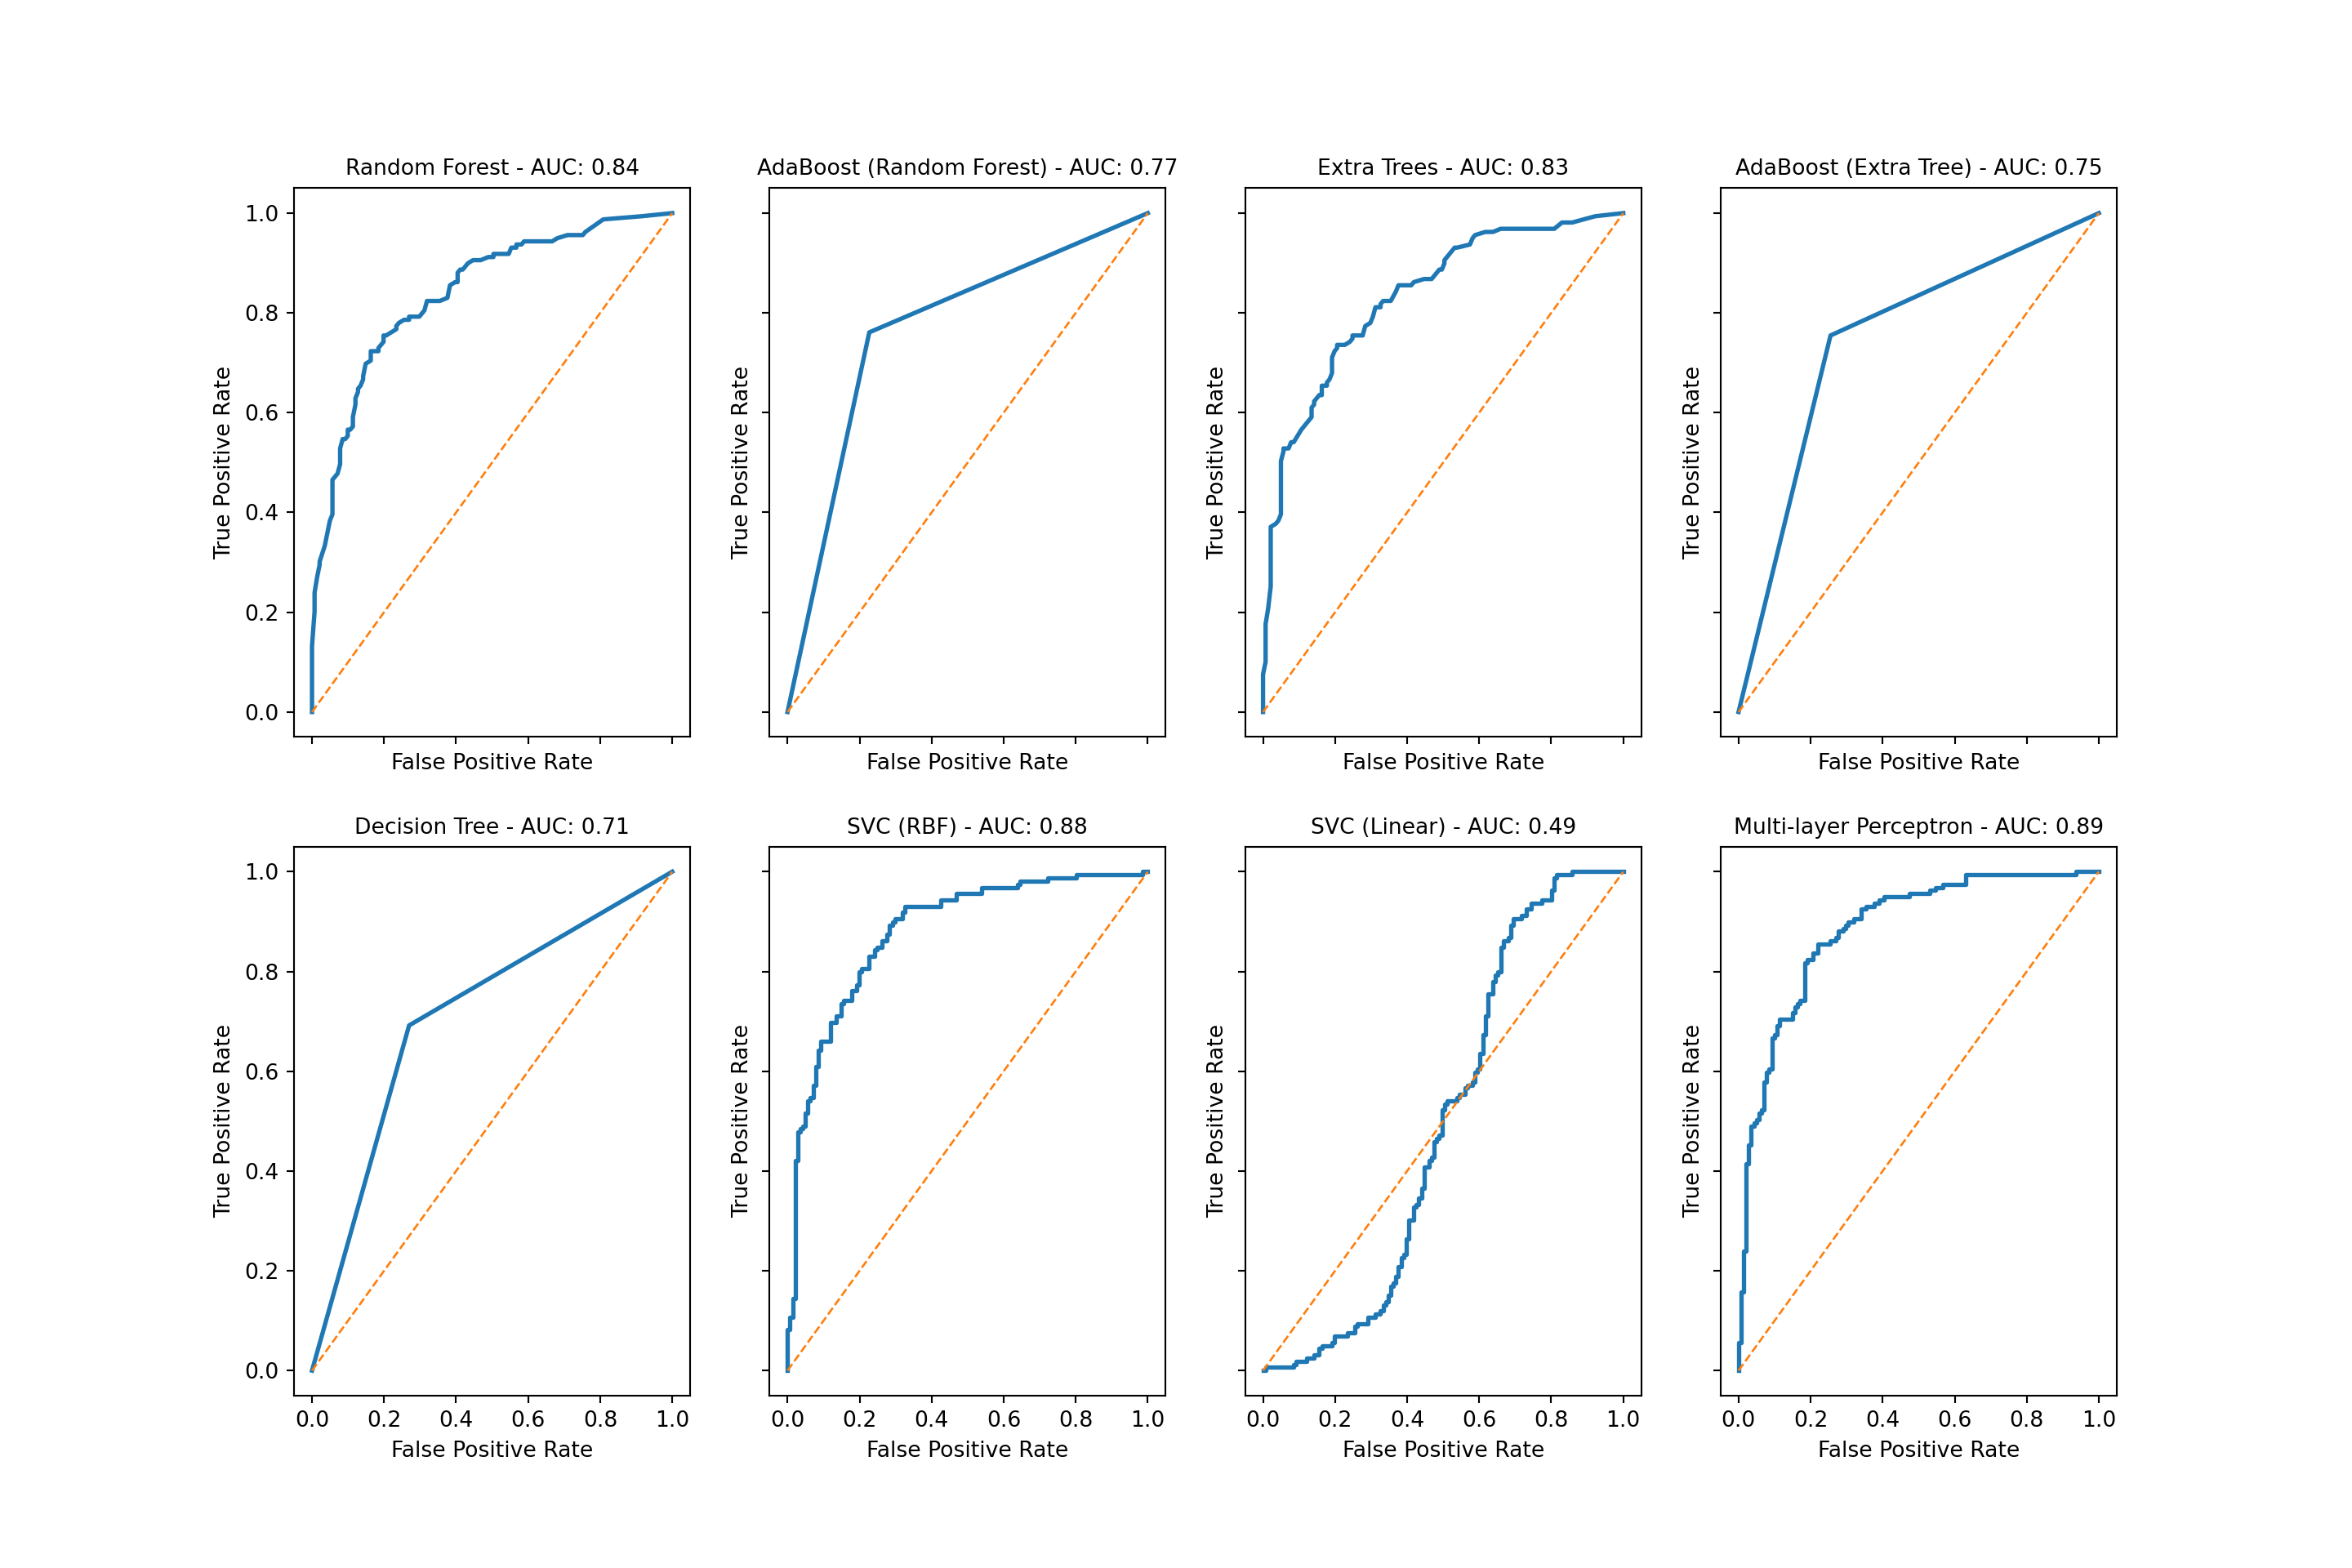

The (orange) diagonal represents predictions of the two labels by a coin
toss. To be of value the classifier must reach a ROC curve above the
diagonal.

This concludes our first steps into classification with SciKit Learn.
There are many more aspects of classification. From a practical point of
view, [data
normalisation](https://scikit-learn.org/stable/modules/preprocessing.html)
and [permutation test
score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.permutation_test_score.html)
as well as the workflow report are important. These will be the topics
of our next lesson.

  

## Exercises

#### End of chapter Exercises

Take the torus-within-a-torus data generator from the **Challenge**
above.

1.  Create data with three features and a noise level of 0.3.

2.  Create a pseudo-3D scatter plot of one of the test data sets to
    judge the difficulty of the task.

3.  Train the above introduced classifiers using the stratified shuffle
    split to generate 10 sets of testing and training data and obtain
    the average score for each classifier.

4.  Plot the feature importances obtained from the Random Forest
    classifier to see the contributions of each feature to the outcome.

Note that with 3 or more features it is no longer possible to see the
full state space in a plane.

1.  Optional: Check how the outcome varies depending on

    -   Choice of seed for random number generator
    -   Number of data splits
    -   Percentage of data withheld for testing

## Recommendation

Pick any of the provided (or other) data sets with labels to repeat the
above. Feel free to try and do any testing or plotting that you find
important. This is not an assignment to get the correct answer. Rather
at this stage, we practise to use functionality from SciKit-learn to
search for structure in the data that helps to achieve the best
predictions possible.

## Solutions are provided after assignments are marked.

-   Different classification algorithms approach problems differently.
-   `train_test_split` function tries to preserve the ratio of labels in
    the split
-   Increasing the level of noise in the data makes the task more
    complicated.
-   The potential bias due to splitting could be avoid using stratified
    shuffle split.
-   `StratifiedShuffleSplit` is a method that uses `n_splits` and
    `test_size` parameters.

LS0tCnRpdGxlOiAiSW1wcm92ZW1lbnQiCnRlYWNoaW5nOiAxMApleGVyY2lzZXM6IDIKLS0tCgpbKipEb3dubG9hZCBDaGFwdGVyIG5vdGVib29rIChpcHluYikqKl0oaHR0cHM6Ly9kcml2ZS51c2VyY29udGVudC5nb29nbGUuY29tL3UvMS91Yz9pZD0xR2liMkJlT0x6SWI2ZGdWTVFRdVBxdzhuTEE4VGkwU1gmZXhwb3J0PWRvd25sb2FkKQoKWyoqRG93bmxvYWQgQ2hhcHRlciBQREYqKl0oaHR0cHM6Ly9kcml2ZS51c2VyY29udGVudC5nb29nbGUuY29tL3UvMS91Yz9pZD0xU2tTVkFTQWJoVTFoZ3k1U2RqeFVkVjBjX2FhdFBqb3kmZXhwb3J0PWRvd25sb2FkKQoKWzxzcGFuIHN0eWxlPSJjb2xvcjogcmdiKDI1NSwgMCwgMCk7Ij4qKk1hbmRhdG9yeSBMZXNzb24gRmVlZGJhY2sgU3VydmV5Kio8L3NwYW4+XShodHRwczovL2RvY3MuZ29vZ2xlLmNvbS9mb3Jtcy9kL2UvMUZBSXBRTFNkcjBjYXBGN2psb0poUEgzUGtpMUIzTFpvS09HMTZwb09wdVZKN1NMMkxrd0xIUUEvdmlld2Zvcm0/cGxpPTEpCgpgYGB7ciBzZXR1cCwgaW5jbHVkZT1GQUxTRX0KbGlicmFyeShyZXRpY3VsYXRlKQoKIyBVbnNldCBSRVRJQ1VMQVRFX1BZVEhPTiB0byBhdm9pZCBjb25mbGljdHMgd2l0aCBwcmVsb2FkZWQgZW52aXJvbm1lbnRzClN5cy51bnNldGVudigiUkVUSUNVTEFURV9QWVRIT04iKQoKIyBDaGVjayBpZiBwYW5kb2MgaXMgYXZhaWxhYmxlCmlmICghZmlsZS5leGlzdHMoIi9vcHQvaG9tZWJyZXcvYmluL3BhbmRvYyIpKSB7CiAgc3RvcCgiUGFuZG9jIGlzIG5vdCBmb3VuZC4gUGxlYXNlIGluc3RhbGwgUGFuZG9jIG9yIHVwZGF0ZSB0aGUgcGF0aC4iKQp9CgojIERldGVjdCB0aGUgdGFyZ2V0IG91dHB1dCBmb3JtYXQKcmVuZGVyX3RvX2lweW5iIDwtIGlkZW50aWNhbChrbml0cjo6b3B0c19rbml0JGdldCgicm1hcmtkb3duLnBhbmRvYy50byIpLCAiaHRtbF9ub3RlYm9vayIpCgojIFNldCB0aGUgUHl0aG9uIGVudmlyb25tZW50IGR5bmFtaWNhbGx5CmlmIChyZW5kZXJfdG9faXB5bmIpIHsKICAjIFVzZSB0aGUgZW52aXJvbm1lbnQgb3B0aW1pemVkIGZvciByZW5kZXJpbmcgLmlweW5iCiAgdXNlX3ZpcnR1YWxlbnYoIi9Vc2Vycy9BZGFtLy52aXJ0dWFsZW52cy9yLXJldGljdWxhdGUiLCByZXF1aXJlZCA9IFRSVUUpCn0gZWxzZSB7CiAgIyBVc2UgdGhlIGdlbmVyYWwtcHVycG9zZSBQeXRob24gZW52aXJvbm1lbnQgZm9yIGV4ZWN1dGluZyBQeXRob24gY29kZQogIHVzZV9weXRob24oIi9Vc2Vycy9BZGFtLy52aXJ0dWFsZW52cy9yLXJldGljdWxhdGUvYmluL3B5dGhvbjMiLCByZXF1aXJlZCA9IFRSVUUpCn0KCiMgRGVidWdnaW5nOiBQcmludCB0aGUgYWN0aXZlIFB5dGhvbiBlbnZpcm9ubWVudApjYXQoIkFjdGl2ZSBQeXRob24gZW52aXJvbm1lbnQ6ICIsIFN5cy5nZXRlbnYoIlJFVElDVUxBVEVfUFlUSE9OIiksICJcbiIpCgojIE91dHB1dCBQeXRob24gY29uZmlndXJhdGlvbiBmb3IgZGVidWdnaW5nCnRyeUNhdGNoKAogIHsKICAgIHB5X2NvbmZpZygpCiAgfSwKICBlcnJvciA9IGZ1bmN0aW9uKGUpIHsKICAgIGNhdCgiUHl0aG9uIGNvbmZpZ3VyYXRpb24gZXJyb3I6ICIsIGUkbWVzc2FnZSwgIlxuIikKICB9CikKCiMgVGVzdCBudW1weSBpbXBvcnQgYmVmb3JlIHByb2NlZWRpbmcKdHJ5Q2F0Y2goewogIHB5X3J1bl9zdHJpbmcoImltcG9ydCBudW1weSIpCiAgY2F0KCJudW1weSBpcyBhdmFpbGFibGUuXG4iKQp9LCBlcnJvciA9IGZ1bmN0aW9uKGUpIHsKICBjYXQoIkVycm9yIGxvYWRpbmcgbnVtcHk6IiwgZSRtZXNzYWdlLCAiXG4iKQp9KQoKIyBFbnN1cmUgYC5pcHluYmAgZmlsZSBpcyBnZW5lcmF0ZWQKaWYgKHJlbmRlcl90b19pcHluYikgewogICMgUGF0aCBzZXR0aW5ncwogIGlucHV0X2ZpbGUgPC0ga25pdHI6OmN1cnJlbnRfaW5wdXQoKSAjIEdldCB0aGUgY3VycmVudCAuUm1kIGZpbGUgYmVpbmcgcHJvY2Vzc2VkCiAgaW50ZXJtZWRpYXRlX2h0bWwgPC0gZmlsZS5wYXRoKCJzaXRlL2J1aWx0Iiwgc3ViKCJcXC5SbWQkIiwgIi5uYi5odG1sIiwgYmFzZW5hbWUoaW5wdXRfZmlsZSkpKSAjIEludGVybWVkaWF0ZSAubmIuaHRtbCBmaWxlCiAgZmluYWxfaXB5bmIgPC0gZmlsZS5wYXRoKCJzaXRlL2J1aWx0Iiwgc3ViKCJcXC5SbWQkIiwgIi5pcHluYiIsIGJhc2VuYW1lKGlucHV0X2ZpbGUpKSkgIyBGaW5hbCAuaXB5bmIgZmlsZSBwYXRoCgogICMgQ2xlYW4gdXAgb2xkIG91dHB1dCBmaWxlcyBiZWZvcmUgcHJvY2Vzc2luZyBuZXcgb25lcwogIGlmIChmaWxlLmV4aXN0cyhpbnRlcm1lZGlhdGVfaHRtbCkpIHsKICAgIGZpbGUucmVtb3ZlKGludGVybWVkaWF0ZV9odG1sKQogIH0KICBpZiAoZmlsZS5leGlzdHMoZmluYWxfaXB5bmIpKSB7CiAgICBmaWxlLnJlbW92ZShmaW5hbF9pcHluYikKICB9CgogICMgV2FpdCBmb3IgdGhlIC5uYi5odG1sIHRvIGJlIGNyZWF0ZWQKICBpZiAoIWZpbGUuZXhpc3RzKGludGVybWVkaWF0ZV9odG1sKSkgewogICAgc3RvcCgiSW50ZXJtZWRpYXRlIEhUTUwgZmlsZSBub3QgY3JlYXRlZC4gQ2hlY2sgdGhlIHJlbmRlciBzdGVwLiIpCiAgfSBlbHNlIHsKICAgIGNhdCgiSW50ZXJtZWRpYXRlIEhUTUwgZmlsZSBleGlzdHM6IiwgaW50ZXJtZWRpYXRlX2h0bWwsICJcbiIpCiAgfQoKICAjIENvbnZlcnQgLm5iLmh0bWwgdG8gLmlweW5iIHVzaW5nIHBhbmRvYwogIGNvbnZlcnRfY29tbWFuZCA8LSBwYXN0ZSgKICAgICIvb3B0L2hvbWVicmV3L2Jpbi9wYW5kb2MiLCAjIEV4cGxpY2l0IHBhdGggdG8gcGFuZG9jCiAgICBzaFF1b3RlKGludGVybWVkaWF0ZV9odG1sKSwKICAgICItZiBodG1sIC10IGlweW5iIiwKICAgICItbyIsIHNoUXVvdGUoZmluYWxfaXB5bmIpCiAgKQogIAogIGNhdCgiUnVubmluZyBjb21tYW5kOiIsIGNvbnZlcnRfY29tbWFuZCwgIlxuIikKICAKICAjIENhcHR1cmUgYW5kIHByaW50IHN0ZG91dC9zdGRlcnIKICBzeXN0ZW1fb3V0cHV0IDwtIHN5c3RlbShjb252ZXJ0X2NvbW1hbmQsIGludGVybiA9IFRSVUUsIGlnbm9yZS5zdGRlcnIgPSBGQUxTRSkKICBjYXQoIkNvbW1hbmQgb3V0cHV0OlxuIiwgcGFzdGUoc3lzdGVtX291dHB1dCwgY29sbGFwc2UgPSAiXG4iKSwgIlxuIikKCiAgIyBWYWxpZGF0ZSB0aGF0IHRoZSAuaXB5bmIgZmlsZSB3YXMgY3JlYXRlZAogIGlmICghZmlsZS5leGlzdHMoZmluYWxfaXB5bmIpKSB7CiAgICBzdG9wKCJDb252ZXJzaW9uIGZhaWxlZC4gVGhlIC5pcHluYiBmaWxlIHdhcyBub3QgY3JlYXRlZC4iKQogIH0gZWxzZSB7CiAgICBjYXQoIlN1Y2Nlc3NmdWxseSBjcmVhdGVkOiIsIGZpbmFsX2lweW5iLCAiXG4iKQogIH0KfQoKIyBDb25maWd1cmUgdGhlIGNodW5rcyB0byBlbnN1cmUgUHl0aG9uIGNvZGUgaXMgZXhlY3V0YWJsZSBpbiBKdXB5dGVyIG5vdGVib29rcwprbml0cjo6b3B0c19jaHVuayRzZXQoCiAgZXZhbCA9IFRSVUUsICAgICMgRXhlY3V0ZSB0aGUgY29kZSBjaHVua3MKICBlY2hvID0gVFJVRSwgICAgIyBEaXNwbGF5IHRoZSBjb2RlIGNodW5rcyBpbiB0aGUgZmluYWwgb3V0cHV0CiAgbWVzc2FnZSA9IEZBTFNFLCAgIyBTdXBwcmVzcyBtZXNzYWdlcyBmcm9tIGJlaW5nIHNob3duCiAgd2FybmluZyA9IEZBTFNFICAgIyBTdXBwcmVzcyB3YXJuaW5ncyBmcm9tIGJlaW5nIHNob3duCikKCiMgRW5zdXJlIHRoZSBvdXRwdXQgZm9ybWF0IGlzIHNldCB0byAuaXB5bmIgZm9yIGNvbnZlcnNpb24Kb3V0cHV0X2Zvcm1hdCA8LSBrbml0cjo6b3B0c19rbml0JGdldCgicm1hcmtkb3duLnBhbmRvYy50byIpCmlmIChvdXRwdXRfZm9ybWF0ID09ICJodG1sX25vdGVib29rIikgewogIGtuaXRyOjpvcHRzX2tuaXQkc2V0KAogICAgcm1hcmtkb3duLnBhbmRvYy50byA9ICJpcHluYiIgICMgU2V0IHRoZSBvdXRwdXQgZm9ybWF0IHRvIC5pcHluYgogICkKfQpgYGAKCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6IHF1ZXN0aW9ucwoKLSBIb3cgdG8gZGVhbCB3aXRoIGNvbXBsZXggY2xhc3NpZmljYXRpb24gcHJvYmxlbXM/Ci0gV2h5IGlzIGl0IGltcG9ydGFudCB0byB1c2UgZGlmZmVyZW50IGNsYXNzaWZpY2F0aW9uIGFsZ29yaXRobXM/Ci0gV2hhdCBpcyB0aGUgYmVzdCB3YXkgdG8gZmluZCB0aGUgb3B0aW1hbCBjbGFzc2lmaWVyPwotIEhvdyBjYW4gd2UgYXZvaWQgb3Zlci1maXR0aW5nIG9mIGRhdGE/Ci0gSG93IGRvIHdlIGV2YWx1YXRlIHRoZSBwZXJmb3JtYW5jZSBvZiBjbGFzc2lmaWVycz8KCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OiBvYmplY3RpdmVzCgotIFVuZGVyc3RhbmRpbmcgY29tcGxleCB0cmFpbmluZyBhbmQgdGVzdGluZyBkYXRhLgotIENvbXBhcmlzb24gb2YgZGlmZmVyZW50IG1vZGVsIGNsYXNzZXMuCi0gRXhwbGFpbmluZyB0aGUgc3RyYXRpZmllZCBzaHVmZmxlIHNwbGl0LgotIEV2YWx1YXRpb24gb2YgY2xhc3NpZmljYXRpb24gLSB0aGUgUk9DIGFuZCBBVUMgY3VydmVzLgoKCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OgoKCjxwIGFsaWduID0gImNlbnRlciI+CjxpZnJhbWUgd2lkdGg9IjU2MCIgaGVpZ2h0PSIzMTUiIHNyYz0iaHR0cHM6Ly93d3cueW91dHViZS5jb20vZW1iZWQvTEgzY1VON1dYbGciIHRpdGxlPSJZb3VUdWJlIHZpZGVvIHBsYXllciIgZnJhbWVib3JkZXI9IjAiIGFsbG93PSJhY2NlbGVyb21ldGVyOyBhdXRvcGxheTsgY2xpcGJvYXJkLXdyaXRlOyBlbmNyeXB0ZWQtbWVkaWE7IGd5cm9zY29wZTsgcGljdHVyZS1pbi1waWN0dXJlIiBhbGxvd2Z1bGxzY3JlZW4+PC9pZnJhbWU+CjwvcD4KPGJyPgo8cCBhbGlnbiA9ICJjZW50ZXIiPgo8aWZyYW1lIHdpZHRoPSI1NjAiIGhlaWdodD0iMzE1IiBzcmM9Imh0dHBzOi8vd3d3LnlvdXR1YmUuY29tL2VtYmVkL0d2VXZ3SG1UWFVzIiB0aXRsZT0iWW91VHViZSB2aWRlbyBwbGF5ZXIiIGZyYW1lYm9yZGVyPSIwIiBhbGxvdz0iYWNjZWxlcm9tZXRlcjsgYXV0b3BsYXk7IGNsaXBib2FyZC13cml0ZTsgZW5jcnlwdGVkLW1lZGlhOyBneXJvc2NvcGU7IHBpY3R1cmUtaW4tcGljdHVyZSIgYWxsb3dmdWxsc2NyZWVuPjwvaWZyYW1lPgo8L3A+Cjxicj4KPHAgYWxpZ24gPSAiY2VudGVyIj4KPGlmcmFtZSB3aWR0aD0iNTYwIiBoZWlnaHQ9IjMxNSIgc3JjPSJodHRwczovL3d3dy55b3V0dWJlLmNvbS9lbWJlZC94anBRUmh0WTFsMCIgdGl0bGU9IllvdVR1YmUgdmlkZW8gcGxheWVyIiBmcmFtZWJvcmRlcj0iMCIgYWxsb3c9ImFjY2VsZXJvbWV0ZXI7IGF1dG9wbGF5OyBjbGlwYm9hcmQtd3JpdGU7IGVuY3J5cHRlZC1tZWRpYTsgZ3lyb3Njb3BlOyBwaWN0dXJlLWluLXBpY3R1cmUiIGFsbG93ZnVsbHNjcmVlbj48L2lmcmFtZT4KPC9wPgo8YnI+CjxwIGFsaWduID0gImNlbnRlciI+CjxpZnJhbWUgd2lkdGg9IjU2MCIgaGVpZ2h0PSIzMTUiIHNyYz0iaHR0cHM6Ly93d3cueW91dHViZS5jb20vZW1iZWQvbkV5dDFIdDhHT2siIHRpdGxlPSJZb3VUdWJlIHZpZGVvIHBsYXllciIgZnJhbWVib3JkZXI9IjAiIGFsbG93PSJhY2NlbGVyb21ldGVyOyBhdXRvcGxheTsgY2xpcGJvYXJkLXdyaXRlOyBlbmNyeXB0ZWQtbWVkaWE7IGd5cm9zY29wZTsgcGljdHVyZS1pbi1waWN0dXJlIiBhbGxvd2Z1bGxzY3JlZW4+PC9pZnJhbWU+CjwvcD4KPGJyPgoKOjo6Ojo6Ojo6Ojo6Ojo6OiBjYWxsb3V0CgojIyBSZW1hcmtzCjEuIEZyb20gbm93IG9uIHRoZSBjb2RlIHdpbGwgYmVjb21lIG1vcmUgY29tcGxleC4gV2hlbiBjb3BpZWQsIHRoZSBjb2RlIHNob3VsZCBydW4gd2l0aG91dCBlcnJvcnMgd2l0aCB0aGUgZ2l2ZW4gZGF0YSBzZXRzLiAoUGxlYXNlIHJlcG9ydCBhbnkgZXJyb3JzIHRocm93biB3aGVuIHJ1bm5pbmcgdGhlIGNvZGUgd2l0aG91dCBtb2RpZmljYXRpb25zKS4KCjIuIE1ha2UgYSBjb3B5IG9mIHRoZSBub3RlYm9vayBhbmQgc3RhcnQgZXhwZXJpbWVudGluZyBieSBtb2RpZnlpbmcgcGFydCBvZiB0aGUgY29kZSBhbmQgY29tcGFyaW5nIHRoZSBvdXRjb21lLiBNb2RpZnlpbmcgZXhpc3RpbmcgY29kZSBpcyBvbmUgb2YgdGhlIHN1Y2Nlc3NmdWwgc3RyYXRlZ2llcyB3aGVuIGxlYXJuaW5nIHRvIHByb2dyYW1tZSBhcyBhIG5vbi1wcm9ncmFtbWVyLgoKMy4gVGhlIGZpcnN0IHJlc291cmNlIHRvIGNvbnN1bHQgd2hlbiBmYWNpbmcgYnVncyBhcmUgdGhlIG9mZmljaWFsIGRvY3VtZW50YXRpb25zLCBiZSBpdCBQeXRob24sIE51bXB5LCBTY2lLaXQgTGVhcm4gb3Igb3RoZXIuCgo0LiBJZiB5b3UgZm9ybXVsYXRlIGEgcHJvYmxlbSBhZGVxdWF0ZWx5LCBvZnRlbiB0aGVyZSBtYXkgYmUgZ29vZCBhbnN3ZXJzIG9uIFtTdGFjayBPdmVyZmxvd10oaHR0cHM6Ly9zdGFja292ZXJmbG93LmNvbSkuCgo1LiBTb21ldGltZXMsIHNpbXBseSBjb3B5aW5nIGFuZCBwYXN0aW5nIGFuIGVycm9yIG1lc3NhZ2UgaW50byB0aGUgc2VhcmNoIGVuZ2luZSBjYW4gcG9pbnQgeW91IHRvIHRoZSBzb2x1dGlvbi4KCjo6Ojo6Ojo6Ojo6Ojo6OjoKCiMjIyAqKkltcG9ydCBmdW5jdGlvbnMqKgpgYGB7cHl0aG9ufQoKZnJvbSBudW1weSBpbXBvcnQgbWdyaWQsIGxpbnNwYWNlLCBjXywgYXJhbmdlLCBtZWFuLCBhcnJheQpmcm9tIG51bXB5LnJhbmRvbSBpbXBvcnQgdW5pZm9ybSwgc2VlZAoKZnJvbSBtcGxfdG9vbGtpdHMgaW1wb3J0IG1wbG90M2QKZnJvbSBtYXRwbG90bGliLnB5cGxvdCBpbXBvcnQgc3VicGxvdHMsIGF4ZXMsIHNjYXR0ZXIsIHh0aWNrcywgc2hvdwoKZnJvbSBza2xlYXJuLmRhdGFzZXRzIGltcG9ydCBtYWtlX2NpcmNsZXMKCmBgYAoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjogY2hhbGxlbmdlCiMjIENoYWxsZW5nZQo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpXZSB3b3VsZCBsaWtlIHRvIHRlc3Qgc2V2ZXJhbCBtYWNoaW5lIGxlYXJuaW5nIG1vZGVscycgYWJpbGl0eSB0byBkZWFsIHdpdGggYSBjb21wbGljYXRlZCB0YXNrLiBBIGNvbXBsaWNhdGVkIHRhc2sgaXMgb25lIHdoZXJlIHRoZSB0b3BvbG9neSBvZiB0aGUgbGFiZWxsZWQgZGF0YSBpcyBub3QgdHJpdmlhbGx5IHNlcGFyYWJsZSBpbnRvIGNsYXNzZXMgYnkgKGh5cGVyKXBsYW5lcywgZS5nLiBieSBhIHN0cmFpZ2h0IGxpbmUgaW4gYSBzY2F0dGVyIHBsb3QuCjwvcD4KCk91ciBleGFtcGxlIGlzIG9uZSBjbGFzcyBvZiBkYXRhIG9yZ2FuaXNlZCBpbiBhIGRvdWdobnV0IHNoYXBlIGFuZCB0aGUgb3RoZXIgY2xhc3MgY29udGFpbmVkIHdpdGhpbiB0aGUgZmlyc3QgZG91Z2hudXQgZm9ybWluZyBhIGRvdWdobnV0LXdpdGhpbi1hLWRvdWdobnV0LgoKSGVyZSBpcyB0aGUgZnVuY3Rpb24gY29kZSB0byBjcmVhdGUgdGhlc2UgZGF0YSwgZm9sbG93ZWQgYnkgYSBmdW5jdGlvbiBjYWxsIHRvIHByb2R1Y2UgYSBmaWd1cmUuCgoKYGBge3B5dGhvbn0KZGVmIG1ha2VfdG9ydXNfM0Qobl9zYW1wbGVzPTEwMCwgc2h1ZmZsZT1UcnVlLCBub2lzZT1Ob25lLCByYW5kb21fc3RhdGU9Tm9uZSwKICAgICAgICAgICAgICAgICBmYWN0b3I9LjgpOgogICAgIiIiTWFrZSBhIGxhcmdlIHRvcnVzIGNvbnRhaW5pbmcgYSBzbWFsbGVyIHRvcnVzIGluIDNkLgoKICAgIEEgdG95IGRhdGFzZXQgdG8gdmlzdWFsaXplIGNsdXN0ZXJpbmcgYW5kIGNsYXNzaWZpY2F0aW9uCiAgICBhbGdvcml0aG1zLgoKICAgIFJlYWQgbW9yZSBpbiB0aGUgOnJlZjpgVXNlciBHdWlkZSA8c2FtcGxlX2dlbmVyYXRvcnM+YC4KCiAgICBQYXJhbWV0ZXJzCiAgICAtLS0tLS0tLS0tCiAgICBuX3NhbXBsZXMgOiBpbnQsIG9wdGlvbmFsIChkZWZhdWx0PTEwMCkKICAgICAgICBUaGUgdG90YWwgbnVtYmVyIG9mIHBvaW50cyBnZW5lcmF0ZWQuIElmIG9kZCwgdGhlIGlubmVyIGNpcmNsZSB3aWxsCiAgICAgICAgaGF2ZSBvbmUgcG9pbnQgbW9yZSB0aGFuIHRoZSBvdXRlciBjaXJjbGUuCgogICAgc2h1ZmZsZSA6IGJvb2wsIG9wdGlvbmFsIChkZWZhdWx0PVRydWUpCiAgICAgICAgV2hldGhlciB0byBzaHVmZmxlIHRoZSBzYW1wbGVzLgoKICAgIG5vaXNlIDogZG91YmxlIG9yIE5vbmUgKGRlZmF1bHQ9Tm9uZSkKICAgICAgICBTdGFuZGFyZCBkZXZpYXRpb24gb2YgR2F1c3NpYW4gbm9pc2UgYWRkZWQgdG8gdGhlIGRhdGEuCgogICAgcmFuZG9tX3N0YXRlIDogaW50LCBSYW5kb21TdGF0ZSBpbnN0YW5jZSBvciBOb25lIChkZWZhdWx0KQogICAgICAgIERldGVybWluZXMgcmFuZG9tIG51bWJlciBnZW5lcmF0aW9uIGZvciBkYXRhc2V0IHNodWZmbGluZyBhbmQgbm9pc2UuCiAgICAgICAgUGFzcyBhbiBpbnQgZm9yIHJlcHJvZHVjaWJsZSBvdXRwdXQgYWNyb3NzIG11bHRpcGxlIGZ1bmN0aW9uIGNhbGxzLgogICAgICAgIFNlZSA6dGVybTpgR2xvc3NhcnkgPHJhbmRvbV9zdGF0ZT5gLgoKICAgIGZhY3RvciA6IDAgPCBkb3VibGUgPCAxIChkZWZhdWx0PS44KQogICAgICAgIFNjYWxlIGZhY3RvciBiZXR3ZWVuIGlubmVyIGFuZCBvdXRlciBjaXJjbGUuCgogICAgUmV0dXJucwogICAgLS0tLS0tLQogICAgWCA6IGFycmF5IG9mIHNoYXBlIFtuX3NhbXBsZXMsIDJdCiAgICAgICAgVGhlIGdlbmVyYXRlZCBzYW1wbGVzLgoKICAgIHkgOiBhcnJheSBvZiBzaGFwZSBbbl9zYW1wbGVzXQogICAgICAgIFRoZSBpbnRlZ2VyIGxhYmVscyAoMCBvciAxKSBmb3IgY2xhc3MgbWVtYmVyc2hpcCBvZiBlYWNoIHNhbXBsZS4KICAgICIiIgogICAgZnJvbSBudW1weSBpbXBvcnQgcGksIGxpbnNwYWNlLCBjb3MsIHNpbiwgYXBwZW5kLCBvbmVzLCB6ZXJvcywgaHN0YWNrLCB2c3RhY2ssIGludHAKICAgIGZyb20gc2tsZWFybi51dGlscyBpbXBvcnQgY2hlY2tfcmFuZG9tX3N0YXRlLCBzaHVmZmxlCgogICAgaWYgZmFjdG9yID49IDEgb3IgZmFjdG9yIDwgMDoKICAgICAgICByYWlzZSBWYWx1ZUVycm9yKCInZmFjdG9yJyBoYXMgdG8gYmUgYmV0d2VlbiAwIGFuZCAxLiIpCgogICAgbl9zYW1wbGVzX291dCA9IG5fc2FtcGxlcyAvLyAyCiAgICBuX3NhbXBsZXNfaW4gPSBuX3NhbXBsZXMgLSBuX3NhbXBsZXNfb3V0CgogICAgY28sIGFvLCBjaSwgYWkgPSAzLCAxLCAzLjYsIDAuMgogICAgZ2VuZXJhdG9yID0gY2hlY2tfcmFuZG9tX3N0YXRlKHJhbmRvbV9zdGF0ZSkKICAgICMgdG8gbm90IGhhdmUgdGhlIGZpcnN0IHBvaW50ID0gbGFzdCBwb2ludCwgd2Ugc2V0IGVuZHBvaW50PUZhbHNlCiAgICBsaW5zcGFjZV9vdXQgPSBsaW5zcGFjZSgwLCAyICogcGksIG5fc2FtcGxlc19vdXQsIGVuZHBvaW50PUZhbHNlKQogICAgbGluc3BhY2VfaW4gID0gbGluc3BhY2UoMCwgMiAqIHBpLCBuX3NhbXBsZXNfaW4sICBlbmRwb2ludD1GYWxzZSkKICAgIG91dGVyX2NpcmNfeCA9IChjbythbypjb3MobGluc3BhY2Vfb3V0KSkgKiBjb3MobGluc3BhY2Vfb3V0KjYxLjEpCiAgICBvdXRlcl9jaXJjX3kgPSAoY28rYW8qY29zKGxpbnNwYWNlX291dCkpICogc2luKGxpbnNwYWNlX291dCo2MS4xKQogICAgb3V0ZXJfY2lyY196ID0gICAgYW8qc2luKGxpbnNwYWNlX291dCkKCiAgICBpbm5lcl9jaXJjX3ggPSAoY2krYWkqY29zKGxpbnNwYWNlX2luKSkgKiBjb3MobGluc3BhY2VfaW4qNjEuMSkqIGZhY3RvcgogICAgaW5uZXJfY2lyY195ID0gKGNpK2FpKmNvcyhsaW5zcGFjZV9pbikpICogc2luKGxpbnNwYWNlX2luKjYxLjEpICogZmFjdG9yCiAgICBpbm5lcl9jaXJjX3ogPSAgICBhaSpzaW4obGluc3BhY2VfaW4pICogZmFjdG9yCgogICAgWCA9IHZzdGFjayhbYXBwZW5kKG91dGVyX2NpcmNfeCwgaW5uZXJfY2lyY194KSwKICAgICAgICAgICAgICAgIGFwcGVuZChvdXRlcl9jaXJjX3ksIGlubmVyX2NpcmNfeSksCiAgICAgICAgICAgICAgICBhcHBlbmQob3V0ZXJfY2lyY196LCBpbm5lcl9jaXJjX3opXSkuVAoKICAgIHkgPSBoc3RhY2soW3plcm9zKG5fc2FtcGxlc19vdXQsIGR0eXBlPWludHApLAogICAgICAgICAgICAgICAgICAgb25lcyhuX3NhbXBsZXNfaW4sIGR0eXBlPWludHApXSkKCgogICAgaWYgc2h1ZmZsZToKICAgICAgICBYLCB5ID0gc2h1ZmZsZShYLCB5LCByYW5kb21fc3RhdGU9Z2VuZXJhdG9yKQoKICAgIGlmIG5vaXNlIGlzIG5vdCBOb25lOgogICAgICAgIFggKz0gZ2VuZXJhdG9yLm5vcm1hbChzY2FsZT1ub2lzZSwgc2l6ZT1YLnNoYXBlKQoKICAgIHJldHVybiBYLCB5CgpgYGAKCgpgYGB7cHl0aG9ufQpSQU5ET01fU1RBVEUgID0gMTIzNDUKc2VlZChSQU5ET01fU1RBVEUpCgpYLCB5ID0gbWFrZV90b3J1c18zRChuX3NhbXBsZXM9MjAwMCwgZmFjdG9yPS45LCBub2lzZT0uMDAxLCByYW5kb21fc3RhdGU9UkFORE9NX1NUQVRFKQoKZmVhdHVyZV8xLCBmZWF0dXJlXzIsIGZlYXR1cmVfMyA9IDAsIDEsIDIKZnRfbWluLCBmdF9tYXggPSBYLm1pbigpLCBYLm1heCgpCgpmaWcsIGF4ID0gc3VicGxvdHMoZmlnc2l6ZT0oMTIsIDkpKQoKYXggPSBheGVzKHByb2plY3Rpb249IjNkIikKCmltID0gYXguc2NhdHRlcjNEKFhbOiwgZmVhdHVyZV8xXSwgWFs6LCBmZWF0dXJlXzJdLCBYWzosIGZlYXR1cmVfM10sIG1hcmtlcj0nbycsIHM9MjAsIGM9eSwgY21hcD0nYndyJyk7CgpheC5zZXRfeGxhYmVsKCdGZWF0dXJlIDEnKQpheC5zZXRfeWxhYmVsKCdGZWF0dXJlIDInKQpheC5zZXRfemxhYmVsKCdGZWF0dXJlIDMnKQoKIyBBbmdsZXMgdG8gcGljayB0aGUgcGVyc3BlY3RpdmUKYXgudmlld19pbml0KDMwLCA1MCk7CgpzaG93KCkKYGBgCgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpUaGUgY2hhbGxlbmdlIGhlcmUgaXMgdGhhdCB0aGUgb25seSB3YXkgdG8gc2VwYXJhdGUgdGhlIGRhdGEgb2YgdGhlIHR3byBsYWJlbHMgZnJvbSBlYWNoIG90aGVyIGlzIHRvIGZpbmQgYSBzZXBhcmF0aW5nIGJvcmRlciB0aGF0IGxpZXMgYmV0d2VlbiB0aGUgYmx1ZSBhbmQgdGhlIHJlZCBkb3VnaG51dCAobWF0aGVtYXRpY2FsbHk6IHRvcnVzKSBhbmQgaXRzZWxmIGlzIGEgdG9ydXMsIGkuZS4gYSBjb21wbGV4IHRvcG9sb2d5LiBTaW1pbGFybHksIG9uZSBjYW4gdGVzdCB0byBzZXBhcmF0ZSBvbmUgY2xhc3Mgb2YgZGF0YSB0aGF0IGxpZSBvbiB0aGUgc3VyZmFjZSBvZiBhIHNwaGVyZSBhbmQgdGhlbiBoYXZlIGRhdGEgb24gYW5vdGhlciBzcGhlcmUgZW1iZWRkZWQgd2l0aGluIGl0LiBUeXBpY2FsbHksIGl0IGlzIHVua25vd24gd2hhdCB0eXBlIG9mIGhpZ2gtZGltZW5zaW9uYWwgdG9wb2xvZ2llcyBpcyBwcmVzZW50IGluIGJpb2xvZ2ljYWwgZGF0YS4gQXMgc3VjaCBpdCBpcyBub3QgY2xlYXIgYXQgdGhlIG91dHNldCB3aGljaCBjbGFzc2lmaWNhdGlvbiBzdHJhdGVneSB3aWxsIHdvcmsgYmVzdC4gTGV0IHVzIHN0YXJ0IHdpdGggYSBzaW1wbGVyIGV4YW1wbGUuCjwvcD4KCgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OgoKIyMgVHJhaW5nIGEgdmFyaWV0eSBvZiBtYWNoaW5lIGxlYXJuaW5nIG1vZGVscwoKYFNjaUtpdCBMZWFybmAgcHJvdmlkZXMgdGhlIG1lYW5zIHRvIGdlbmVyYXRlIHByYWN0aWNlIGRhdGFzZXRzIHdpdGggc3BlY2lmaWMgcXVhbGl0aWVzLiBJbiB0aGlzIHNlY3Rpb24sIHdlIHdpbGwgdXNlIHRoZSBgbWFrZV9jaXJjbGVzYCBmdW5jdGlvbi4gKHNlZSB0aGUgW2RvY3VtZW50YXRpb25zXShodHRwczovL3NjaWtpdC1sZWFybi5vcmcvc3RhYmxlL21vZHVsZXMvZ2VuZXJhdGVkL3NrbGVhcm4uZGF0YXNldHMubWFrZV9jaXJjbGVzLmh0bWwpKToKCiMjIyAqKkNpcmN1bGFyIFRlc3QgRGF0YSoqCgoKYGBge3B5dGhvbn0KUkFORE9NX1NUQVRFICA9IDEyMzQKc2VlZChSQU5ET01fU1RBVEUpCgpYLCB5ID0gbWFrZV9jaXJjbGVzKG5fc2FtcGxlcz01MDAsIGZhY3Rvcj0wLjMsIG5vaXNlPS4wNSwgcmFuZG9tX3N0YXRlPVJBTkRPTV9TVEFURSkKCmZlYXR1cmVfMSwgZmVhdHVyZV8yID0gMCwgMQpmdF9taW4sIGZ0X21heCA9IFgubWluKCksIFgubWF4KCkKCnByaW50KCdTaGFwZSBvZiBYOicsIFguc2hhcGUpCgpmaWcsIGF4ID0gc3VicGxvdHMoZmlnc2l6ZT0oMTAsIDUpLCBucm93cz0xLCBuY29scz0yKQpheFswXS5zY2F0dGVyKFhbOiwgZmVhdHVyZV8xXSwgWFs6LCBmZWF0dXJlXzJdLCBjPXksIHM9NCwgY21hcD0nYndyJyk7CmF4WzFdLmhpc3QoWCk7CgpzaG93KCkKYGBgCgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpUaGUgZnVuY3Rpb24geWllbGRzIG9ubHkgdHdvIGZlYXR1cmVzLiBUaGUgcmVhc29uIGlzIHRoYXQgd2l0aCB0d28gZmVhdHVyZXMgd2UgY2FuIHZpc3VhbGlzZSB0aGUgY29tcGxldGUgc3RhdGUgc3BhY2UgaW4gYSB0d28tZGltZW5zaW9uYWwgc2NhdHRlciBwbG90LiBUaGUgZGF0YSBvZiBib3RoIGxhYmVscyBhcmUgb3JnYW5pc2VkIGFsb25nIGEgcmluZy4gVGhlcmUgaXMgYSBjZXJ0YWluIGFtb3VudCBvZiByYW5kb21uZXNzIGFkZGVkIHRvIGNyZWF0ZSBkYXRhIGRpc3RyaWJ1dGVkIG5vcm1hbGx5IGFyb3VuZCB0aGUgcmluZy4KPC9wPgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpUaGUgdHJpY2t5IHRoaW5nIGFib3V0IHN1Y2ggYSBkYXRhIGRpc3RyaWJ1dGlvbiBpcyB0aGF0IGluIGEgc3RhbmRhcmQgdmlldyBvZiB0aGUgZGF0YSwgdGhlIGhpc3RvZ3JhbSwgdGhlIGNsZWFyIHN0YXRlIHNwYWNlIG9yZ2FuaXNhdGlvbiBpcyBub3QgdmlzaWJsZS4gVGhlcmUgYXJlIGUuZy4gbm8gdHdvIGRpc3RpbmN0IG1lYW4gdmFsdWVzIG9mIHRoZSBkaXN0cmlidXRpb25zLiBBbHNvLCB3aGlsZSB0aGUgdHdvIGZlYXR1cmVzIGFyZSBjbGVhcmx5IGRlcGVuZGVudCBvbiBlYWNoIG90aGVyIChhcyBzZWVuIGluIHRoZSBzY2F0dGVyIHBsb3QpLCBpdCBpcyBub3QgcG9zc2libGUgdG8gcmVncmVzcyBvbmUgd2l0aCB0aGUgb3RoZXIgYnkgbWVhbnMgb2YgZml0cyBvZiB0aGUgdHlwZSB5ID0gZih4KS4KPC9wPgoKV2Ugd2lsbCBub3cgdXNlIGRpZmZlcmVudCBjbGFzc2VzIG9mIG1hY2hpbmUgbGVhcm5pbmcgbW9kZWxzIHRvIGZpdCB0byB0aGVzZSBsYWJlbGxlZCBkYXRhLgoKCiMjIyAqKkNsYXNzaWZpY2F0aW9uIEFsZ29yaXRobXMqKgoKRGlmZmVyZW50IGNsYXNzaWZpY2F0aW9uIGFsZ29yaXRobXMgYXBwcm9hY2ggcHJvYmxlbXMgZGlmZmVyZW50bHkuIExldCB1cyBuYW1lIHRoZSBhbGdvcml0aG1zIGluIGBTY2lLaXQgTGVhcm5gLgoKYFNjaUtpdCBMZWFybmAgcHJvdmlkZXMgdGhlIGZvbGxvd2luZyBhbGdvcml0aG1zIGZvciBjbGFzc2lmaWNhdGlvbiBwcm9ibGVtczoKCi0gRW5zZW1ibGU6IEF2ZXJhZ2luZzoKICAgIC0gUmFuZG9tIEZvcmVzdAogICAgLSBFeHRyYSBUcmVlCiAgICAtIElzb2xhdGlvbiBGb3Jlc3QKICAgIC0gQmFnZ2luZwogICAgLSBWb3RpbmcKCi0gQm9vc3Rpbmc6CiAgICAtIEdyYWRpZW50IEJvb3N0aW5nCiAgICAtIEFkYUJvb3N0CgotIERlY2lzaW9uIFRyZWVzOgogICAgLSBEZWNpc2lvbiBUcmVlCiAgICAtIEV4dHJhIFRyZWUKCi0gTmVhcmVzdCBOZWlnaGJvdXI6CiAgICAtIEsgTmVhcmVzdCBOZWlnaGJvdXIKICAgIC0gUmFkaXVzIE5laWdoYm91cnMKICAgIC0gTmVhcmVzdCBDZW50cm9pZAoKLSBTdXBwb3J0IFZlY3RvciBNYWNoaW5lOgogICAgLSB3aXRoIG5vbi1saW5lYXIga2VybmVsOgogICAgICAgIC0gUmFkaWFsIEJhc2lzIEZ1bmN0aW9uIChSQkYpIFBvbHlub21pYWwKICAgICAgICAtIFNpZ21vaWQKICAgIC0gd2l0aCBsaW5lYXIga2VybmVsOgogICAgICAgIC0gTGluZWFyIGtlcm5lbAogICAgLSBwYXJhbWV0cmlzZWQgd2l0aCBub24tbGluZWFyIGtlcm5lbDoKICAgICAgICAtIE51LVN1cHBvcnQgVmVjdG9yIENsYXNzaWZpY2F0aW9uCgotIE5ldXJhbCBOZXR3b3JrczoKICAgIC0gTXVsdGktbGF5ZXIgUGVyY2VwdHJvbgogICAgLSBHYXVzc2lhbjoKICAgICAgICAtIEdhdXNzaWFuIFByb2Nlc3MKICAgIC0gTGluZWFyIE1vZGVsczoKICAgICAgICAtIExvZ2lzdGljIFJlZ3Jlc3Npb24KICAgICAgICAtIFBhc3NpdmUgQWdncmVzc2l2ZQogICAgICAgIC0gUmlkZ2UKICAgICAgICAtIExpbmVhciBjbGFzc2lmaWVycyB3aXRoIFN0b2NoYXN0aWMgR3JhZGllbnQgRGVzY2VudAoKLSBCYXlzaWFuOgogICAgLSBCZXJub3VsbGkKICAgIC0gTXVsdGlub21pYWwKICAgIC0gQ29tcGxlbWVudAoKU29tZSBvZiB0aGVzZSBhbGdvcml0aG1zIHJlcXVpcmUgYSBtb3JlIGluLWRlcHRoIHVuZGVyc3RhbmRpbmcgb2YgaG93IHRoZXkgd29yay4gVG8gdGhhdCBlbmQsIHdlIG9ubHkgcmV2aWV3IHRoZSBwZXJmb3JtYW5jZSBvZiB0aG9zZSB0aGF0IGFyZSBlYXNpZXIgdG8gaW1wbGVtZW50IGFuZCBhZGp1c3QuCgpfX0FkYUJvb3N0X18KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhlIEFkYUJvb3N0IGFsZ29yaXRobSBpcyBzcGVjaWFsIGluIHRoYXQgaXQgZG9lcyBub3Qgd29yayBvbiBpdHMgb3duOyBpbnN0ZWFkLCBpdCBjb21wbGVtZW50cyBhbm90aGVyIGVuc2VtYmxlIGFsZ29yaXRobSAoZS5nLiBSYW5kb20gRm9yZXN0KSBhbmQgX2Jvb3N0c18gaXRzIHBlcmZvcm1hbmNlIGJ5IHdlaWdoaW5nIHRoZSB0cmFpbmluZyBkYXRhIHRocm91Z2ggYSBib29zdGluZyBhbGdvcml0aG0uIE5vdGUgdGhhdCBib29zdGluZyB0aGUgcGVyZm9ybWFuY2UgZG9lcyBub3QgbmVjZXNzYXJpbHkgdHJhbnNsYXRlIGludG8gYSBiZXR0ZXIgZml0LiBUaGlzIGlzIGJlY2F1c2UgYm9vc3RpbmcgYWxnb3JpdGhtcyBhcmUgZ2VuZXJhbGx5IHJvYnVzdCBhZ2FpbnN0IG92ZXItZml0dGluZywgbWVhbmluZyB0aGF0IHRoZXkgYWx3YXlzIHRyeSB0byBwcm9kdWNlIGdlbmVyYWxpc2FibGUgbW9kZWxzLgo8L3A+CgpfX1NlZWRpbmdfXwo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpNb3N0IG1hY2hpbmUgbGVhcm5pbmcgYWxnb3JpdGhtcyByZWx5IG9uIHJhbmRvbSBudW1iZXIgZ2VuZXJhdGlvbiB0byBwcm9kdWNlIHJlc3VsdHMuIFRoZXJlZm9yZSwgb25lIHNpbXBsZSwgYnV0IGltcG9ydGFudCBhZGp1c3RtZW50IGlzIHRvIGBzZWVkYCB0aGUgbnVtYmVyIGdlbmVyYXRvciwgYW5kIHRoZXJlYnkgbWFraW5nIG91ciBjb21wYXJpc29ucyBtb3JlIGNvbnNpc3RlbnQ7IGkuZS4gZW5zdXJlIHRoYXQgYWxsIG1vZGVscyB1c2UgdGhlIHNhbWUgc2V0IG9mIHJhbmRvbSBudW1iZXJzLiBBbG1vc3QgYWxsIFNjaUtpdCBMZWFybiBtb2RlbHMgdGFrZSBhbiBhcmd1bWVudCBjYWxsZWQgYHJhbmRvbV9zdGF0ZWAsIHdoaWNoIHRha2VzIGFuIGludGVnZXIgbnVtYmVyIHRvIHNlZWQgdGhlIHJhbmRvbSBudW1iZXIgZ2VuZXJhdG9yLgo8L3A+CgojIyMgKipUcmFpbmluZyBhbmQgVGVzdGluZyoqCgpIZXJlIGlzIGNvZGUgdG8gaW1wb3J0IGEgbnVtYmVyIG9mIGNsYXNzaWZpZXJzIGZyb20gU2NpS2l0IExlYXJuLCBmaXQgdGhlbSB0byB0aGUgdHJhaW5pbmcgZGF0YSBhbmQgcHJlZGljdCB0aGUgKGNvbXBsZXRlKSBzdGF0ZSBzcGFjZS4gVGhlIHJlc3VsdCBpcyBwbG90dGVkIGJlbG93LgoKYGBge3B5dGhvbn0KZnJvbSBza2xlYXJuLmVuc2VtYmxlIGltcG9ydCBSYW5kb21Gb3Jlc3RDbGFzc2lmaWVyLCBFeHRyYVRyZWVzQ2xhc3NpZmllciwgR3JhZGllbnRCb29zdGluZ0NsYXNzaWZpZXIsIEFkYUJvb3N0Q2xhc3NpZmllcgpmcm9tIHNrbGVhcm4udHJlZSBpbXBvcnQgRGVjaXNpb25UcmVlQ2xhc3NpZmllcgpmcm9tIHNrbGVhcm4uc3ZtIGltcG9ydCBTVkMsIExpbmVhclNWQwpmcm9tIHNrbGVhcm4ubmV1cmFsX25ldHdvcmsgaW1wb3J0IE1MUENsYXNzaWZpZXIKZnJvbSBza2xlYXJuLm5laWdoYm9ycyBpbXBvcnQgS05laWdoYm9yc0NsYXNzaWZpZXIKCmNsYXNzaWZpZXJzID0gewogICAgJ1JhbmRvbSBGb3Jlc3QnOiBSYW5kb21Gb3Jlc3RDbGFzc2lmaWVyKHJhbmRvbV9zdGF0ZT1SQU5ET01fU1RBVEUpLAogICAgJ0FkYUJvb3N0IChSYW5kb20gRm9yZXN0KSc6IEFkYUJvb3N0Q2xhc3NpZmllcihSYW5kb21Gb3Jlc3RDbGFzc2lmaWVyKHJhbmRvbV9zdGF0ZT1SQU5ET01fU1RBVEUpKSwKICAgICdFeHRyYSBUcmVlcyc6IEV4dHJhVHJlZXNDbGFzc2lmaWVyKHJhbmRvbV9zdGF0ZT1SQU5ET01fU1RBVEUpLAogICAgJ0FkYUJvb3N0IChFeHRyYSBUcmVlKSc6IEFkYUJvb3N0Q2xhc3NpZmllcihFeHRyYVRyZWVzQ2xhc3NpZmllcihyYW5kb21fc3RhdGU9UkFORE9NX1NUQVRFKSksCiAgICAnRGVjaXNpb24gVHJlZSc6IERlY2lzaW9uVHJlZUNsYXNzaWZpZXIocmFuZG9tX3N0YXRlPVJBTkRPTV9TVEFURSksCiAgICAnU1ZDIChSQkYpJzogU1ZDKHJhbmRvbV9zdGF0ZT1SQU5ET01fU1RBVEUpLAogICAgJ1NWQyAoTGluZWFyKSc6IExpbmVhclNWQyhyYW5kb21fc3RhdGU9UkFORE9NX1NUQVRFKSwKICAgICdNdWx0aS1sYXllciBQZXJjZXB0cm9uJzogTUxQQ2xhc3NpZmllcihtYXhfaXRlcj01MDAwLCByYW5kb21fc3RhdGU9UkFORE9NX1NUQVRFKQp9CgpgYGAKCgpgYGB7cHl0aG9ufQpmdF9taW4sIGZ0X21heCA9IC0xLjUsIDEuNQoKIyBDb25zdHJ1Y3RpbmcgKDIgZ3JpZHMgeCAzMDAgcm93cyB4IDMwMCBjb2xzKToKZ3JpZF8xLCBncmlkXzIgPSBtZ3JpZFtmdF9taW46ZnRfbWF4Oi4wMSwgZnRfbWluOmZ0X21heDouMDFdCgojIFdlIG5lZWQgb25seSB0aGUgc2hhcGUgZm9yIG9uZSBvZiB0aGUgZ3JpZHMgKGkuZS4gMzAwIHggIDMwMCk6CmdyaWRfc2hhcGUgPSBncmlkXzEuc2hhcGUKCiMgc3RhdGUgc3BhY2UgZ3JpZCBmb3IgdGVzdGluZwpuZXdfb2JzID0gY19bZ3JpZF8xLnJhdmVsKCksIGdyaWRfMi5yYXZlbCgpXQoKYGBgCgoKYGBge3B5dGhvbn0KY29udG91cl9sZXZlbHMgPSBsaW5zcGFjZSgwLCAxLCA2KQoKZmlnLCBhbGxfYXhlcyA9IHN1YnBsb3RzKGZpZ3NpemU9WzE1LCA1XSwgbmNvbHM9NCwgbnJvd3M9Miwgc2hhcmV5PVRydWUsIHNoYXJleD1UcnVlKQoKZm9yIGF4LCAobmFtZSwgY2xmKSBpbiB6aXAoYWxsX2F4ZXMucmF2ZWwoKSwgY2xhc3NpZmllcnMuaXRlbXMoKSk6CiAgICBjbGYuZml0KFgsIHkpCiAgICB5X3ByZWQgPSBjbGYucHJlZGljdChuZXdfb2JzKQogICAgeV9wcmVkX2dyaWQgPSB5X3ByZWQucmVzaGFwZShncmlkX3NoYXBlKQoKICAgIGF4LnNjYXR0ZXIoWFs6LCBmZWF0dXJlXzFdLCBYWzosIGZlYXR1cmVfMl0sIGM9eSwgcz0xLCBjbWFwPSdid3JfcicpCiAgICBheC5jb250b3VyZihncmlkXzEsIGdyaWRfMiwgeV9wcmVkX2dyaWQsIGNtYXA9J2dyYXlfcicsIGFscGhhPS4yLCBsZXZlbHM9Y29udG91cl9sZXZlbHMpCiAgICBheC5zZXRfeWxpbShmdF9taW4sIGZ0X21heCkKICAgIGF4LnNldF94bGltKGZ0X21pbiwgZnRfbWF4KQogICAgYXguc2V0X3l0aWNrcyhbLTEuNSwgMCwgMS41XSkKICAgIGF4LnNldF94dGlja3MoWy0xLjUsIDAsIDEuNV0pCiAgICBheC5zZXRfdGl0bGUobmFtZSwgZm9udHNpemU9MTApOwoKc2hvdygpCgpgYGAKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+ClNldmVuIG9mIHRoZSBlaWdodCBjbGFzc2lmaWVycyB3ZXJlIGFibGUgdG8gc2VwYXJhdGUgdGhlIGlubmVyIGRhdGEgc2V0IGZyb20gdGhlIG91dGVyIGRhdGEgc2V0IHN1Y2Nlc3NmdWxseS4gVGhlIG1haW4gZGlmZmVyZW5jZSBpcyB0aGF0IHNvbWUgYWxnb3JpdGhtcyBlbmRlZCB1cCB3aXRoIGEgbW9yZSByZWN0YW5ndWxhciBzaGFwZSBvZiB0aGUgYm91bmRhcnkgd2hlcmVhcyB0aGUgb3RoZXJzIGZvdW5kIGEgbW9yZSBjaXJjdWxhciBmb3JtIHdoaWNoIHJlZmxlY3RzIHRoZSBvcmlnaW5hbCBkYXRhIGRpc3RyaWJ1dGlvbiBtb3JlIGNsb3NlbHkuIE9uZSBjbGFzc2lmaWVyIHNpbXBseSBmYWlsczogdGhlIHN1cHBvcnQgdmVjdG9yIGNsYXNzaWZpZXIgKFNWQykgd2l0aCBsaW5lYXIgYmFzaXMgZnVuY3Rpb25zOiBpdCB0cmllcyB0byBmaXQgYSBzdHJhaWdodCBsaW5lIHRvIHNlcGFyYXRlIHRoZSBjbGFzc2VzIHdoaWNoIGluIHRoaXMgY2FzZSBpcyBpbXBvc3NpYmxlLgo8L3A+CgojIyMgKipUaGUgVHJhaW4tVGVzdCBTcGxpdCoqCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CldlIHdpbGwgbm93IG1vZGlmeSBvdXIgd29ya2Zsb3cgdG8gYXZvaWQgdGhlIG5lZWQgdG8gY3JlYXRlIHNlcGFyYXRlIHRlc3RpbmcgZGF0YSAodGhlIHR5cGljYWwgc2l0dWF0aW9uIHdoZW4gZGVhbGluZyB3aXRoIHJlY29yZGVkIGRhdGEpLiBGb3IgdGhpcyB3ZSBzdGFydCB3aXRoIGEgZGF0YSBzZXQgb2YgbiBsYWJlbGxlZCBzYW1wbGVzLiBPZiB0aGVzZSBuIHNhbXBsZXMsIGEgY2VydGFpbiBwZXJjZW50YWdlIGlzIHVzZWQgZm9yIHRyYWluaW5nICh1c2luZyB0aGUgcHJvdmlkZWQgbGFiZWxzKSBhbmQgdGhlIHJlc3QgZm9yIHRlc3RpbmcgKHdpdGhob2xkaW5nIHRoZSBsYWJlbHMpLiBUaGUgdGVzdGluZyBkYXRhIHRoZW4gZG8gbm90IG5lZWQgdG8gYmUgcHJlcGFyZWQgc2VwYXJhdGVseS4KPC9wPgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpUaGUgZnVuY3Rpb24gd2UgdXNlIGlzIGB0cmFpbl90ZXN0X3NwbGl0YCBmcm9tIFNjaUtpdCBMZWFybi4gQSBuaWNlIGZlYXR1cmUgb2YgdGhpcyBmdW5jdGlvbiBpcyB0aGF0IGl0IHRyaWVzIHRvIHByZXNlcnZlIHRoZSByYXRpbyBvZiBsYWJlbHMgaW4gdGhlIHNwbGl0LiBFLmcuIGlmIHRoZSBkYXRhIGNvbnRhaW4gNzAlIG9mIGBUcnVlYCBhbmQgMzAgJSBvZiBgRmFsc2VgIGxhYmVscywgdGhlIGFsZ29yaXRobSB0cmllcyB0byBwcmVzZXJ2ZSB0aGlzIHJhdGlvIGluIHRoZSBzcGxpdCBhcyBnb29kIGFzIHBvc3NpYmxlOiBhcm91bmQgNzAlIG9mIHRoZSB0cmFpbmluZyBkYXRhIGFuZCBvZiB0aGUgdGVzdGluZyBkYXRhIHdpbGwgaGF2ZSB0aGUgYFRydWVgIGxhYmVsLgo8L3A+CgpgYGB7cHl0aG9ufQpmcm9tIHNrbGVhcm4ubW9kZWxfc2VsZWN0aW9uIGltcG9ydCB0cmFpbl90ZXN0X3NwbGl0CgpYLCB5ID0gbWFrZV9jaXJjbGVzKG5fc2FtcGxlcz0xMDAwLCBmYWN0b3I9MC4zLCBub2lzZT0uMDUsIHJhbmRvbV9zdGF0ZT1SQU5ET01fU1RBVEUpCgpYX3RyYWluLCBYX3Rlc3QsIHlfdHJhaW4sIHlfdGVzdCA9IHRyYWluX3Rlc3Rfc3BsaXQoWCwgeSwgdGVzdF9zaXplPS4zLCByYW5kb21fc3RhdGU9UkFORE9NX1NUQVRFLCBzaHVmZmxlPVRydWUpCgpwcmludChYX3RyYWluLnNoYXBlLCBYX3Rlc3Quc2hhcGUpCgpgYGAKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CkhlcmUgaXMgYW4gaWxsdXN0cmF0aW9uIG9mIHRoZSB0d28gc2V0cyBvZiBkYXRhLiBUaGUgc3BsaXR0aW5nIGludG8gdGVzdGluZyBhbmQgdHJhaW5pbmcgZGF0YSBpcyBkb25lIHJhbmRvbWx5LiBQaWNraW5nIHRlc3QgZGF0YSByYW5kb21seSBpcyBwYXJ0aWN1bGFybHkgaW1wb3J0YW50IGZvciByZWFsIGRhdGEgYXMgaXQgaGVscHMgdG8gcmVkdWNlIHBvdGVudGlhbCBiaWFzIGluIHRoZSByZWNvcmRpbmcgb3JkZXIuCjwvcD4KCmBgYHtweXRob24sIHJlc3VsdHM9J2hpZGUnLCBjb2xsYXBzZT1UUlVFfQpmaWcsIGF4ID0gc3VicGxvdHMoZmlnc2l6ZT0oNywgNiksIG5jb2xzPTIsIG5yb3dzPTIsIHNoYXJleD1UcnVlKQoKYXhbMCwgMF0uc2NhdHRlcihYX3RyYWluWzosIGZlYXR1cmVfMV0sIFhfdHJhaW5bOiwgZmVhdHVyZV8yXSwgYz15X3RyYWluLCBzPTQsIGNtYXA9J2J3cicpCmF4WzAsIDFdLnNjYXR0ZXIoWF90ZXN0WzosIGZlYXR1cmVfMV0sIFhfdGVzdFs6LCBmZWF0dXJlXzJdLCBjPXlfdGVzdCwgcz00LCBjbWFwPSdid3InKQoKYXhbMSwgMF0uaGlzdChYX3RyYWluKQpheFsxLCAxXS5oaXN0KFhfdGVzdCkKCmF4WzAsIDBdLnNldF90aXRsZSgnVHJhaW5pbmcgZGF0YScpCmF4WzAsIDFdLnNldF90aXRsZSgnVGVzdCBkYXRhJykKCmF4WzAsIDBdLnNldF95bGltKGZ0X21pbiwgZnRfbWF4KQpheFswLCAxXS5zZXRfeWxpbShmdF9taW4sIGZ0X21heCkKCmF4WzEsIDBdLnNldF95bGltKDAsIDEwMCkKYXhbMSwgMV0uc2V0X3lsaW0oMCwgMTAwKTsKCnNob3coKQoKYGBgCgpOb3cgd2UgY2FuIHJlcGVhdCB0aGUgdHJhaW5pbmcgd2l0aCB0aGlzIHNwbGl0IGRhdGFzZXQgdXNpbmcgZWlnaHQgdHlwZXMgb2YgbW9kZWxzIGFzIGFib3ZlLgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpUbyBjb21wYXJlIHRoZSBtb2RlbCBwZXJmb3JtYW5jZXMsIHdlIHVzZSBfX3Njb3JpbmdfXzogdGhlIG1ldGhvZCBgLnNjb3JlYCB0YWtlcyBhcyBpbnB1dCBhcmd1bWVudHMgdGhlIHRlc3Rpbmcgc2FtcGxlcyBhbmQgdGhlaXIgdHJ1ZSBsYWJlbHMuIEl0IHRoZW4gdXNlcyB0aGUgbW9kZWwgcHJlZGljdGlvbnMgdG8gY2FsY3VsYXRlIHRoZSBmcmFjdGlvbiBvZiBsYWJlbHMgaW4gdGhlIHRlc3RpbmcgZGF0YSB0aGF0IHdlcmUgcHJlZGljdGVkIGNvcnJlY3RseS4KPC9wPgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpUaGVyZSBhcmUgZGlmZmVyZW50IHRlY2huaXF1ZXMgdG8gZXZhbHVhdGUgdGhlIHBlcmZvcm1hbmNlLCBidXQgdGhlIGAuc2NvcmVgICBtZXRob2QgcHJvdmlkZXMgYSBxdWljaywgc2ltcGxlLCBhbmQgaGFuZHkgd2F5IHRvIGFzc2VzcyBhIG1vZGVsLiBBcyBmYXIgYXMgY2xhc3NpZmljYXRpb24gYWxnb3JpdGhtcyBpbiBTY2lLaXQgTGVhcm4gYXJlIGNvbmNlcm5lZCwgdGhlIG1ldGhvZCB1c3VhbGx5IHByb2R1Y2VzIHRoZSBfX21lYW4gYWNjdXJhY3lfXywgd2hpY2ggaXMgYmV0d2VlbiAwIGFuZCAxOyBhbmQgdGhlIGhpZ2hlciB0aGUgc2NvcmUsIHRoZSBiZXR0ZXIgdGhlIGZpdC4KPC9wPgoKYGBge3B5dGhvbiwgcmVzdWx0cz0naGlkZScsIGNvbGxhcHNlPVRSVUV9CmZpZywgYWxsX2F4ZXMgPSBzdWJwbG90cyhmaWdzaXplPVsxNSwgNV0sIG5jb2xzPTQsIG5yb3dzPTIsIHNoYXJleT1UcnVlLCBzaGFyZXg9VHJ1ZSkKCmZvciBheCwgKG5hbWUsIGNsZikgaW4gemlwKGFsbF9heGVzLnJhdmVsKCksIGNsYXNzaWZpZXJzLml0ZW1zKCkpOgogICAgIyBUcmFpbmluZyB0aGUgbW9kZWwgdXNpbmcgdHJhaW5pbmcgZGF0YToKICAgIGNsZi5maXQoWF90cmFpbiwgeV90cmFpbikKCiAgICB5X3ByZWQgPSBjbGYucHJlZGljdChuZXdfb2JzKQogICAgeV9wcmVkX2dyaWQgPSB5X3ByZWQucmVzaGFwZShncmlkX3NoYXBlKQoKICAgICMgRXZhbHVhdGluZyB0aGUgc2NvcmUgdXNpbmcgdGVzdCBkYXRhOgogICAgc2NvcmUgPSBjbGYuc2NvcmUoWF90ZXN0LCB5X3Rlc3QpCgogICAgIyBTY2F0dGVyaW5nIHRoZSB0ZXN0IGRhdGEgb25seToKICAgIGF4LnNjYXR0ZXIoWF90ZXN0WzosIGZlYXR1cmVfMV0sIFhfdGVzdFs6LCBmZWF0dXJlXzJdLCBjPXlfdGVzdCwgcz00LCBjbWFwPSdid3InLCBtYXJrZXI9Jy4nKQoKICAgIGF4LmNvbnRvdXJmKGdyaWRfMSwgZ3JpZF8yLCB5X3ByZWRfZ3JpZCwgY21hcD0nZ3JheV9yJywgYWxwaGE9LjIsIGxldmVscz1jb250b3VyX2xldmVscykKIyAgICBheC5jb250b3VyZihncmlkWzBdLCBncmlkWzFdLCB5X3ByZWRfZ3JpZCwgY21hcD0nZ3JheV9yJywgYWxwaGE9LjIsIGxldmVscz1jb250b3VyX2xldmVscykKCiAgICBheC5zZXRfeWxpbShmdF9taW4sIGZ0X21heCkKICAgIGF4LnNldF94bGltKGZ0X21pbiwgZnRfbWF4KQogICAgYXguc2V0X3l0aWNrcyhbLTEuNSwgMCwgMS41XSkKICAgIGF4LnNldF94dGlja3MoWy0xLjUsIDAsIDEuNV0pCgogICAgbGFiZWwgPSAne30gLSBTY29yZTogezouMmZ9Jy5mb3JtYXQobmFtZSwgc2NvcmUpCiAgICBheC5zZXRfdGl0bGUobGFiZWwgLCBmb250c2l6ZT0xMCk7CgpzaG93KCkKCmBgYAoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KSGVyZSwgd2Ugb25seSBwbG90dGVkIHRoZSB0ZXN0IGRhdGEsIHRob3NlIHRoYXQgd2VyZSBjbGFzc2lmaWVkIGJhc2VkIG9uIHRoZSB0cmFpbmVkIG1vZGVsLiBUaGUgZ3JheSBhcmVhIHNob3dzIHRoZSByZXN1bHQgb2YgdGhlIGNsYXNzaWZpY2F0aW9uOiB3aXRoaW4gdGhlIGdyYXkgYXJlYSB0aGUgcHJlZGljdGlvbiBpcyAxICh0aGUgcmVkIHNhbXBsZXMpIGFuZCBvdXRzaWRlIGl0IGlzIDAgKHRoZSBibHVlIHNhbXBsZXMpLiBUaGUgcmVzdWx0IGlzIHRoYXQgdGVzdGluZyBkYXRhIGFyZSBjbGFzc2lmaWVkIGNvcnJlY3RseSBpbiBhbGwgYnV0IG9uZSBvZiB0aGUgY2xhc3NpZmllcnMsIHNvIHRoZWlyIHBlcmZvcm1hbmNlIGlzIDEsIG9yIDEwMCAlLiBUaGlzIGlzIGV4Y2VsbGVudCBiZWNhdXNlIGl0IGRlbW9uc3RyYXRlcyB0aGF0IG1vc3QgY2xhc3NpZmllcnMgYXJlIGFibGUgdG8gZGVhbCB3aXRoIGVtYmVkZGVkIHRvcG9sb2dpZXMuCjwvcD4KCkxldCB1cyBub3cgcmVwZWF0IHRoZSBwcm9jZWR1cmUgd2l0aCBhIGhpZ2hlciBsZXZlbCBvZiBub2lzZSB0byBtYWtlIHRoZSB0YXNrIG1vcmUgY29tcGxpY2F0ZWQuCgoKYGBge3B5dGhvbiwgcmVzdWx0cz0naGlkZScsIGNvbGxhcHNlPVRSVUV9ClgsIHkgPSBtYWtlX2NpcmNsZXMobl9zYW1wbGVzPTEwMDAsIGZhY3Rvcj0uNSwgbm9pc2U9LjMsIHJhbmRvbV9zdGF0ZT1SQU5ET01fU1RBVEUpCgpYX3RyYWluLCBYX3Rlc3QsIHlfdHJhaW4sIHlfdGVzdCA9IHRyYWluX3Rlc3Rfc3BsaXQoWCwgeSwgdGVzdF9zaXplPS4zLCByYW5kb21fc3RhdGU9UkFORE9NX1NUQVRFLCBzaHVmZmxlPVRydWUpCgpmaWcsIGF4ID0gc3VicGxvdHMoZmlnc2l6ZT0oNywgNiksIG5jb2xzPTIsIG5yb3dzPTIsIHNoYXJleD1UcnVlKQoKYXhbMCwgMF0uc2NhdHRlcihYX3RyYWluWzosIGZlYXR1cmVfMV0sIFhfdHJhaW5bOiwgZmVhdHVyZV8yXSwgYz15X3RyYWluLCBzPTQsIGNtYXA9J2J3cicpCmF4WzAsIDFdLnNjYXR0ZXIoWF90ZXN0WzosIGZlYXR1cmVfMV0sIFhfdGVzdFs6LCBmZWF0dXJlXzJdLCBjPXlfdGVzdCwgcz00LCBjbWFwPSdid3InKQoKCmF4WzEsIDBdLmhpc3QoWF90cmFpbikKCmF4WzEsIDFdLmhpc3QoWF90ZXN0KQoKYXhbMCwgMF0uc2V0X3RpdGxlKCdUcmFpbmluZyBkYXRhJykKYXhbMCwgMV0uc2V0X3RpdGxlKCdUZXN0IGRhdGEnKQoKYXhbMCwgMF0uc2V0X3lsaW0oLTMsIDMpCmF4WzAsIDFdLnNldF95bGltKC0zLCAzKQoKYXhbMSwgMF0uc2V0X3lsaW0oMCwgMjAwKQpheFsxLCAxXS5zZXRfeWxpbSgwLCAyMDApOwoKc2hvdygpCmBgYAoKYGBge3B5dGhvbn0KZmlnLCBhbGxfYXhlcyA9IHN1YnBsb3RzKGZpZ3NpemU9WzE1LCA1XSwgbmNvbHM9NCwgbnJvd3M9Miwgc2hhcmV5PVRydWUsIHNoYXJleD1UcnVlKQoKZm9yIGF4LCAobmFtZSwgY2xmKSBpbiB6aXAoYWxsX2F4ZXMucmF2ZWwoKSwgY2xhc3NpZmllcnMuaXRlbXMoKSk6CiAgICAjIFRyYWluaW5nIHRoZSBtb2RlbCB1c2luZyB0cmFpbmluZyBkYXRhOgogICAgY2xmLmZpdChYX3RyYWluLCB5X3RyYWluKQoKICAgIHlfcHJlZCA9IGNsZi5wcmVkaWN0KG5ld19vYnMpCiAgICB5X3ByZWRfZ3JpZCA9IHlfcHJlZC5yZXNoYXBlKGdyaWRfc2hhcGUpCgogICAgIyBFdmFsdWF0aW5nIHRoZSBzY29yZSB1c2luZyB0ZXN0IGRhdGE6CiAgICBzY29yZSA9IGNsZi5zY29yZShYX3Rlc3QsIHlfdGVzdCkKCiAgICAjIFNjYXR0ZXJpbmcgdGhlIHRlc3QgZGF0YSBvbmx5OgogICAgYXguc2NhdHRlcihYX3Rlc3RbOiwgZmVhdHVyZV8xXSwgWF90ZXN0WzosIGZlYXR1cmVfMl0sIGM9eV90ZXN0LCBzPTQsIGNtYXA9J2J3cicsIG1hcmtlcj0nLicpCgogICAgYXguY29udG91cmYoZ3JpZF8xLCBncmlkXzIsIHlfcHJlZF9ncmlkLCBjbWFwPSdncmF5X3InLCBhbHBoYT0uMiwgbGV2ZWxzPWNvbnRvdXJfbGV2ZWxzKQoKICAgIGF4LnNldF95bGltKGZ0X21pbiwgZnRfbWF4KQogICAgYXguc2V0X3hsaW0oZnRfbWluLCBmdF9tYXgpCiAgICBheC5zZXRfeXRpY2tzKFstMS41LCAwLCAxLjVdKQogICAgYXguc2V0X3h0aWNrcyhbLTEuNSwgMCwgMS41XSkKCiAgICBsYWJlbCA9ICd7fSAtIFNjb3JlOiB7Oi4yZn0nLmZvcm1hdChuYW1lLCBzY29yZSkKICAgIGF4LnNldF90aXRsZShsYWJlbCAsIGZvbnRzaXplPTEwKTsKCnNob3coKQoKYGBgCgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpOb3cgdGhlIGRhdGEgYXJlIG1peGVkIGluIHRoZSBwbGFuZSBhbmQgdGhlcmUgaXMgbm8gc2ltcGxlIHdheSB0byBzZXBhcmF0ZSB0aGUgdHdvIGNsYXNzZXMuCldlIGNhbiBzZWUgaW4gdGhlIHBsb3RzIGhvdyB0aGUgYWxnb3JpdGhtcyB0cnkgdG8gY29wZSB3aXRoIHRoZWlyIGRpZmZlcmVudCBzdHJhdGVnaWVzLiBPbmUgdGhpbmcgdGhhdCBpcyBpbW1lZGlhdGVseSBvYnZpb3VzIGlzIHRoYXQgdGhlIGZpdHRpbmcgcGF0dGVybnMgYXJlIGRpZmZlcmVudC4gUGFydGljdWxhcmx5LCB3ZSBjYW4gc2VlIHRoZSBmcmFnbWVudGVkIG91dGNvbWUgb2YgdGhlIF9kZWNpc2lvbiB0cmVlXyBjbGFzc2lmaWVyIGFuZCB0aGUgc21vb3RoIGVsbGlwdGljIGFyZWEgZm91bmQgYnkgdGhlIF9zdXBwb3J0IHZlY3RvciBjbGFzc2lmaWVyIChTVkMpXyB3aXRoIHJhZGlhbCBiYXNpcyBmdW5jdGlvbnMgKFJCRikgYW5kIHRoZSBuZXVyYWwgbmV0d29yayAoTUxQKS4gT24gYSBjbG9zZXIgbG9vaywgeW91IG1heSBhbHNvIG5vdGljZSB0aGF0IHdpdGggZW5zZW1ibGUgbWV0aG9kcyBpbiB0aGUgdXBwZXIgcm93LCB0aGUgcGF0dGVybnMgYXJlIHNvbWV3aGF0IGRpc29yZ2FuaXNlZC4gVGhpcyBpcyBkdWUgdG8gdGhlIHdheSBlbnNlbWJsZSBtZXRob2RzIHdvcms6IHRoZXkgc2FtcGxlIHRoZSBkYXRhIHJhbmRvbWx5IGFuZCB0aGVuIGNsYXNzIHRoZW0gaW50byBkaWZmZXJlbnQgY2F0ZWdvcmllcyBiYXNlZCBvbiB0aGVpciBsYWJlbHMuCjwvcD4KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KSWYgdGhlIHByZWRpY3Rpb24gd2FzIG1hZGUgYnkgY2hhbmNlICh0aHJvd2luZyBhIGRpY2UpLCBvbmUgd291bGQgZXhwZWN0IGEgNTAgJSBzY29yZS4gVGh1cywgdGhlIGV4YW1wbGUgYWxzbyBzaG93cyB0aGF0IHRoZSBwZXJmb3JtYW5jZSBkZXBlbmRzIG9uIHRoZSB0eXBlIG9mIHByb2JsZW0gYW5kIHRoYXQgdGhpcyB0ZXN0aW5nIGhlbHBzIHRvIGZpbmQgYW4gb3B0aW1hbCBjbGFzc2lmaWVyLgo8L3A+Cgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjogY2FsbG91dAojIyAqKk5ldmVyIGV4cG9zZSB0aGUgdGVzdCBkYXRhKioKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGVzdGluZyBhIG1vZGVsIG9uIGRhdGEgdGhhdCBpcyB1c2VkIGluIHRyYWluaW5nIGlzIGEgbWV0aG9kb2xvZ2ljYWwgbWlzdGFrZS4gSXQgaXMgdGhlcmVmb3JlIHZpdGFsIHRoYXQgdGhlIHRlc3QgZGF0YSBpcyAqKm5ldmVyLCBldmVyKiogdXNlZCBmb3IgdHJhaW5pbmcgYSBtb2RlbCBhdCBhbnkgc3RhZ2UuIFRoaXMgaXMgb25lIG9mIHRoZSBtb3N0IGZ1bmRhbWVudGFsIHByaW5jaXBsZXMgb2YgbWFjaGluZSBsZWFybmluZywgYW5kIGl0cyBpbXBvcnRhbmNlIGNhbm5vdCBiZSBleGFnZ2VyYXRlZC4gVGhlcmUgYXJlIG51bWVyb3VzIGV4YW1wbGVzIG9mIHBlb3BsZSBtYWtpbmcgdGhpcyBtaXN0YWtlIG9uZSB3YXkgb3IgYW5vdGhlciwgZXNwZWNpYWxseSB3aGVyZSBtdWx0aXBsZSBjbGFzc2lmaWNhdGlvbiBhbGdvcml0aG1zIGFyZSB1c2VkIHRvIGFkZHJlc3MgYSBwcm9ibGVtLgo8L3A+Cgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjoKCiMjIFRoZSBTdHJhdGlmaWVkIFNodWZmbGUgU3BsaXQKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KT25lIHBvdGVudGlhbCBiaWFzIGFyaXNlcyB3aGVuIHdlIHRyeSB0byBpbXByb3ZlIHRoZSBwZXJmb3JtYW5jZSBvZiBvdXIgbW9kZWxzIHRocm91Z2ggdGhlIGNoYW5nZSBvZiB0aGUgc28tY2FsbGVkIF9faHlwZXJwYXJhbWV0ZXJzX18gKGluc3RlYWQgb2YgdXNpbmcgdGhlIGRlZmF1bHQgcGFyYW1ldGVycyBhcyB3ZSBkaWQgc28gZmFyKS4gV2Ugd2lsbCBhbHdheXMgcmVjZWl2ZSB0aGUgb3B0aW1hbCBvdXRwdXQgZ2l2ZW4gX190aGUgc3BlY2lmaWMgdGVzdCBkYXRhIGNob3Nlbl9fLiBUaGlzIG1heSBsZWFkIHRvIG92ZXJmaXR0aW5nIHRoZSBtb2RlbCBvbiB0aGUgY2hvc2VuIHRyYWluaW5nIGFuZCB0ZXN0aW5nIGRhdGEuIFRoaXMgY2FuIGJlIGF2b2lkZWQgYnkgY2hvb3NpbmcgZGlmZmVyZW50IHNwbGl0cyBpbnRvIHRlc3RpbmcgYW5kIHRyYWluaW5nIGRhdGEgYW5kIHJlcGVhdGluZyB0aGUgZml0IHByb2NlZHVyZS4gRG9pbmcgZGlmZmVyZW50IHNwbGl0cyB3aGlsZSBwcmVzZXJ2aW5nIHRoZSBmcmFjdGlvbiBvZiBsYWJlbHMgb2YgZWFjaCBjbGFzcyBpbiB0aGUgb3JpZ2luYWwgZGF0YSwgdGhlIG1ldGhvZCBpcyBjYWxsZWQgdGhlIF9fc3RyYXRpZmllZCBzaHVmZmxlIHNwbGl0X18uCjwvcD4KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KV2UgZmlyc3QgbmVlZCB0byBpbXBvcnQgYW5kIGluc3RhbnRpYXRlIHRoZSBzcGxpdHRlci4gV2Ugc2V0IGtleSB3b3JkIGFyZ3VtZW50IGBuX3NwbGl0c2AgdG8gZGV0ZXJtaW5lIHRoZSBudW1iZXIgb2YgZGlmZmVyZW50IHNwbGl0cy4gYHRlc3Rfc2l6ZWAgbGV0cyB1cyBkZXRlcm1pbmUgd2hhdCBmcmFjdGlvbiBvZiBzYW1wbGVzIGlzIHVzZWQgZm9yIHRoZSB0ZXN0aW5nIGRhdGEuCjwvcD4KCmBgYHtweXRob259CmZyb20gc2tsZWFybi5tb2RlbF9zZWxlY3Rpb24gaW1wb3J0IFN0cmF0aWZpZWRTaHVmZmxlU3BsaXQKCnNzcyA9IFN0cmF0aWZpZWRTaHVmZmxlU3BsaXQocmFuZG9tX3N0YXRlPVJBTkRPTV9TVEFURSwgbl9zcGxpdHM9MTAsIHRlc3Rfc2l6ZT0wLjMpCgpgYGAKCkxldCB1cyBsb29rIGF0IHRoZSBkaWZmZXJlbnQgc3BsaXRzIG9idGFpbmVkOgoKYGBge3B5dGhvbn0KZmlnLCBheCA9IHN1YnBsb3RzKGZpZ3NpemU9WzEwLCA1XSkKCm5fc3BsaXRzID0gc3NzLm5fc3BsaXRzCnNwbGl0X2RhdGFfaW5kaWNlcyA9IHNzcy5zcGxpdChYPVgsIHk9eSkKCmZvciBpbmRleCwgKHRyLCB0dCkgaW4gZW51bWVyYXRlKHNwbGl0X2RhdGFfaW5kaWNlcyk6CiAgICBpbmRpY2VzID0gWFs6LCBmZWF0dXJlXzFdLmNvcHkoKQogICAgaW5kaWNlc1t0dF0gPSAxCiAgICBpbmRpY2VzW3RyXSA9IDAKCiAgICAjIFZpc3VhbGl6ZSB0aGUgcmVzdWx0cwogICAgeF9heGlzID0gYXJhbmdlKGluZGljZXMuc2l6ZSkKICAgIHlfYXhpcyA9IFtpbmRleCArIC41XSAqIGluZGljZXMuc2l6ZQogICAgYXguc2NhdHRlcih4X2F4aXMsIHlfYXhpcywgYz1pbmRpY2VzLCBtYXJrZXI9J18nLCBsdz0xMCwgY21hcD0nY29vbHdhcm0nLCB2bWluPS0uMiwgdm1heD0xLjIpCgojIFBsb3QgdGhlIGRhdGEgY2xhc3NlcyBhbmQgZ3JvdXBzIGF0IHRoZSBlbmQKY2xhc3NfeSA9IFtpbmRleCArIDEuNV0gKiBpbmRpY2VzLnNpemUKYXguc2NhdHRlcih4X2F4aXMsIGNsYXNzX3ksIGM9eSwgbWFya2VyPSdfJywgbHc9MTAsIGNtYXA9J2Nvb2x3YXJtJykKCiMgRm9ybWF0dGluZwp5bGFiZWxzID0gbGlzdChyYW5nZShuX3NwbGl0cykpCnlsYWJlbHMuZXh0ZW5kKFsnRGF0YSddKQoKYXguc2V0X3l0aWNrcyhhcmFuZ2Uobl9zcGxpdHMgKyAxKSArIC41KQpheC5zZXRfeXRpY2tsYWJlbHMoeWxhYmVscykKYXguc2V0X3hsYWJlbCgnU2FtcGxlIGluZGV4JykKYXguc2V0X3lsYWJlbCgnU1NTIGl0ZXJhdGlvbicpOwoKc2hvdygpCgpgYGAKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CkJ5IGNob29zaW5nIG5fc3BsaXRzPTEwLCB3ZSBvYnRhaW5lZCB0ZW4gZGlmZmVyZW50IHNwbGl0cyB0aGF0IGhhdmUgc2ltaWxhcmx5IGRpc3RyaWJ1dGVkIHRyYWluIGFuZCB0ZXN0IGRhdGEgc3Vic2V0cyBmcm9tIHRoZSBvcmlnaW5hbCBkYXRhLiBUaGUgZnJhY3Rpb24gb2YgdGhlIGRhdGEgc2V0IGFzaWRlIGZvciB0ZXN0aW5nIGlzIDMwICUuIFRoZSBkaWZmZXJlbnQgc3BsaXRzIGNvdmVyIHRoZSB3aG9sZSBkYXRhIHNldCBldmVubHkuIEFzIHN1Y2gsIHVzaW5nIHRoZW0gZm9yIHRyYWluaW5nIGFuZCB0ZXN0aW5nIHdpbGwgbGVhZCB0byBhIGZhaXJseSB1bmJpYXNlZCBhdmVyYWdlIHBlcmZvcm1hbmNlLgo8L3A+CgpMZXQgdXMgbG9vayBhdCB0aGUgZGF0YSBpbiBzdGF0ZSBzcGFjZSB0byBjaGVjayB0aGF0IHRoZSBjbGFzc2lmaWNhdGlvbiB0YXNrIGlzIG5vdyBhIHJlYWwgY2hhbGxlbmdlLgoKCmBgYHtweXRob259CmZpZywgYXggPSBzdWJwbG90cyhmaWdzaXplPSg4LCA4KSkKCmZvciB0cmFpbl9pbmRleCwgdGVzdF9pbmRleCBpbiBzc3Muc3BsaXQoWCwgeSk6CiAgICBheC5zY2F0dGVyKFhbdHJhaW5faW5kZXgsIDBdLCBYW3RyYWluX2luZGV4LCAxXSwgYz15W3RyYWluX2luZGV4XSwgY21hcD0nU2V0MScsIHM9MzAsIG1hcmtlcj0nXicsIGFscGhhPS41KQogICAgYXguc2NhdHRlcihYW3Rlc3RfaW5kZXgsIDBdLCBYW3Rlc3RfaW5kZXgsIDFdLCBjPXlbdGVzdF9pbmRleF0sIGNtYXA9J2Nvb2wnLCBzPTMwLCBhbHBoYT0uNSwgbWFya2VyPScqJywgbGFiZWw9J1Rlc3QnKTsKCnNob3coKQoKYGBgCgpUaGVzZSBhcmUgdGhlIHNjYXR0ZXIgcGxvdHMgb2YgdGhlIHRyYWluaW5nIChtYWdlbnRhKSBhbmQgdGVzdGluZyAoYmx1ZSkgZGF0YS4gSGVyZSBhcmUgdGhlaXIgZGlzdHJpYnV0aW9uczoKCmBgYHtweXRob259CmZpZywgYXggPSBzdWJwbG90cyhmaWdzaXplPSg4LCA4KSkKCmZvciB0cmFpbl9pbmRleCwgdGVzdF9pbmRleCBpbiBzc3Muc3BsaXQoWCwgeSk6CiAgICBheC5oaXN0KFhbdHJhaW5faW5kZXhdLCBjb2xvcj1bJ21hZ2VudGEnLCAncmVkJ10sIGFscGhhPS41LCBoaXN0dHlwZT0nc3RlcCcpCiAgICBheC5oaXN0KFhbdGVzdF9pbmRleF0sIGNvbG9yPVsnY3lhbicsICdibHVlJ10sIGFscGhhPS40LCBoaXN0dHlwZT0nc3RlcCcpOwoKc2hvdygpCgpgYGAKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+ClRoZSBkaXN0cmlidXRpb25zIGRpZmZlciBpbiBoZWlnaHQgYmVjYXVzZSBsZXNzIGRhdGEgYXJlIGluIHRoZSB0ZXN0aW5nIHRlc3QuIE90aGVyd2lzZSB0aGV5IGFyZSBzaW1pbGFybHkgY2VudHJlZCBhbmQgc3ByZWFkLiBVc2luZyBhIG51bWJlciBvZiByZWFsaXNhdGlvbnMgKGluc3RlYWQgb2YganVzdCBvbmUpIHdlIGV4cGVjdCB0byBvYnRhaW4gYSBtb3JlIGFjY3VyYXRlIGFuZCByb2J1c3QgcmVzdWx0IG9mIHRoZSB0cmFpbmluZy4KPC9wPgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpXZSBub3cgdHJhaW4gb3VyIGNsYXNzaWZpZXJzIG9uIHRoZXNlIGRpZmZlcmVudCBzcGxpdHMgYW5kIG9idGFpbiB0aGUgcmVzcGVjdGl2ZSBzY29yZXMuIFRoZXkgd2lsbCBnaXZlIGEgcm9idXN0IG1lYXN1cmUgb2YgdGhlIGNsYXNzaWZpZXIncyBwZXJmb3JtYW5jZSBnaXZlbiB0aGUgZGF0YSBhbmQgYXZvaWQgcG90ZW50aWFsIGJpYXMgZHVlIHRvIHRoZSBzZWxlY3Rpb24gb2Ygc3BlY2lmaWMgdGVzdCBkYXRhLgo8L3A+CgpgYGB7cHl0aG9uLCByZXN1bHRzPSdob2xkJ30KWCwgeSA9IG1ha2VfY2lyY2xlcyhuX3NhbXBsZXM9MTAwMCwgZmFjdG9yPS4zLCBub2lzZT0uNCwgcmFuZG9tX3N0YXRlPVJBTkRPTV9TVEFURSkKCnNwbGl0X2RhdGFfaW5kaWNlcyA9IHNzcy5zcGxpdChYPVgsIHk9eSkKCnNjb3JlID0gbGlzdCgpCgpmb3IgdHJhaW5faW5kZXgsIHRlc3RfaW5kZXggaW4gc3NzLnNwbGl0KFgsIHkpOgogICAgWF9zLCB5X3MgPSBYW3RyYWluX2luZGV4LCA6XSwgeVt0cmFpbl9pbmRleF0KICAgIG5ld19vYnNfcywgeV90ZXN0X3MgPSBYW3Rlc3RfaW5kZXgsIDpdLCB5W3Rlc3RfaW5kZXhdCgogICAgc2NvcmVfY2xmID0gbGlzdCgpCgogICAgZm9yIG5hbWUsIGNsZiBpbiBjbGFzc2lmaWVycy5pdGVtcygpOgoKICAgICAgICBjbGYuZml0KFhfcywgeV9zKQogICAgICAgIHlfcHJlZCA9IGNsZi5wcmVkaWN0KG5ld19vYnNfcykKICAgICAgICBzY29yZV9jbGYuYXBwZW5kKGNsZi5zY29yZShuZXdfb2JzX3MsIHlfdGVzdF9zKSkKCiAgICBzY29yZS5hcHBlbmQoc2NvcmVfY2xmKQoKc2NvcmVfbWVhbiA9IG1lYW4oc2NvcmUsIGF4aXM9MCkKCmJpbnMgPSBhcmFuZ2UobGVuKHNjb3JlX21lYW4pKQoKZmlnLCBheCA9IHN1YnBsb3RzKCkKCmF4LmJhcihiaW5zLCBzY29yZV9tZWFuKTsKYXguc2V0X3h0aWNrcyhhcmFuZ2UoMCw4KSswLjQpCmF4LnNldF94dGlja2xhYmVscyhjbGFzc2lmaWVycy5rZXlzKCksIHJvdGF0aW9uPS03MCk7CgpzaG93KCkKCnByaW50KGNsYXNzaWZpZXJzLmtleXMoKSkKcHJpbnQoJ0F2ZXJhZ2Ugc2NvcmVzOiAnKQpwcmludChbInswOjAuMmZ9Ii5mb3JtYXQoaW5kKSBmb3IgaW5kIGluIHNjb3JlX21lYW5dKQpgYGAKClRoZSByZXN1bHQgaXMgdGhlIGF2ZXJhZ2Ugc2NvcmUgZm9yIHRoZSB0ZW4gc3BsaXRzIHBlcmZvcm1lZC4gQWxsIHJlc3VsdHMgZm9yIHRoZSBub2lzZS1jb250YW1pbmF0ZWQgZGF0YSBhcmUgbm93IGluIHRoZSBzZXZlbnRpZXMuCgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpUaGlzIGlzIHN0aWxsIGdvb2QgZ2l2ZW4gdGhlIHF1YWxpdHkgb2YgdGhlIGRhdGEuIEl0IGFwcGVhcnMgdGhhdCB0aGUgX2RlY2lzaW9uIHRyZWVfIGNsYXNzaWZpZXIgZ2l2ZXMgdGhlIGxvd2VzdCByZXN1bHQgZm9yIHRoaXMga2luZCBvZiBwcm9ibGVtLCBfU1ZDIChSQkYpXyBzY29yZXMgaGlnaGVzdC4gV2UgaGF2ZSB0byBrZWVwIGluIG1pbmQsIGhvd2V2ZXIsIHRoYXQgd2UgYXJlIHVzaW5nIHRoZSBjbGFzc2lmaWVycyB3aXRoIHRoZWlyIGRlZmF1bHQgc2V0dGluZ3MuIFdlIHdpbGwgbGF0ZXIgdXNlIHZhcmlhdGlvbiBvZiB0aGUgc28tY2FsbGVkIGh5cGVycGFyYW1ldGVycyB0byBmdXJ0aGVyIGltcHJvdmUgdGhlIGNsYXNzaWZpY2F0aW9uIHNjb3JlLgo8L3A+CgpIZXJlIHdlIGhhdmUgdXNlZCBhIGZvciBsb29wIHRvIHRyYWluIGFuZCB0ZXN0IG9uIGVhY2ggb2YgdGhlIGRpZmZlcmVudCBzcGxpdHMgb2YgdGhlIGRhdGEuIFNjaUtpdCBMZWFybiBhbHNvIGNvbnRhaW5zIGZ1bmN0aW9ucyB0aGF0IHRha2UgdGhlIHN0cmF0aWZpZWQgc2h1ZmZsZSBzcGxpdCBhcyBhbiBhcmd1bWVudCwgZS5nLiBgcGVybXV0YXRpb25fdGVzdF9zY29yZWAuIEluIHRoYXQgY2FzZSwgdGhlIHNwbGl0cyBkbyBub3QgbmVlZCB0byBiZSBkb25lIHNlcGFyYXRlbHkuCgpXZSBoYXZlIG5vdyByZWFjaGVkIGEgcG9pbnQgd2hlcmUgd2UgY2FuIHRydXN0IHRvIGhhdmUgYSByb2J1c3QgYW5kIHVuYmlhc2VkIG91dGNvbWUgb2YgdGhlIHRyYWluaW5nLiBMZXQgdXMgbm93IGxvb2sgYXQgbW9yZSByZWZpbmVkIHdheXMgdG8gcXVhbnRpZnkgdGhlIHJlc3VsdC4KCiMjIEV2YWx1YXRpb246IFJPQyBhbmQgQVVDCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+ClRoZXJlIGFyZSB2YXJpb3VzIG1lYXN1cmVzIHRoYXQgbWF5IGJlIHVzZWQgdG8gZXZhbHVhdGUgdGhlIHBlcmZvcm1hbmNlIG9mIGEgbWFjaGluZSBsZWFybmluZyBtb2RlbC4gU3VjaCBtZWFzdXJlcyBsb29rIGF0IGRpZmZlcmVudCBjaGFyYWN0ZXJpc3RpY3MsIGluY2x1ZGluZyB0aGUgZ29vZG5lc3Mgb2YgZml0IGFuZCBnZW5lcmFsaXNhYmlsaXR5IG9mIGEgbW9kZWwuIEV2YWx1YXRpb24gbWVhc3VyZXMgdXNlZCB3aXRoIHJlZ2FyZHMgdG8gY2xhc3NpZmljYXRpb24gbW9kZWxzIGluY2x1ZGUsIGJ1dCBhcmUgbm90IGxpbWl0ZWQgdG86CjwvcD4KCi0gUmVjZWl2ZXIgT3BlcmF0aW9uIENoYXJhY3RlcmlzdGljIChST0MpIGFuZCBBcmVhIFVuZGVyIHRoZSBDdXJ2ZSAoQVVDKSAtIGZvciBiaW5hcnkgY2xhc3NpZmllcnMuCi0gQWNjdXJhY3kKLSBQcmVjaXNpb24KLSBSZWNhbGwKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+ClRoZXJlIGFyZSBtYW55IG90aGVyIG1ldHJpY3MgdGhhdCwgZGVwZW5kaW5nIG9uIHRoZSBwcm9ibGVtLCB3ZSBtYXkgdXNlIHRvIGV2YWx1YXRlIGEgbWFjaGluZSBsZWFybmluZyBtb2RlbC4gUGxlYXNlIHNlZSBbdGhlIG9mZmljaWFsIGRvY3VtZW50YXRpb25zXShodHRwczovL3NjaWtpdC1sZWFybi5vcmcvc3RhYmxlL21vZHVsZXMvbW9kZWxfZXZhbHVhdGlvbi5odG1sKSBmb3IgYWRkaXRpb25hbCBpbmZvcm1hdGlvbiBvbiB0aGVzZSBtZWFzdXJlcyBhbmQgdGhlaXIgaW1wbGVtZW50YXRpb24gaW4gU2NpS2l0IExlYXJuLgo8L3A+CgpUaGUgcXVhbnRpdGllcyB3ZSBhcmUgZ29pbmcgdG8gbG9vayBhdCBhcmUgdGhlIF9fUmVjZWl2ZXIgT3BlcmF0aW9uIENoYXJhY3RlcmlzdGljIChST0MpX18gYW5kIHRoZSBfX0FyZWEgVW5kZXIgdGhlIEN1cnZlIChBVUMpX18uCgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpBIHJlY2VpdmVyIG9wZXJhdGlvbiBjaGFyYWN0ZXJpc3RpYywgb2Z0ZW4gcmVmZXJyZWQgdG8gYXMgdGhlIF9fUk9DIGN1cnZlX18sIGlzIGEgdmlzdWFsaXNhdGlvbiBvZiB0aGUgZGlzY3JpbWluYXRpb24gdGhyZXNob2xkIGluIGEgYmluYXJ5IGNsYXNzaWZpY2F0aW9uIG1vZGVsLiBJdCBpbGx1c3RyYXRlcyB0aGUgcmF0ZSBvZiB0cnVlIHBvc2l0aXZlcyAoVFBSKSBhZ2FpbnN0IHRoZSByYXRlIG9mIGZhbHNlIHBvc2l0aXZlcyAoRlBSKSBhdCBkaWZmZXJlbnQgdGhyZXNob2xkcy4gVGhlIGFmb3JlbWVudGlvbmVkIHJhdGVzIGFyZSBlc3NlbnRpYWxseSBkZWZpbmVkIGFzOgo8L3A+CgotIFRydWUgUG9zaXRpdmUgUmF0ZSAoVFBSKTogdGhlIHNlbnNpdGl2aXR5IG9mIHRoZSBtb2RlbAotIEZhbHNlIFBvc2l0aXZlIFJhdGUgKEZQUik6IG9uZSBtaW51cyB0aGUgc3BlY2lmaWNpdHkgb2YgdGhlIG1vZGVsCgpUaGlzIG1ha2VzIFJPQyBhIG1lYXN1cmUgb2Ygc2Vuc2l0aXZpdHkgdmVyc3VzIHNwZWNpZmljaXR5LgoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhlIGFyZWEgdW5kZXIgdGhlIFJPQyBjdXJ2ZSwgb2Z0ZW4gcmVmZXJyZWQgdG8gYXMgQVVDLCByZWR1Y2VzIHRoZSBpbmZvcm1hdGlvbiBjb250YWluZWQgd2l0aGluIGEgUk9DIGN1cnZlIGRvd24gdG8gYSB2YWx1ZSBiZXR3ZWVuIDAgYW5kIDEsIHdpdGggMSBiZWluZyBhIHBlcmZlY3QgZml0LiBBbiBBVUMgdmFsdWUgb2YgMC41IHJlcHJlc2VudHMgYW55IHJhbmRvbSBndWVzcywgYW5kIHZhbHVlcyBiZWxvdyBkZW1vbnN0cmF0ZSBhIHBlcmZvcm1hbmNlIHRoYXTigJlzIGV2ZW4gd29yc2UgdGhhbiBhIGx1Y2t5IGd1ZXNzIQo8L3A+Cgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OiBkaXNjdXNzaW9uCgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpgU2NpS2l0IExlYXJuYCBpbmNsdWRlcyBzcGVjaWFsaXN0IGZ1bmN0aW9ucyBjYWxsZWQgYHJvY19jdXJ2ZWAgYW5kICBgcm9jX2F1Y19zY29yZWAgdG8gb2J0YWluIFJPQyAoRlBSIGFuZCBUUFIgdmFsdWVzIGZvciB2aXN1YWxpc2F0aW9uKSBhbmQgQVVDIHJlc3BlY3RpdmVseS4gQm90aCBmdW5jdGlvbnMgcmVjZWl2ZSBhcyBpbnB1dCBhcmd1bWVudHMgdGhlIHRlc3QgbGFiZWxzIChpLmUuIGB5X3Rlc3RgKSBhbmQgdGhlIHNjb3JlIChwcm9iYWJpbGl0eSkgYXNzb2NpYXRlZCB3aXRoIGVhY2ggcHJlZGljdGlvbi4gV2Ugb2J0YWluIHRoZSBsYXR0ZXIgbWVhc3VyZSB1c2luZyBvbmUgb2YgdGhlIGZvbGxvd2luZyB0d28gdGVjaG5pcXVlczoKPC9wPgoKLSBEZWNpc2lvbiBmdW5jdGlvbjogd2hlcmUgY2xhc3NpZmljYXRpb24gbW9kZWxzIGhhdmUgYSBgLmRlY2lzaW9uX2Z1bmN0aW9uYCBtZXRob2QgdGhhdCBwcm92aWRlcyB1cyB3aXRoIHNjb3JlIGFzc29jaWF0ZWQgd2l0aCBlYWNoIGxhYmVsLgotIFByb2JhYmlsaXR5OiB3aGVyZSBjbGFzc2lmaWNhdGlvbiBtb2RlbHMgaGF2ZSBhIGAucHJlZGljdF9wcm9iYWAgIG1ldGhvZCB0aGF0IHByb3ZpZGVzIHVzIHdpdGggdGhlIHByb2JhYmlsaXR5IGFzc29jaWF0ZWQgd2l0aCBlYWNoIHByZWRpY3Rpb24gKHdlIHVzZWQgaXQgaW4gdGhlIENsYXNzaWZpY2F0aW9uIEludHJvZHVjdGlvbiBsZXNzb24pLiBJbiB0aGlzIGNhc2UsIGhvd2V2ZXIsIHRoZSByZXN1bHRzIGFyZSBwcm92aWRlZCBpbiB0aGUgZm9ybSBvZiBhIHR3by1kaW1lbnNpb25hbCBhcnJheSB3aGVyZSBjb2x1bW5zIHJlcHJlc2VudCBkaWZmZXJlbnQgbGFiZWxzIChhcyBkZWZpbmVkIGluICAgcHJvcGVydHkpLiBHaXZlbiB0aGF0IHdlIHdpbGwgcGxvdCBST0MgY3VydmVzIGZvciBiaW5hcnkgcHJvYmxlbXMgKHR3byBsYWJlbHMpLCB3ZSBvbmx5IHBpY2sgb25lIG9mIHRoZXNlIGNvbHVtbnMuIFVzdWFsbHksIHRoZSBzZWNvbmQgY29sdW1uICh0aGUgZmVhdHVyZSByZXByZXNlbnRpbmcgYFRydWVgIG9yIF9fMV9fKSBpcyB0aGUgb25lIHRvIGNob29zZS4gSG93ZXZlciwgaWYgeW91IG5vdGljZSB0aGF0IHRoZSByZXN1bHRzIGFyZSB1bmV4cGVjdGVkbHkgYmFkLCB5b3UgbWF5IHRyeSB0aGUgb3RoZXIgY29sdW1uIGp1c3QgYmUgc3VyZS4KCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Cgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpXZSBjYW4gc2VlIHRoYXQgb3VyIGNsYXNzaWZpZXJzIG5vdyByZWFjaCBkaWZmZXJlbnQgZGVncmVlcyBvZiBwcmVkaWN0aW9uLiBUaGUgZGVncmVlIGNhbiBiZSBxdWFudGlmaWVkIGJ5IHRoZQpfX0FyZWEgVW5kZXIgdGhlIEN1cnZlIChBVUMpX18uIEl0IHJlZmVycyB0byB0aGUgYXJlYSBiZXR3ZWVuIHRoZSBibHVlIFJPQyBjdXJ2ZSBhbmQgdGhlIG9yYW5nZSBkaWFnb25hbC4KVGhlIGFyZWEgdW5kZXIgdGhlIFJPQyBjdXJ2ZSwgb2Z0ZW4gcmVmZXJyZWQgdG8gYXMgQVVDLCByZWR1Y2VzIHRoZSBpbmZvcm1hdGlvbiBjb250YWluZWQgd2l0aGluIGEgUk9DIGN1cnZlIGRvd24gdG8gYSB2YWx1ZSBiZXR3ZWVuIGFuZCAwIGFuZCAxLCB3aXRoIDEgYmVpbmcgYSBwZXJmZWN0IGZpdC4gQW4gQVVDIHZhbHVlIG9mIDAuNSByZXByZXNlbnRzIGEgcmFuZG9tIGd1ZXNzLCBhbmQgdmFsdWVzIGJlbG93IHRoZSBkaWFnb25hbCBkZW1vbnN0cmF0ZSBhIHBlcmZvcm1hbmNlIHRoYXTigJlzIGV2ZW4gd29yc2UgdGhhbiBhIGd1ZXNzIQo8L3A+CjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+ClNjaUtpdCBMZWFybiBpbmNsdWRlcyBzcGVjaWFsaXN0IGZ1bmN0aW9ucyBjYWxsZWQgYHJvY19jdXJ2ZWAgYW5kIGByb2NfYXVjX3Njb3JlYCB0byBvYnRhaW4gUk9DIChGUFIgYW5kIFRQUiB2YWx1ZXMgZm9yIHZpc3VhbGlzYXRpb24pIGFuZCBBVUMgcmVzcGVjdGl2ZWx5LiBCb3RoIGZ1bmN0aW9uIHJlY2VpdmUgYXMgaW5wdXQgYXJndW1lbnRzIHRoZSB0ZXN0IGxhYmVscyAoaS5lLiB5X3Njb3JlKSBhbmQgdGhlIHNjb3JlIChwcm9iYWJpbGl0eSkgYXNzb2NpYXRlZCB3aXRoIGVhY2ggcHJlZGljdGlvbi4gV2Ugb2J0YWluIHRoZSBsYXR0ZXIgbWVhc3VyZSB1c2luZyBvbmUgb2YgdGhlIGZvbGxvd2luZyB0d28gdGVjaG5pcXVlczoKPC9wPgoKLSBEZWNpc2lvbiBmdW5jdGlvbjogd2hlcmUgY2xhc3NpZmljYXRpb24gbW9kZWxzIGhhdmUgYSBgLmRlY2lzaW9uX2Z1bmN0aW9uYCBtZXRob2QgdGhhdCBwcm92aWRlcyB1cyB3aXRoIGEgc2NvcmUgYXNzb2NpYXRlZCB3aXRoIGVhY2ggbGFiZWwuCi0gUHJvYmFiaWxpdHk6IHdoZXJlIGNsYXNzaWZpY2F0aW9uIG1vZGVscyBoYXZlIGEgYHByZWRpY3RfcHJvYmFfYCBtZXRob2QgdGhhdCBwcm92aWRlcyB1cyB3aXRoIHRoZSBwcm9iYWJpbGl0eSBhc3NvY2lhdGVkIHdpdGggZWFjaCBwcmVkaWN0aW9uLiBJbiB0aGlzIGNhc2UsIGhvd2V2ZXIsIHRoZSByZXN1bHRzIGFyZSBwcm92aWRlZCBpbiB0aGUgZm9ybSBvZiBhIHR3by1kaW1lbnNpb25hbCBhcnJheSB3aGVyZSBjb2x1bW5zIHJlcHJlc2VudHMgZGlmZmVyZW50IGxhYmVscyAoYXMgZGVmaW5lZCBpbiAgYC5jbGFzc2VzYCBwcm9wZXJ0eSkuIEdpdmVuIHRoYXQgd2Ugb25seSBwbG90IFJPQyBjdXJ2ZXMgZm9yIGJpbmFyeSBwcm9ibGVtcywgd2Ugc2hvdWxkIG9ubHkgdXNlIG9uZSBvZiB0aGVzZSBjb2x1bW5zLiBVc3VhbGx5LCB0aGUgc2Vjb25kIGNvbHVtbiAodGhlIGZlYXR1cmUgcmVwcmVzZW50aW5nIGBUcnVlYCBvciBfXzFfXykgaXMgdGhlIG9uZSB0byBjaG9vc2UuIEhvd2V2ZXIsIGlmIHlvdSBub3RpY2UgdGhhdCB0aGUgcmVzdWx0cyBhcmUgdW5leHBlY3RlZGx5IGJhZCwgeW91IG1heSB0cnkgdGhlIG90aGVyIGNvbHVtbiBqdXN0IGJlIHN1cmUuCgpgYGB7cHl0aG9ufQpmcm9tIHNrbGVhcm4ubWV0cmljcyBpbXBvcnQgcm9jX2N1cnZlLCByb2NfYXVjX3Njb3JlCgpmaWcsIGFsbF9heGVzID0gc3VicGxvdHMoZmlnc2l6ZT1bMTUsIDEwXSwgbmNvbHM9NCwgbnJvd3M9Miwgc2hhcmV5PVRydWUsIHNoYXJleD1UcnVlKQoKZm9yIGF4LCAobmFtZSwgY2xmKSBpbiB6aXAoYWxsX2F4ZXMucmF2ZWwoKSwgY2xhc3NpZmllcnMuaXRlbXMoKSk6CiAgICBjbGYuZml0KFhfdHJhaW4sIHlfdHJhaW4pCgogICAgIyBDaGVja2luZyB3aGV0aGVyIG9yIG5vdCB0aGUgb2JqZWN0IGhhcyBgZGVjaXNpb25fZnVuY3Rpb25gOgogICAgaWYgaGFzYXR0cihjbGYsICdkZWNpc2lvbl9mdW5jdGlvbicpOgogICAgICAgICMgSWYgaXQgZG9lczoKICAgICAgICB5X3Njb3JlID0gY2xmLmRlY2lzaW9uX2Z1bmN0aW9uKFhfdGVzdCkKICAgIGVsc2U6CiAgICAgICAgIyBPdGhlcndpc2U6CiAgICAgICAgeV9zY29yZSA9IGNsZi5wcmVkaWN0X3Byb2JhKFhfdGVzdClbOiwgZmVhdHVyZV8yXSAgIyBXZSBvbmx5IG5lZWQgb25lIGNvbHVtbi4KCiAgICAjIE9idGFpbmluZyB0aGUgeC0gYW5kIHktYXhpcyB2YWx1ZXMgZm9yIHRoZSBST0MgY3VydmU6CiAgICBmcHIsIHRwciwgdGhyZXNoID0gcm9jX2N1cnZlKHlfdGVzdCwgeV9zY29yZSkKCiAgICAjIE9idGFpbmluZyB0aGUgQVVDIHZhbHVlOgogICAgcm9jX2F1YyA9IHJvY19hdWNfc2NvcmUoeV90ZXN0LCB5X3Njb3JlKQoKICAgIGF4LnBsb3QoZnByLCB0cHIsIGx3PTIpCiAgICBheC5wbG90KFswLCAxXSwgWzAsIDFdLCBsdz0xLCBsaW5lc3R5bGU9Jy0tJykKCiAgICBheC5zZXRfeGxhYmVsKCdGYWxzZSBQb3NpdGl2ZSBSYXRlJykKICAgIGF4LnNldF95bGFiZWwoJ1RydWUgUG9zaXRpdmUgUmF0ZScpCgogICAgbGFiZWwgPSAne30gLSBBVUM6IHs6LjJmfScuZm9ybWF0KG5hbWUsIHJvY19hdWMpCiAgICBheC5zZXRfdGl0bGUobGFiZWwsIGZvbnRzaXplPTEwKQoKc2hvdygpCmBgYAoKVGhlIChvcmFuZ2UpIGRpYWdvbmFsIHJlcHJlc2VudHMgcHJlZGljdGlvbnMgb2YgdGhlIHR3byBsYWJlbHMgYnkgYSBjb2luIHRvc3MuIFRvIGJlIG9mIHZhbHVlIHRoZSBjbGFzc2lmaWVyIG11c3QgcmVhY2ggYSBST0MgY3VydmUgYWJvdmUgdGhlIGRpYWdvbmFsLgoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhpcyBjb25jbHVkZXMgb3VyIGZpcnN0IHN0ZXBzIGludG8gY2xhc3NpZmljYXRpb24gd2l0aCBTY2lLaXQgTGVhcm4uIFRoZXJlIGFyZSBtYW55IG1vcmUgYXNwZWN0cyBvZiBjbGFzc2lmaWNhdGlvbi4gRnJvbSBhIHByYWN0aWNhbCBwb2ludCBvZiB2aWV3LCBbZGF0YSBub3JtYWxpc2F0aW9uXShodHRwczovL3NjaWtpdC1sZWFybi5vcmcvc3RhYmxlL21vZHVsZXMvcHJlcHJvY2Vzc2luZy5odG1sKSBhbmQgW3Blcm11dGF0aW9uIHRlc3Qgc2NvcmVdKGh0dHBzOi8vc2Npa2l0LWxlYXJuLm9yZy9zdGFibGUvbW9kdWxlcy9nZW5lcmF0ZWQvc2tsZWFybi5tb2RlbF9zZWxlY3Rpb24ucGVybXV0YXRpb25fdGVzdF9zY29yZS5odG1sKSBhcyB3ZWxsIGFzIHRoZSB3b3JrZmxvdyByZXBvcnQgYXJlIGltcG9ydGFudC4gVGhlc2Ugd2lsbCBiZSB0aGUgdG9waWNzIG9mIG91ciBuZXh0IGxlc3Nvbi4KPC9wPgoKPGJyIC8+CgoKIyMgRXhlcmNpc2VzCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjogY2hhbGxlbmdlCgojIyMjIEVuZCBvZiBjaGFwdGVyIEV4ZXJjaXNlcwoKVGFrZSB0aGUgdG9ydXMtd2l0aGluLWEtdG9ydXMgZGF0YSBnZW5lcmF0b3IgZnJvbSB0aGUgX19DaGFsbGVuZ2VfXyBhYm92ZS4KCjEuIENyZWF0ZSBkYXRhIHdpdGggdGhyZWUgZmVhdHVyZXMgYW5kIGEgbm9pc2UgbGV2ZWwgb2YgMC4zLgoKMi4gQ3JlYXRlIGEgcHNldWRvLTNEIHNjYXR0ZXIgcGxvdCBvZiBvbmUgb2YgdGhlIHRlc3QgZGF0YSBzZXRzIHRvIGp1ZGdlIHRoZSBkaWZmaWN1bHR5IG9mIHRoZSB0YXNrLgoKMy4gVHJhaW4gdGhlIGFib3ZlIGludHJvZHVjZWQgY2xhc3NpZmllcnMgdXNpbmcgdGhlIHN0cmF0aWZpZWQgc2h1ZmZsZSBzcGxpdCB0byBnZW5lcmF0ZSAxMCBzZXRzIG9mIHRlc3RpbmcgYW5kIHRyYWluaW5nIGRhdGEgYW5kIG9idGFpbiB0aGUgYXZlcmFnZSBzY29yZSBmb3IgZWFjaCBjbGFzc2lmaWVyLgoKNC4gUGxvdCB0aGUgZmVhdHVyZSBpbXBvcnRhbmNlcyBvYnRhaW5lZCBmcm9tIHRoZSBSYW5kb20gRm9yZXN0IGNsYXNzaWZpZXIgdG8gc2VlIHRoZSBjb250cmlidXRpb25zIG9mIGVhY2ggZmVhdHVyZSB0byB0aGUgb3V0Y29tZS4KCk5vdGUgdGhhdCB3aXRoIDMgb3IgbW9yZSBmZWF0dXJlcyBpdCBpcyBubyBsb25nZXIgcG9zc2libGUgdG8gc2VlIHRoZSBmdWxsIHN0YXRlIHNwYWNlIGluIGEgcGxhbmUuCgo1LiBPcHRpb25hbDogQ2hlY2sgaG93IHRoZSBvdXRjb21lIHZhcmllcyBkZXBlbmRpbmcgb24KCiAgICAtIENob2ljZSBvZiBzZWVkIGZvciByYW5kb20gbnVtYmVyIGdlbmVyYXRvcgogICAgLSBOdW1iZXIgb2YgZGF0YSBzcGxpdHMKICAgIC0gUGVyY2VudGFnZSBvZiBkYXRhIHdpdGhoZWxkIGZvciB0ZXN0aW5nCgo6Ojo6Ojo6Ojo6Ojo6Ojo6IGNhbGxvdXQKIyMgUmVjb21tZW5kYXRpb24KCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+ClBpY2sgYW55IG9mIHRoZSBwcm92aWRlZCAob3Igb3RoZXIpIGRhdGEgc2V0cyB3aXRoIGxhYmVscyB0byByZXBlYXQgdGhlIGFib3ZlLiBGZWVsIGZyZWUgdG8gdHJ5IGFuZCBkbyBhbnkgdGVzdGluZyBvciBwbG90dGluZyB0aGF0IHlvdSBmaW5kIGltcG9ydGFudC4gVGhpcyBpcyBub3QgYW4gYXNzaWdubWVudCB0byBnZXQgdGhlIGNvcnJlY3QgYW5zd2VyLiBSYXRoZXIgYXQgdGhpcyBzdGFnZSwgd2UgcHJhY3Rpc2UgdG8gdXNlIGZ1bmN0aW9uYWxpdHkgZnJvbSBTY2lLaXQtbGVhcm4gdG8gc2VhcmNoIGZvciBzdHJ1Y3R1cmUgaW4gdGhlIGRhdGEgdGhhdCBoZWxwcyB0byBhY2hpZXZlIHRoZSBiZXN0IHByZWRpY3Rpb25zIHBvc3NpYmxlLgo8L3A+Cgo6Ojo6Ojo6Ojo6Ojo6Ojo6Cgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojogc29sdXRpb24KCiMjIFNvbHV0aW9ucyBhcmUgcHJvdmlkZWQgYWZ0ZXIgYXNzaWdubWVudHMgYXJlIG1hcmtlZC4KCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ogo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6CgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OiBrZXlwb2ludHMKCi0gRGlmZmVyZW50IGNsYXNzaWZpY2F0aW9uIGFsZ29yaXRobXMgYXBwcm9hY2ggcHJvYmxlbXMgZGlmZmVyZW50bHkuCi0gYHRyYWluX3Rlc3Rfc3BsaXRgIGZ1bmN0aW9uIHRyaWVzIHRvIHByZXNlcnZlIHRoZSByYXRpbyBvZiBsYWJlbHMgaW4gdGhlIHNwbGl0Ci0gSW5jcmVhc2luZyB0aGUgbGV2ZWwgb2Ygbm9pc2UgaW4gdGhlIGRhdGEgbWFrZXMgdGhlIHRhc2sgbW9yZSBjb21wbGljYXRlZC4KLSBUaGUgcG90ZW50aWFsIGJpYXMgZHVlIHRvIHNwbGl0dGluZyBjb3VsZCBiZSBhdm9pZCB1c2luZyBzdHJhdGlmaWVkIHNodWZmbGUgc3BsaXQuCi0gYFN0cmF0aWZpZWRTaHVmZmxlU3BsaXRgIGlzIGEgbWV0aG9kIHRoYXQgdXNlcyBgbl9zcGxpdHNgIGFuZCBgdGVzdF9zaXplYCBwYXJhbWV0ZXJzLgoKCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OgoKW3ItbWFya2Rvd25dOiBodHRwczovL3JtYXJrZG93bi5yc3R1ZGlvLmNvbS8K